**HEPMASS DATASET**
https://archive.ics.uci.edu/ml/datasets/HEPMASS

**Libraries**

In [1]:
import pandas as pd
import numpy as np

import warnings

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import joypy #el de las densidades guays

from sklearn.preprocessing import StandardScaler
from sklearn import manifold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC  


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV



from sklearn import metrics


warnings.filterwarnings('ignore') #ATENCION QUE ESTO CREO QUE FUNCIONA PARA TODO EL NOTEBOOK

pwdnorm= "/home/angela/Notebook/visualization/imagenes_normalizados/"
pwdsnorm="/home/angela/Notebook/visualization/imagenes_sin_norm/"
pwdest="/home/angela/Notebook/visualization/images/"


# NORMALIZED DATA

# Dataset description
    

Complete name of variables

• Momento transverso invariante del leptón
• Pseudoradipity del leptón
• Azimut del leptón
• Momento faltante
• Azimut_misp
• Número de jets
• Momento transverso del jet principal
• Pseudorapidity del jet principal
• Azimut del jet principal
• Btagging del jet princial
• Momento transverso del jet segundo
• Pseudorapidity del jet segundo
• Azimut del jet segundo
• Btagging del jet segundo
• Momento transverso del jet tercero
• Pseudorapidity del jet tercero
• Azimut del jet tercero
• Btagging del jet tercero
• Momento transverso del jet cuarto
• Pseudorapidity del jet cuarto
• Azimut del jet cuarto
• Btagging del jet cuarto
• Masa invariante de lnu
• Masa invariante de jlnu
• Masa invariante de jj
• Masa invariante de jjj
• Masa invariante de tt
• Modelo
• Masa

In [2]:
#ALL THE DATASET

df=pd.read_pickle("../data/normalizados/trainpickle")
#df_originaltest=pd.read_pickle("../data/normalizados/testpickle")

**I have read the test but I don't use after**

In [3]:
#SIMPLe DATASET
#df=pd.read_pickle("../data/normalizados/trainsimplepickle")
#df_originaltest=pd.read_pickle("../data/normalizados/testsimplepickle")


Dataset structure: 
- All features are float, except output (binary), also the number of jets an b-tags
- No missing data
- Output is totally balanced (50-50)

Proportion between train and test is 70 vs 35, we keep the test without explore to not make us previous asumptions. 


In [4]:
df.describe() #to work in the las section (comparation) normalize and comparing
dfnormaliz=df.copy()

# EDA 


## Density plots

The main objetive is to be able of classifying each mass group (BSM) in front of background (SM), we have fix mass of SM events to 0, just to keep in mind. 

### Features (binary), without knowing mass!!

In [5]:
'''dfdensity=df.iloc[:,0:]
names=dfdensity.iloc[:,1:].columns

#Plot density: 

#UNCOMENT TO SEE THE DENSITY DIAGRAM:

for i in names: 
    plt.figure()
    fig, axes = joypy.joyplot(dfdensity, column=[i], by="label", ylim='own', figsize=(10,2))

    # Decoration
    plt.title(i, fontsize=22)
    plt.show()    


#Plot histogram: 

for i in names: 
    plt.figure()
    fig, axes = joypy.joyplot(dfdensity, column=[i], by="label", ylim='own', figsize=(10,6),hist="True", bins=50, overlap=0,
                          grid=True, legend=False)

    # Decoration
    plt.title(i, fontsize=22)
    plt.show()
    fig.savefig(i+'prueba.png')
'''



'dfdensity=df.iloc[:,0:]\nnames=dfdensity.iloc[:,1:].columns\n\n#Plot density: \n\n#UNCOMENT TO SEE THE DENSITY DIAGRAM:\n\nfor i in names: \n    plt.figure()\n    fig, axes = joypy.joyplot(dfdensity, column=[i], by="label", ylim=\'own\', figsize=(10,2))\n\n    # Decoration\n    plt.title(i, fontsize=22)\n    plt.show()    \n\n\n#Plot histogram: \n\nfor i in names: \n    plt.figure()\n    fig, axes = joypy.joyplot(dfdensity, column=[i], by="label", ylim=\'own\', figsize=(10,6),hist="True", bins=50, overlap=0,\n                          grid=True, legend=False)\n\n    # Decoration\n    plt.title(i, fontsize=22)\n    plt.show()\n    fig.savefig(i+\'prueba.png\')\n'

### 22 low-level features (mass)

**Contingency table classes**

In [6]:
df.describe()
print('masses distribution FOR NORMALIZED DATA :noise, 500,750,1000,1250,1500')
df.mass.value_counts()
#mass are balanced


masses distribution FOR NORMALIZED DATA :noise, 500,750,1000,1250,1500


0       3499121
1000     701440
1250     700418
750      700156
1500     699500
500      699365
Name: mass, dtype: int64

NORMALIZED DISTRIBUTIONS (7 MILLIONS DATA)


<Figure size 432x288 with 0 Axes>

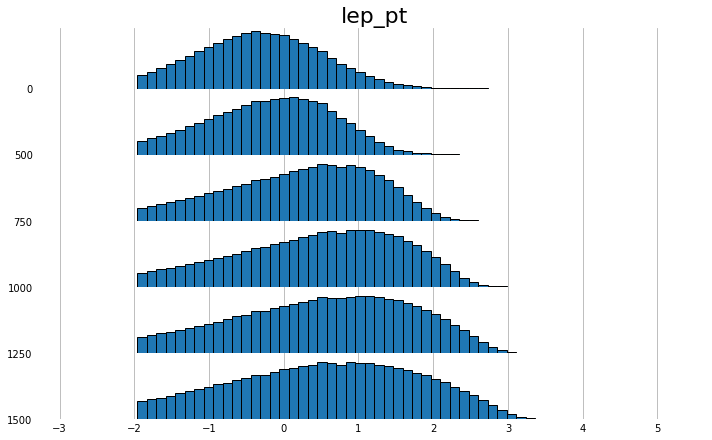

<Figure size 432x288 with 0 Axes>

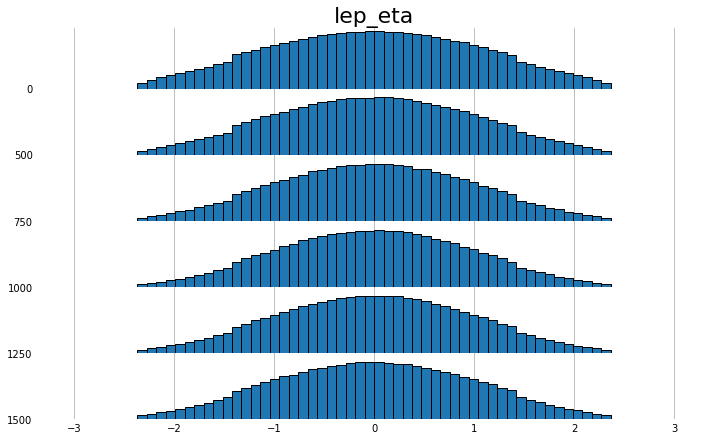

<Figure size 432x288 with 0 Axes>

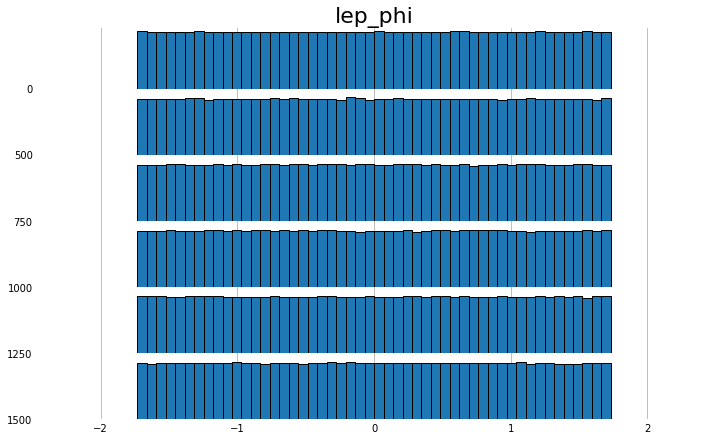

<Figure size 432x288 with 0 Axes>

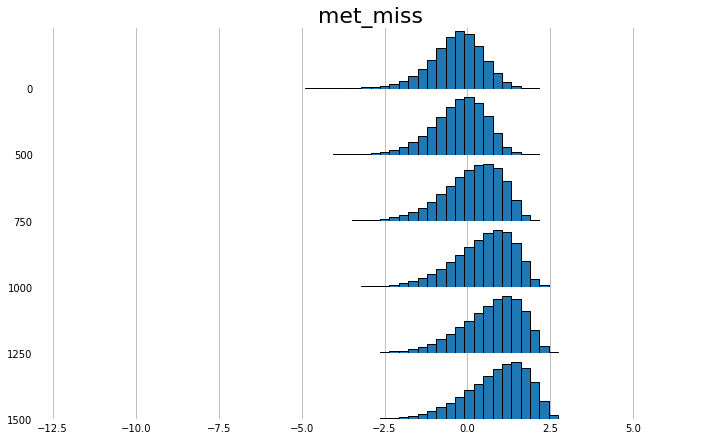

<Figure size 432x288 with 0 Axes>

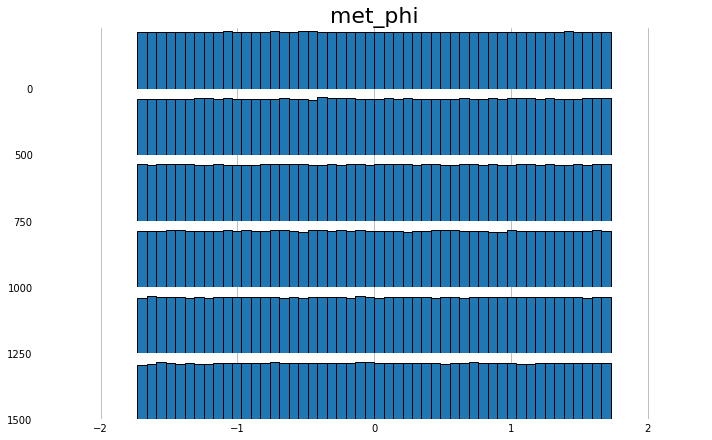

<Figure size 432x288 with 0 Axes>

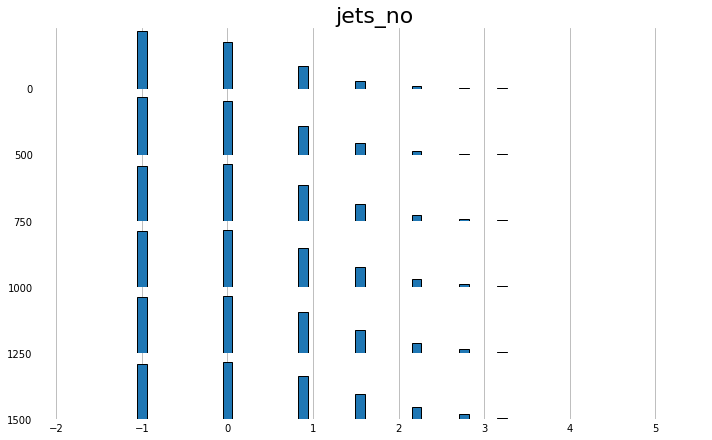

<Figure size 432x288 with 0 Axes>

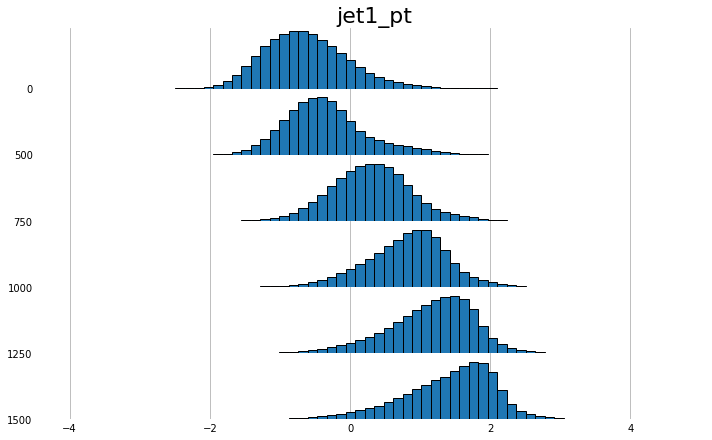

<Figure size 432x288 with 0 Axes>

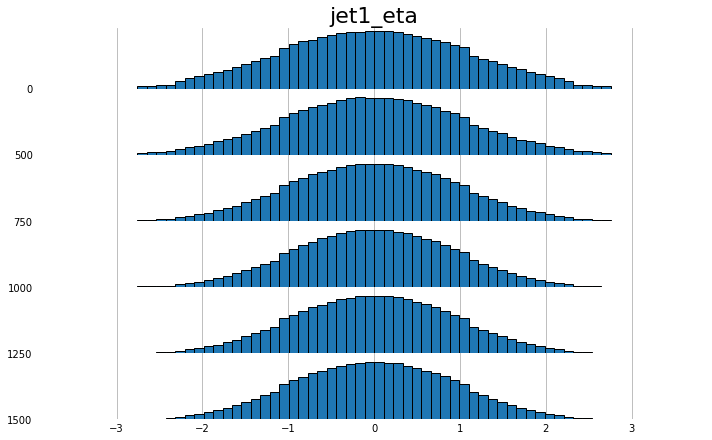

<Figure size 432x288 with 0 Axes>

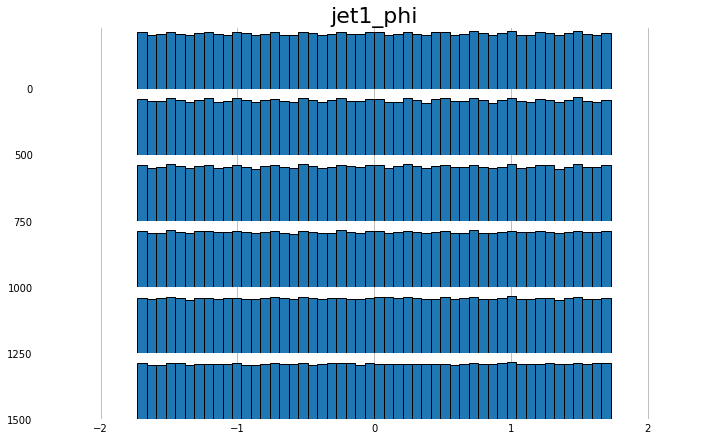

<Figure size 432x288 with 0 Axes>

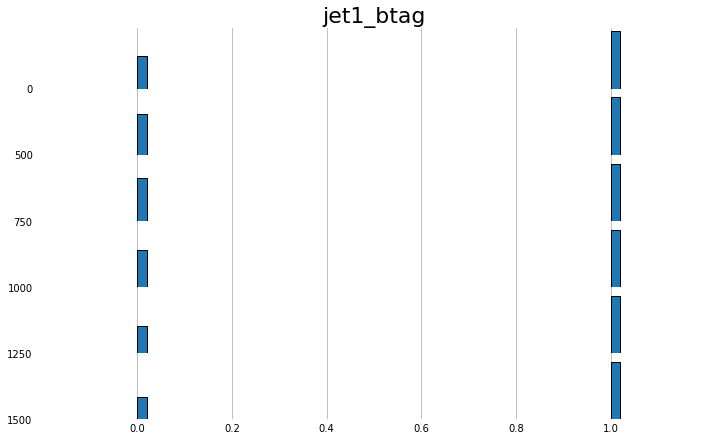

<Figure size 432x288 with 0 Axes>

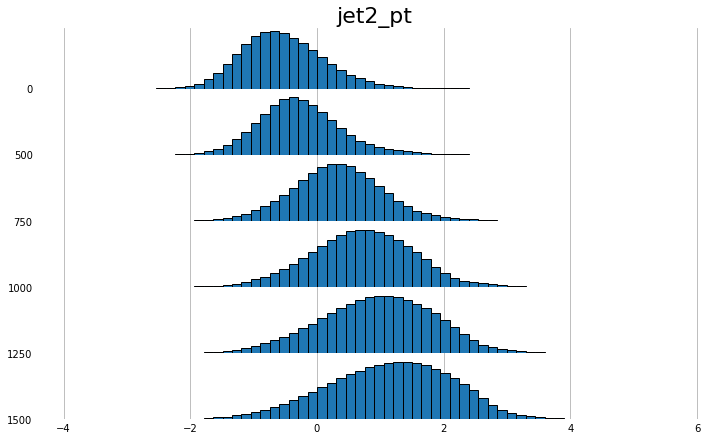

<Figure size 432x288 with 0 Axes>

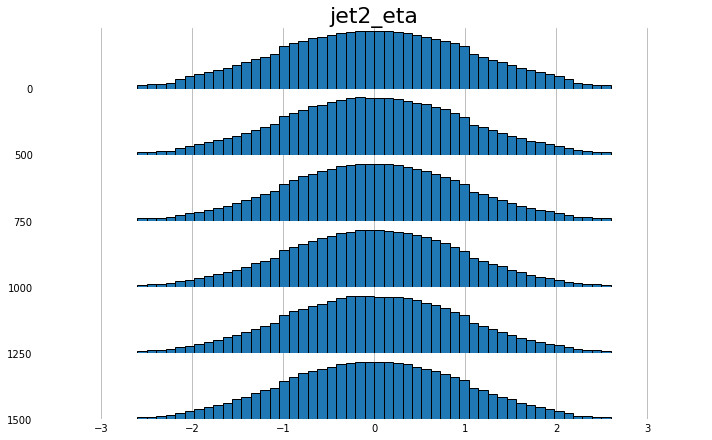

<Figure size 432x288 with 0 Axes>

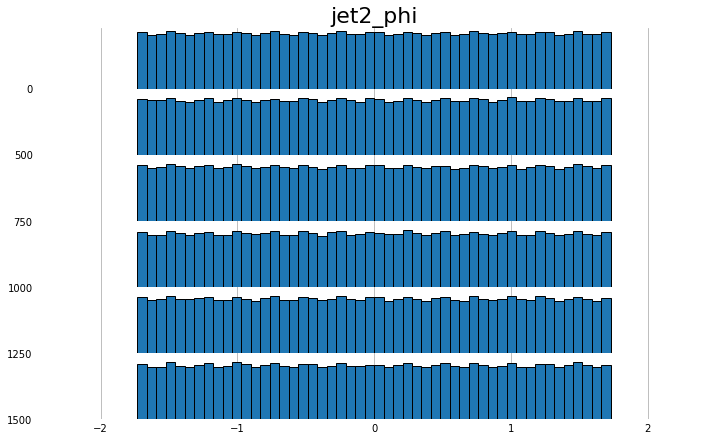

<Figure size 432x288 with 0 Axes>

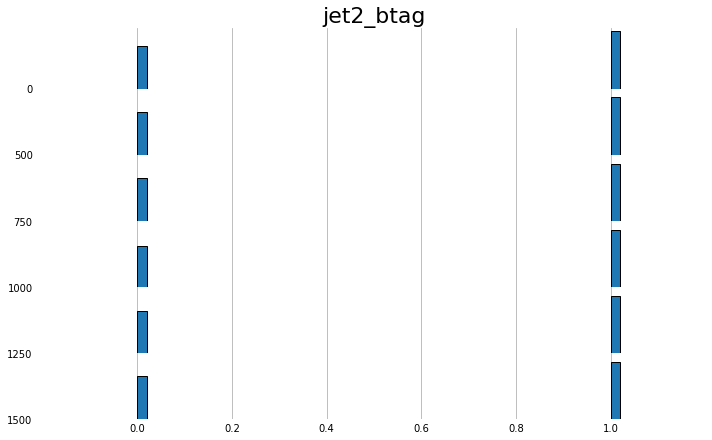

<Figure size 432x288 with 0 Axes>

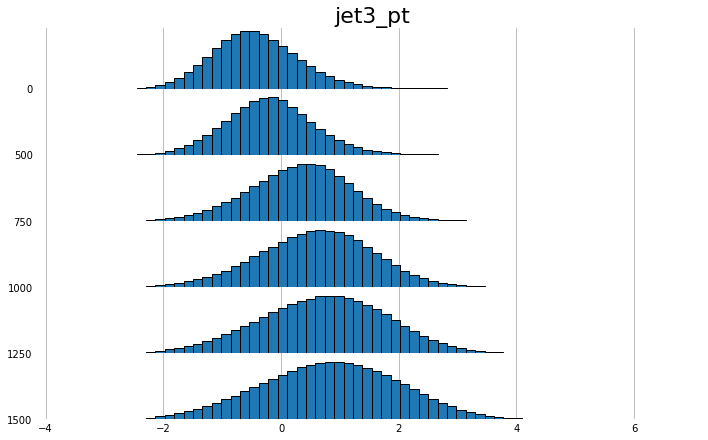

<Figure size 432x288 with 0 Axes>

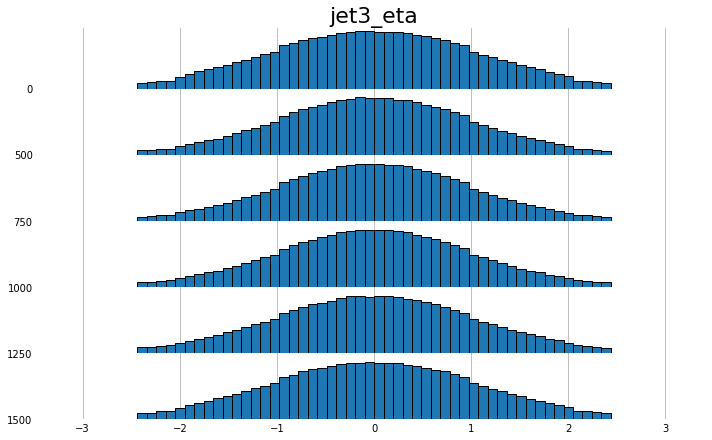

<Figure size 432x288 with 0 Axes>

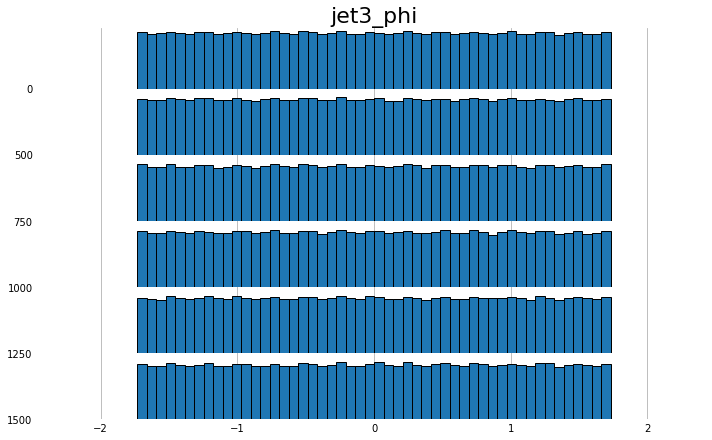

<Figure size 432x288 with 0 Axes>

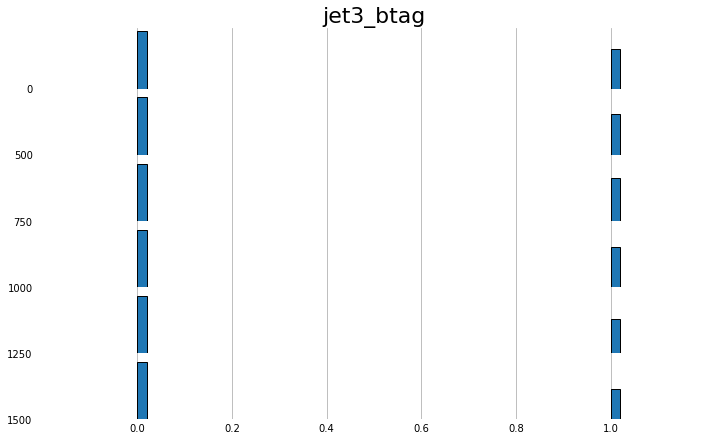

<Figure size 432x288 with 0 Axes>

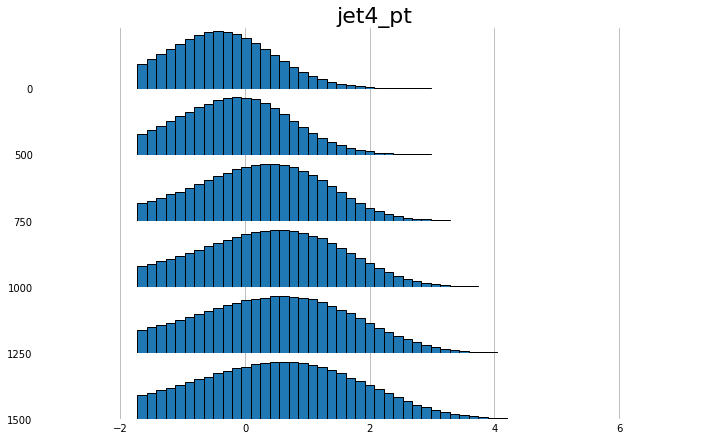

<Figure size 432x288 with 0 Axes>

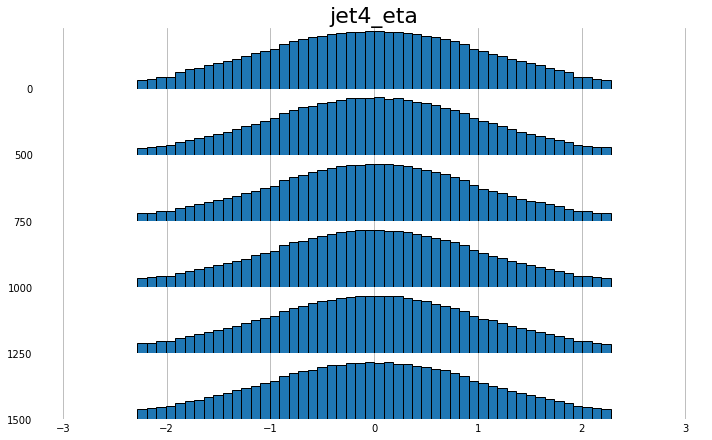

<Figure size 432x288 with 0 Axes>

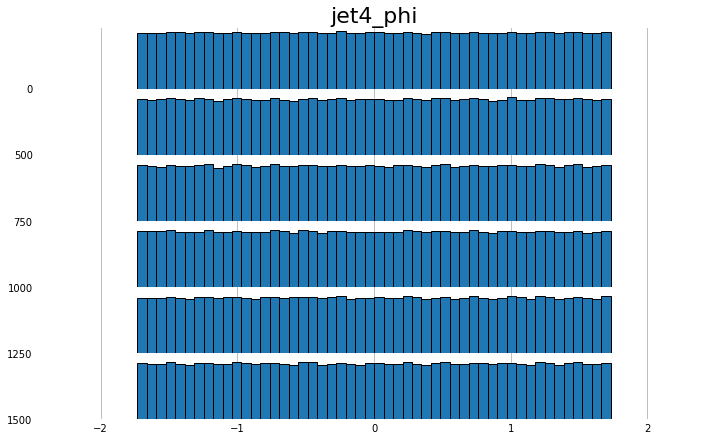

<Figure size 432x288 with 0 Axes>

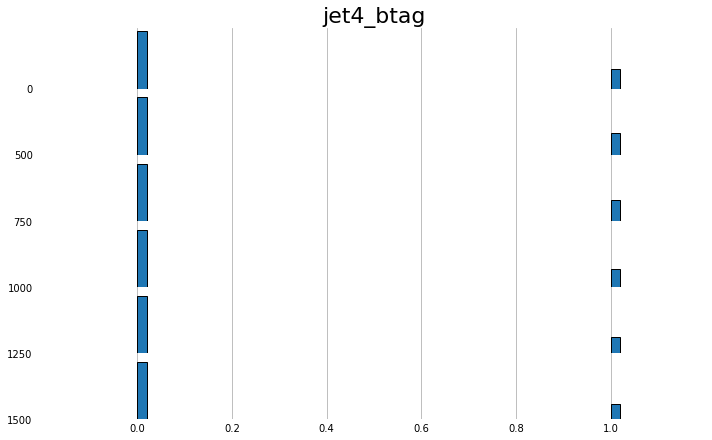

<Figure size 432x288 with 0 Axes>

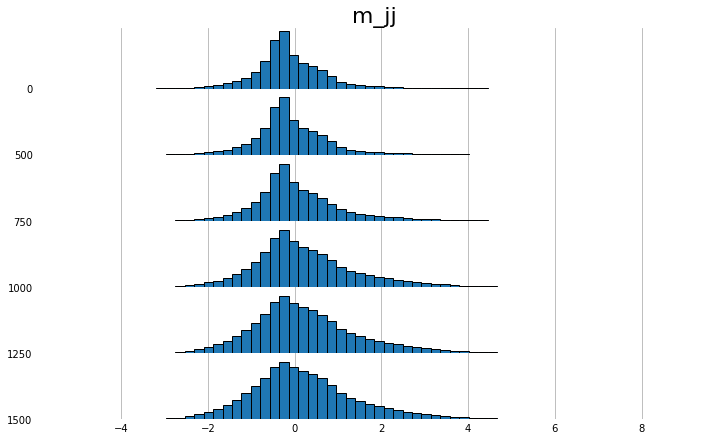

<Figure size 432x288 with 0 Axes>

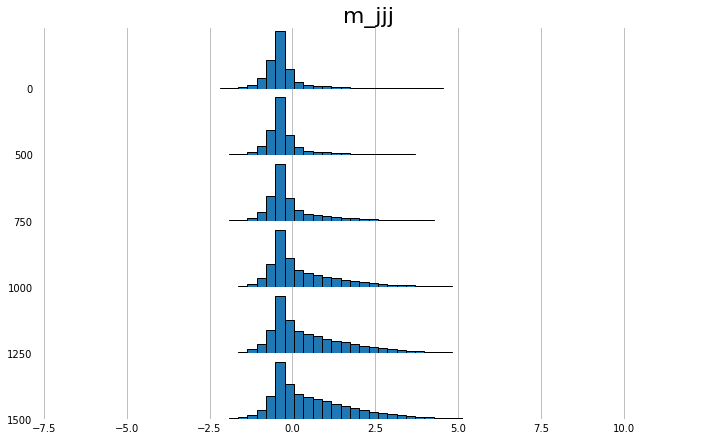

<Figure size 432x288 with 0 Axes>

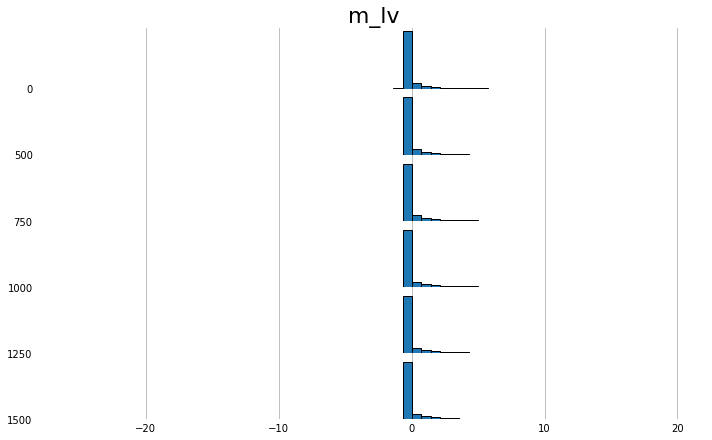

<Figure size 432x288 with 0 Axes>

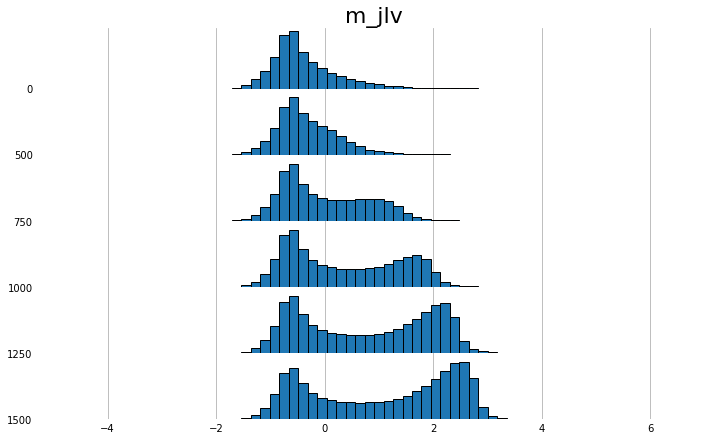

<Figure size 432x288 with 0 Axes>

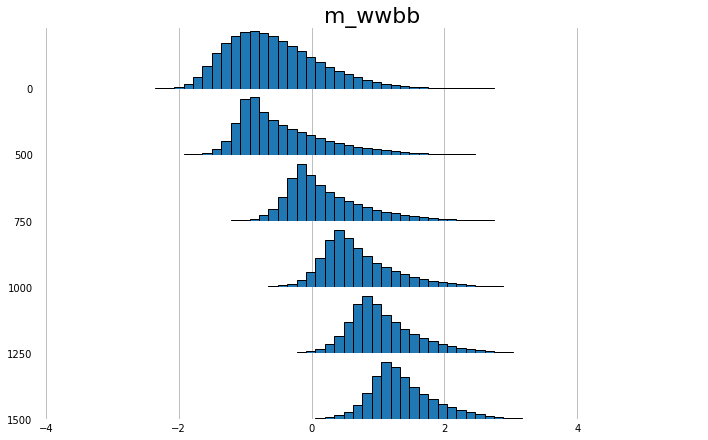

In [7]:
#UNCOMENT TO SEE THE DENSITY DIAGRAM:

'''for i in names: 
    plt.figure()
    fig, axes = joypy.joyplot(dfdensity, column=[i], by="mass", ylim='own', figsize=(10,2))

    # Decoration
    plt.title(i, fontsize=22)
    plt.show()    
'''
dfdensity=df.iloc[:,1:]
names=dfdensity.iloc[:,:-1].columns

#Plot histogram: 

print("NORMALIZED DISTRIBUTIONS (7 MILLIONS DATA)")

for i in names: 
    plt.figure()
    fig, axes = joypy.joyplot(dfdensity, column=[i], by="mass", ylim='own', figsize=(10,6),hist="True", bins=70, overlap=0,
                          grid=True, legend=False)

    # Decoration
    plt.title(i, fontsize=22)
    plt.show()
    fig.savefig(pwdnorm +i + '.png')
    


**REMOVING OUTLIERS**

SAME THAN BEFORE BUT WITH ZOOM


<Figure size 432x288 with 0 Axes>

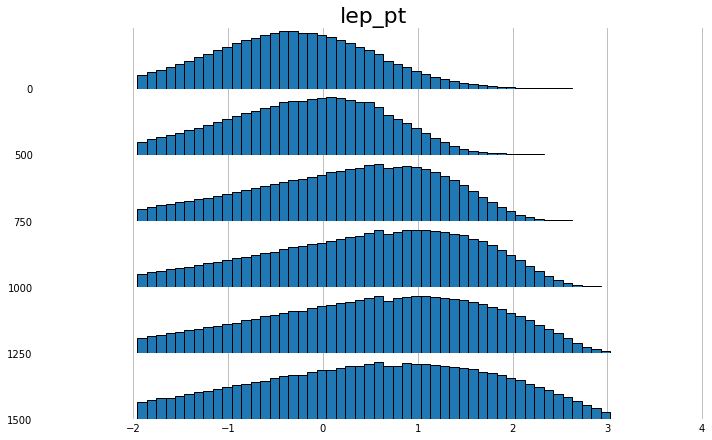

<Figure size 432x288 with 0 Axes>

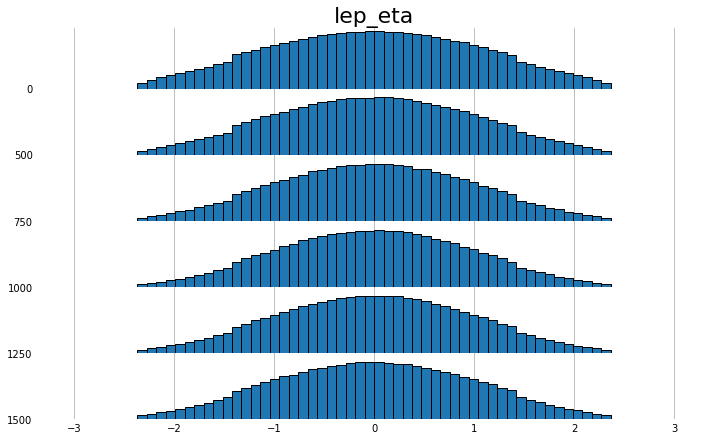

<Figure size 432x288 with 0 Axes>

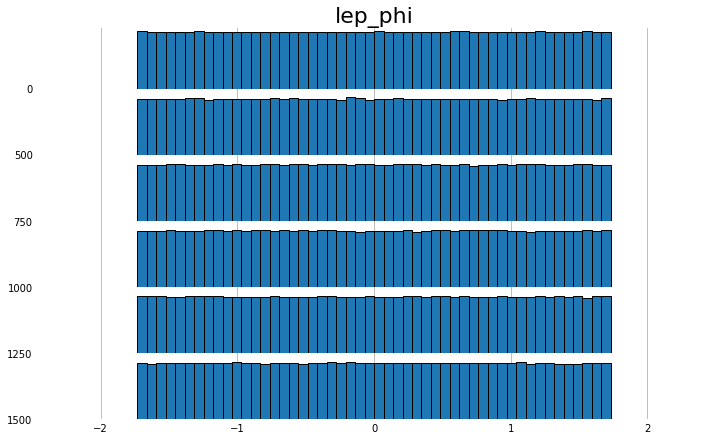

<Figure size 432x288 with 0 Axes>

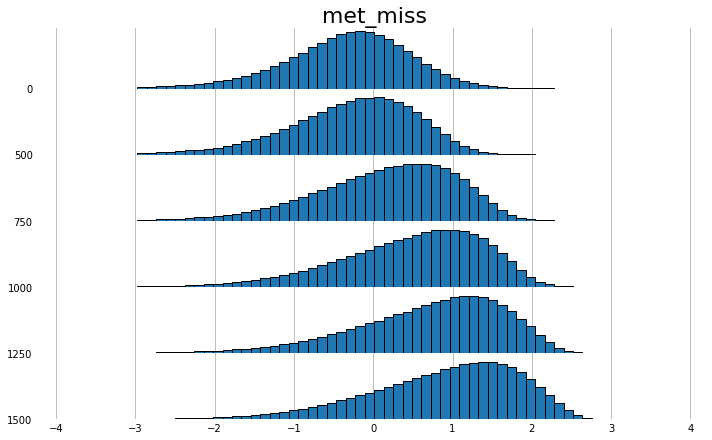

<Figure size 432x288 with 0 Axes>

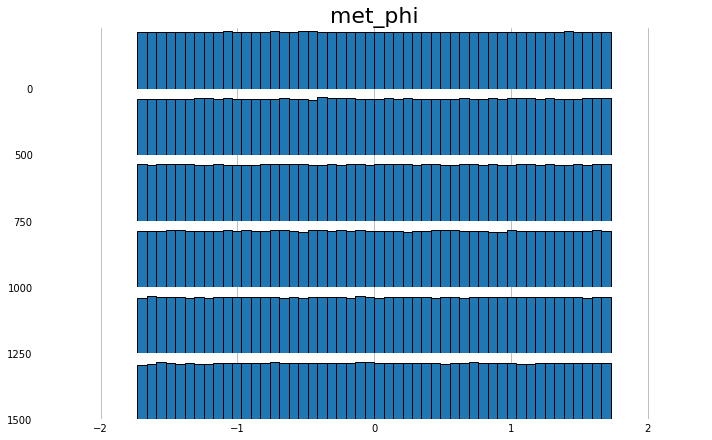

<Figure size 432x288 with 0 Axes>

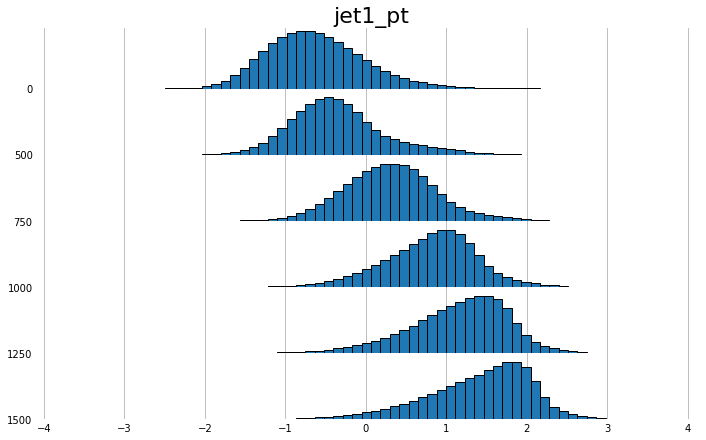

<Figure size 432x288 with 0 Axes>

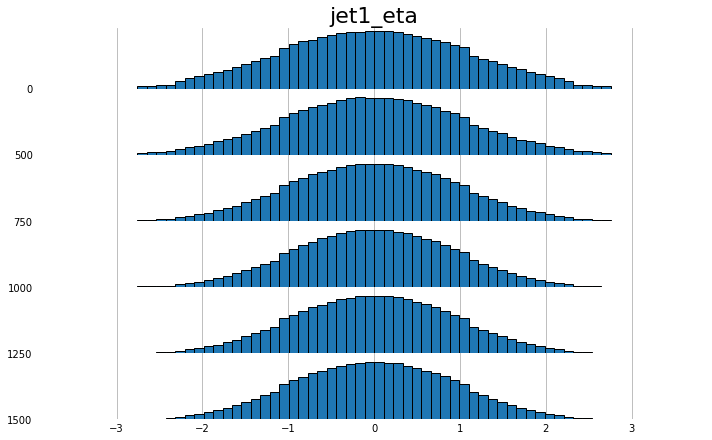

<Figure size 432x288 with 0 Axes>

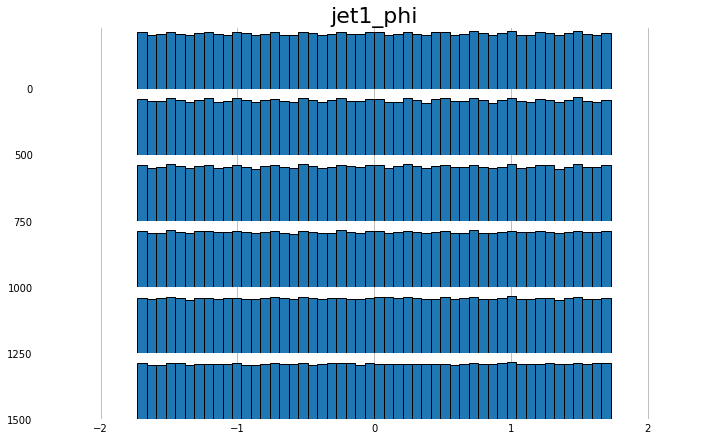

<Figure size 432x288 with 0 Axes>

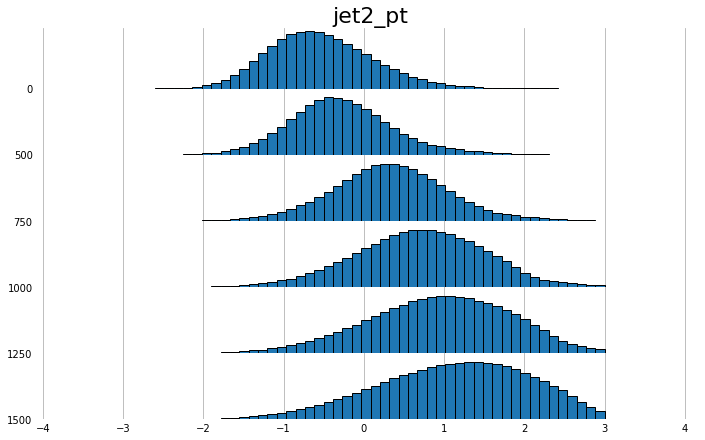

<Figure size 432x288 with 0 Axes>

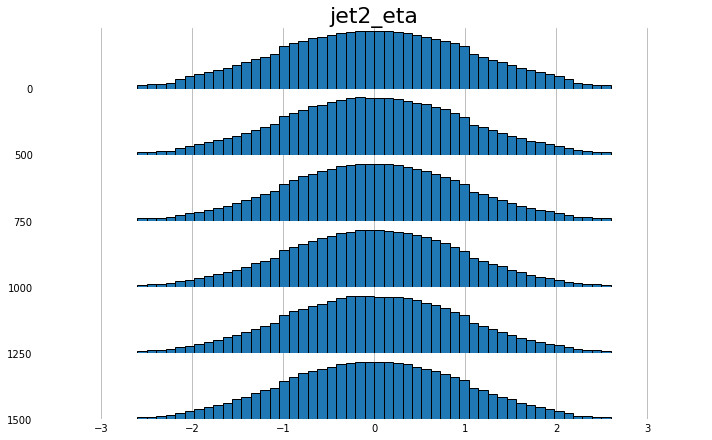

<Figure size 432x288 with 0 Axes>

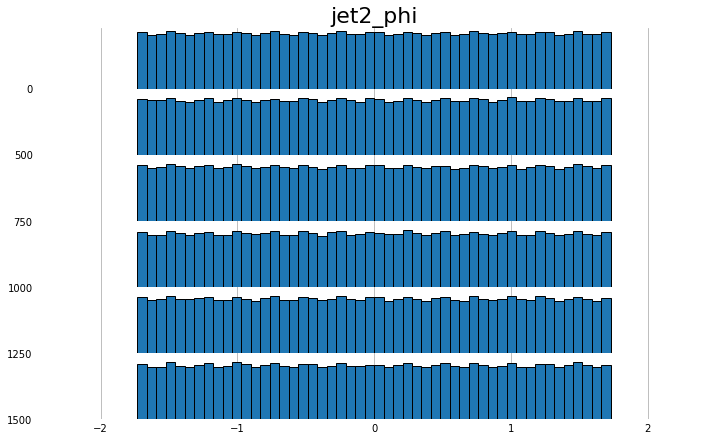

<Figure size 432x288 with 0 Axes>

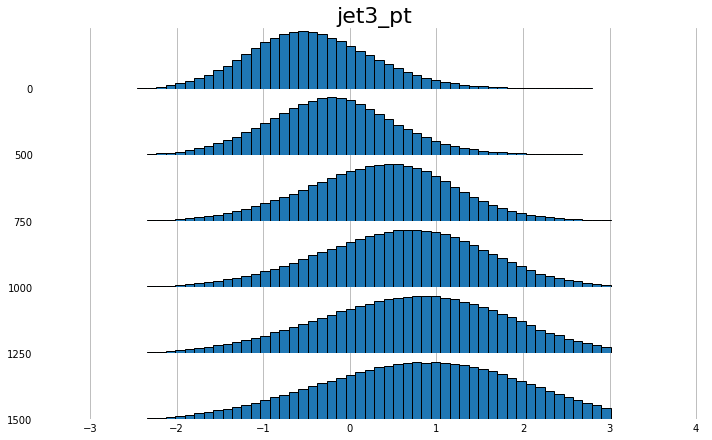

<Figure size 432x288 with 0 Axes>

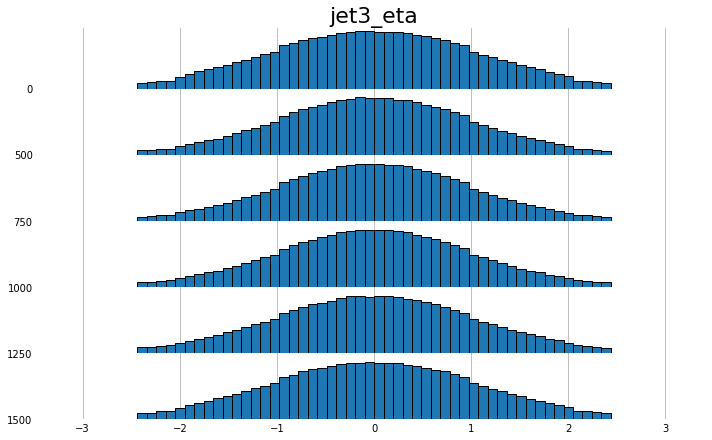

<Figure size 432x288 with 0 Axes>

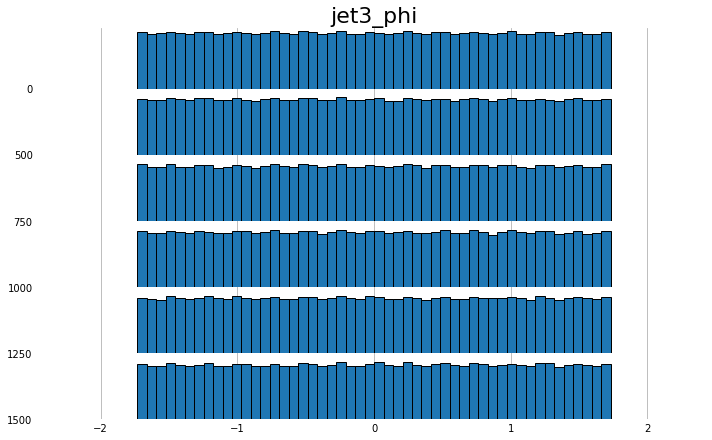

<Figure size 432x288 with 0 Axes>

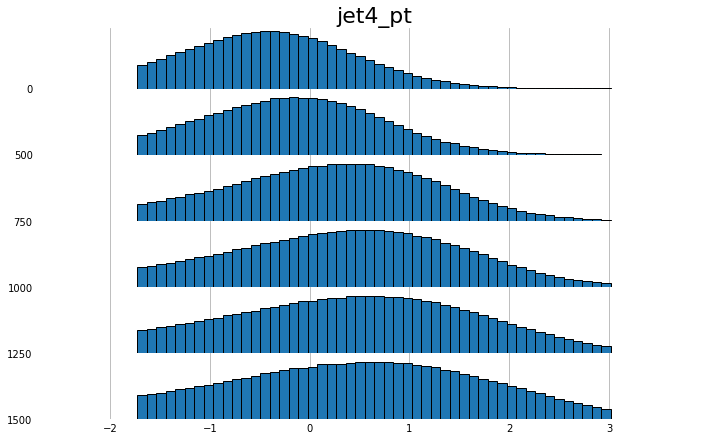

<Figure size 432x288 with 0 Axes>

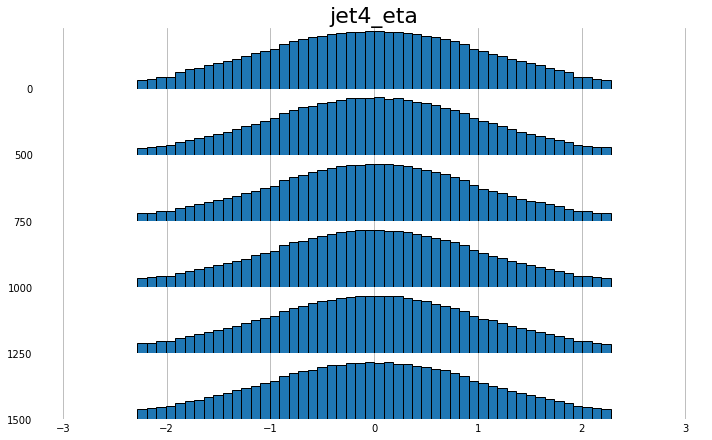

<Figure size 432x288 with 0 Axes>

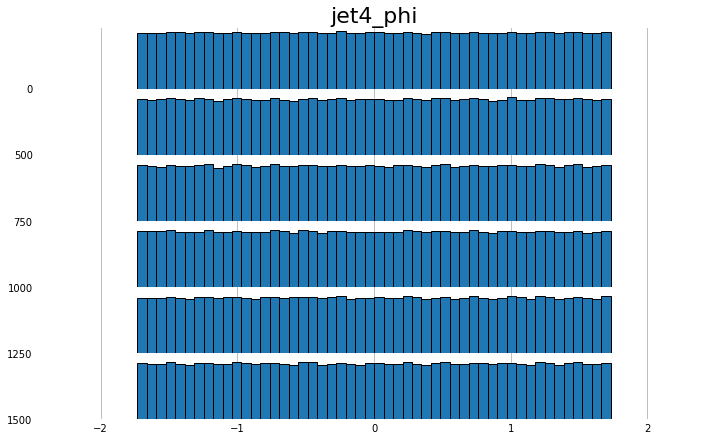

<Figure size 432x288 with 0 Axes>

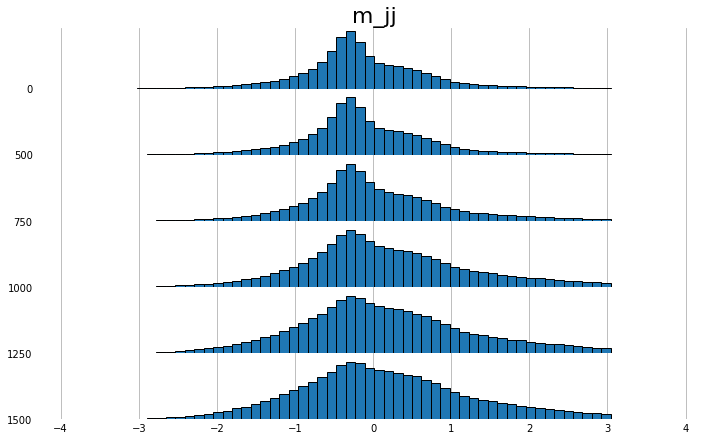

m_jjj


<Figure size 432x288 with 0 Axes>

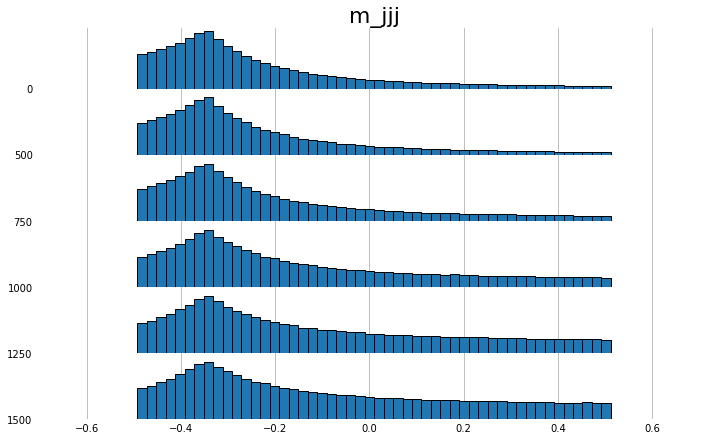

m_lv


<Figure size 432x288 with 0 Axes>

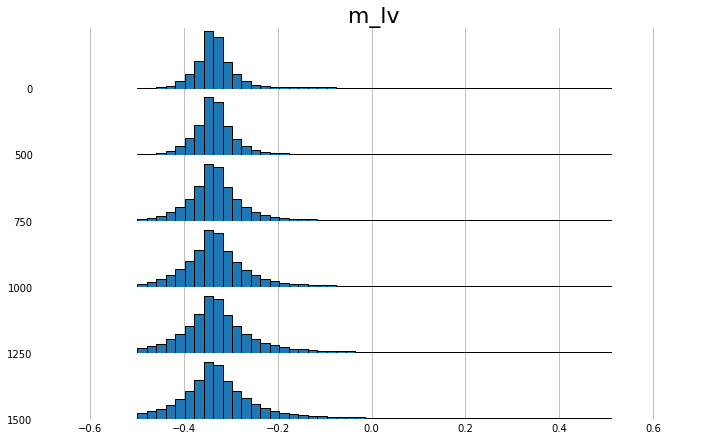

<Figure size 432x288 with 0 Axes>

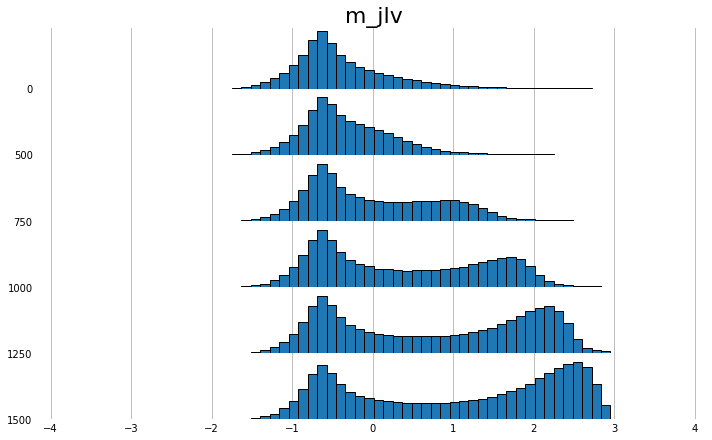

<Figure size 432x288 with 0 Axes>

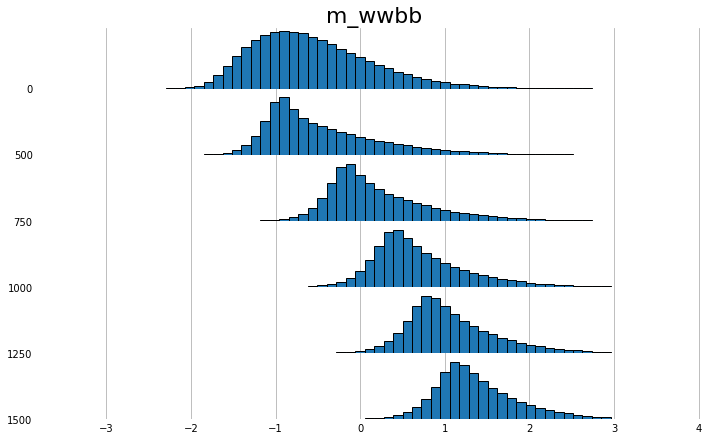

In [8]:
#Removing outliers to print diagrams: 

dfdensity=df.iloc[:,1:]
names=dfdensity.iloc[:,:-1].columns


#Plot histogram: 

print("SAME THAN BEFORE BUT WITH ZOOM")

for i in names: 
    if dfdensity[i].dtypes=='float64': 
        
        df_sinout = dfdensity.copy()
        
        if i == "m_jjj" or  i== "m_lv":

            df_sinout=df_sinout[~((df_sinout[i]-df_sinout[i].mean()).abs() > 0.5*df_sinout[i].std())]
            ### outliers are removing for each column and printed, for the next column the whole dataset is loaded again. 
            ### "normal column outliers > 3"" , m_jjj and m_ñv (high std) > 0.5, there is no criteria , is just the best way od visualize 
            print(i)
       
        else: 
            df_sinout=df_sinout[~((df_sinout[i]-df_sinout[i].mean()).abs() > 3*df_sinout[i].std())]


        plt.figure()
        fig, axes = joypy.joyplot(df_sinout, column=[i], by="mass", ylim='own', figsize=(10,6),hist="True", bins=70, overlap=0,
                              grid=True, legend=False)

        # Decoration
        plt.title(i, fontsize=22)
        plt.show()
        fig.savefig(pwdnorm +i + '_outlier.png')

** DIFFERENCE BETWEEN BTAG CORRECT AND UNCORRECT** 

SAME THAN FIRST PLOT BUT WHEN BTAGS ARE 1-1-0-0


<Figure size 432x288 with 0 Axes>

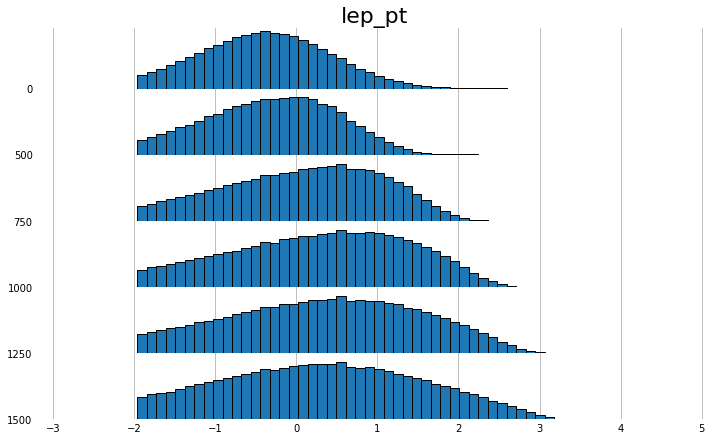

<Figure size 432x288 with 0 Axes>

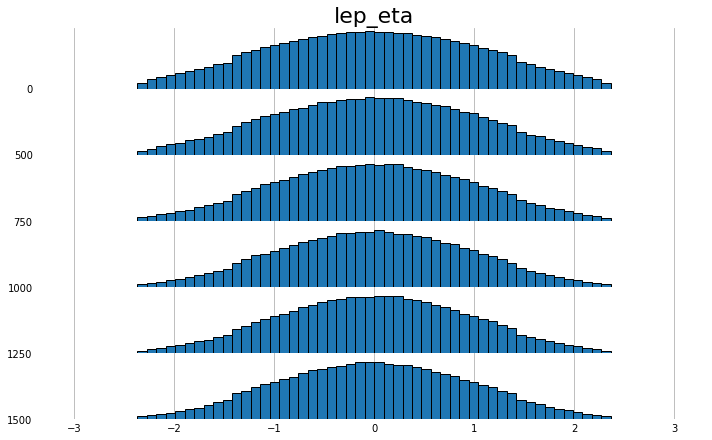

<Figure size 432x288 with 0 Axes>

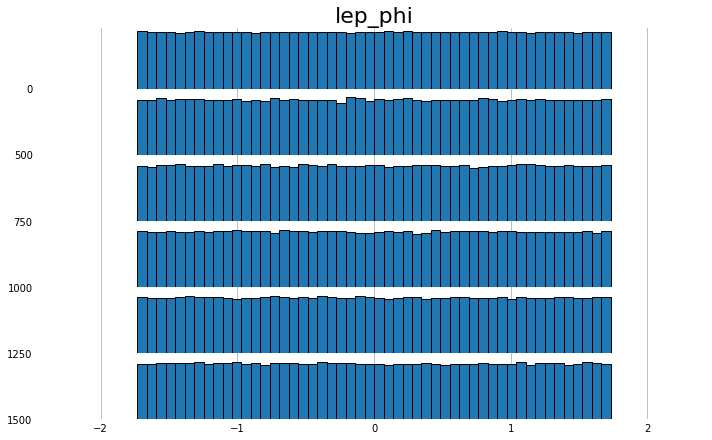

<Figure size 432x288 with 0 Axes>

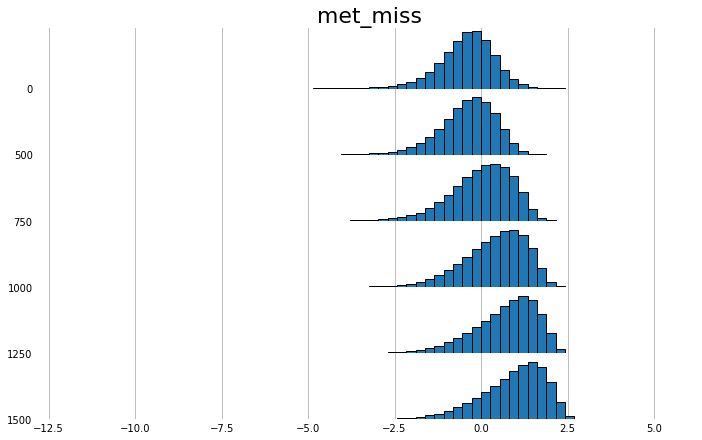

<Figure size 432x288 with 0 Axes>

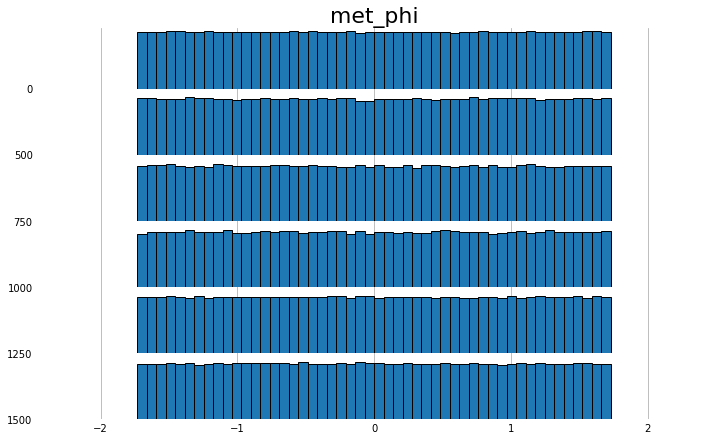

<Figure size 432x288 with 0 Axes>

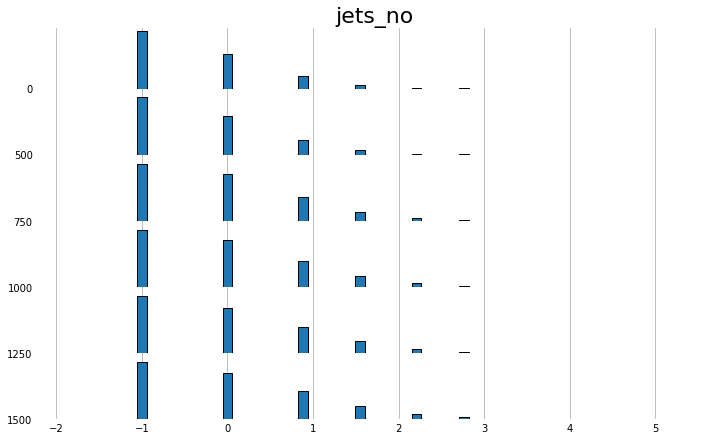

<Figure size 432x288 with 0 Axes>

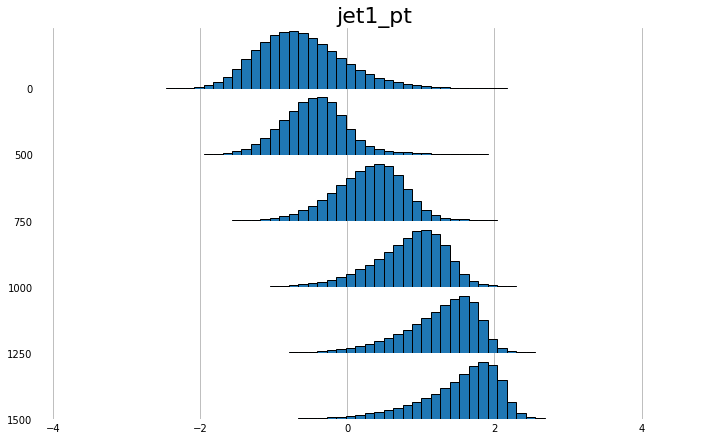

<Figure size 432x288 with 0 Axes>

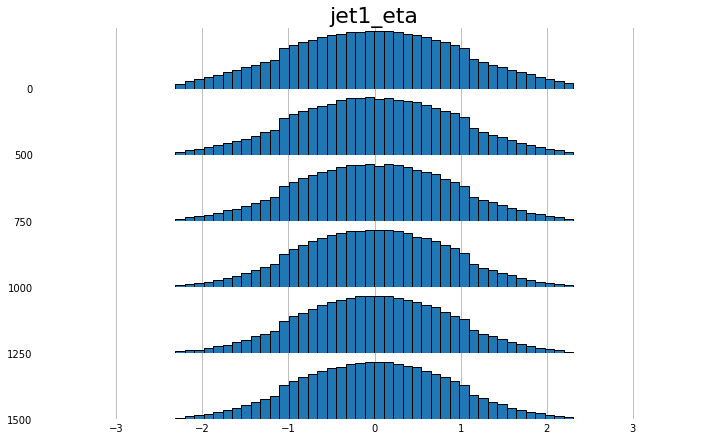

<Figure size 432x288 with 0 Axes>

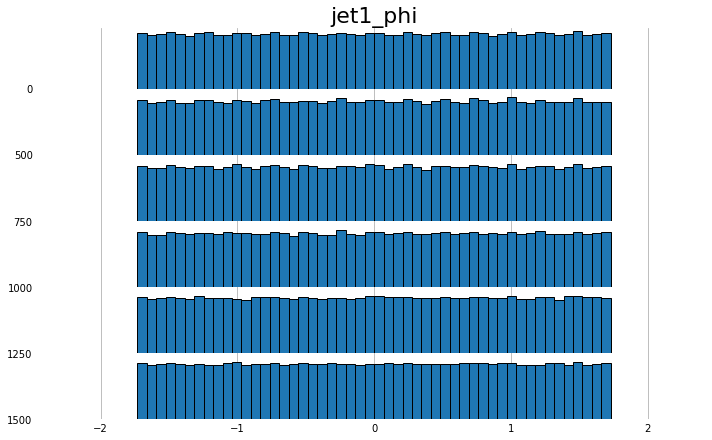

<Figure size 432x288 with 0 Axes>

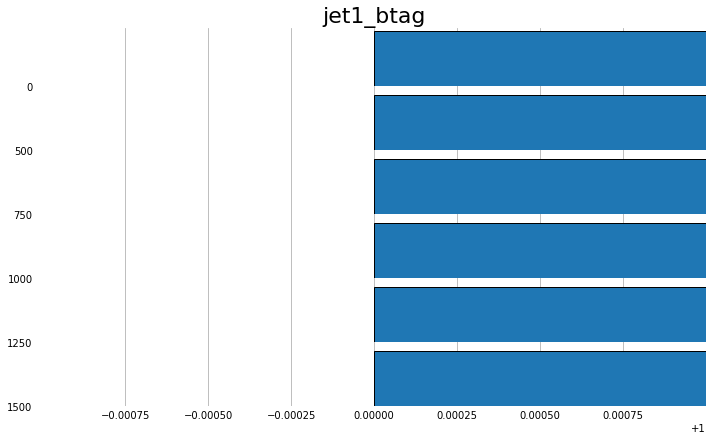

<Figure size 432x288 with 0 Axes>

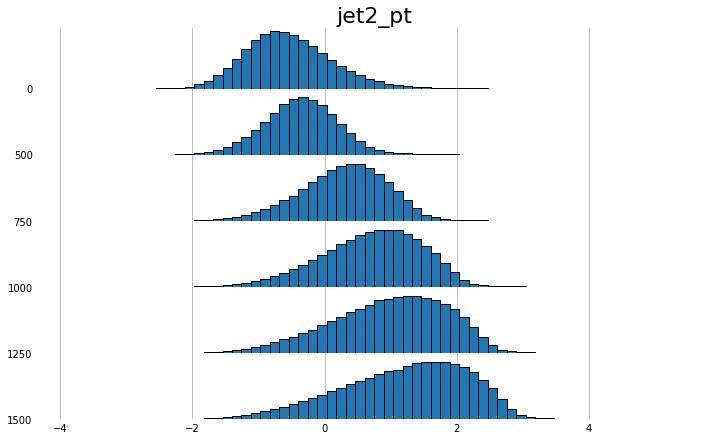

<Figure size 432x288 with 0 Axes>

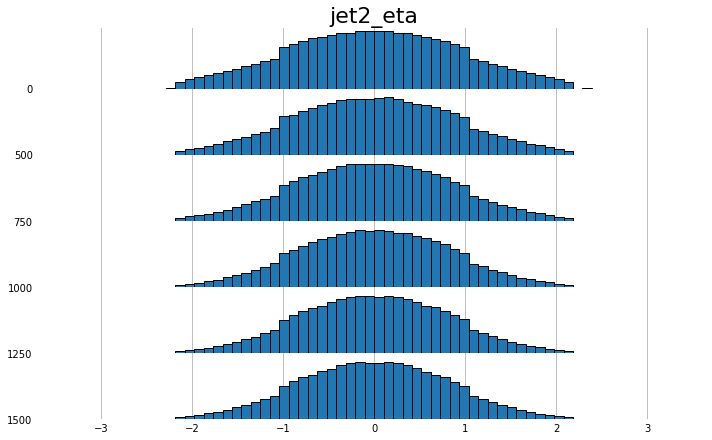

<Figure size 432x288 with 0 Axes>

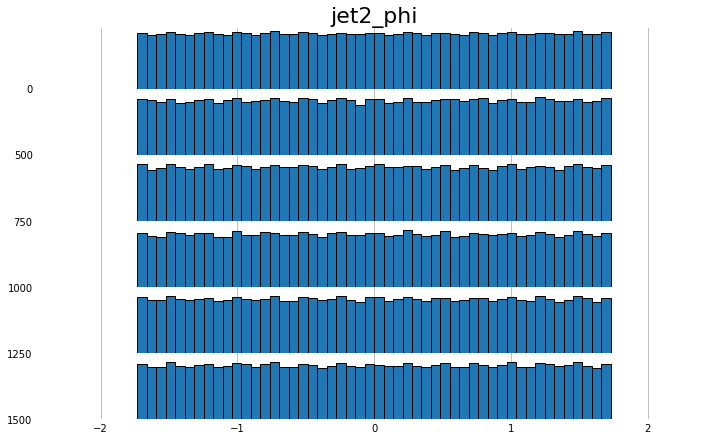

<Figure size 432x288 with 0 Axes>

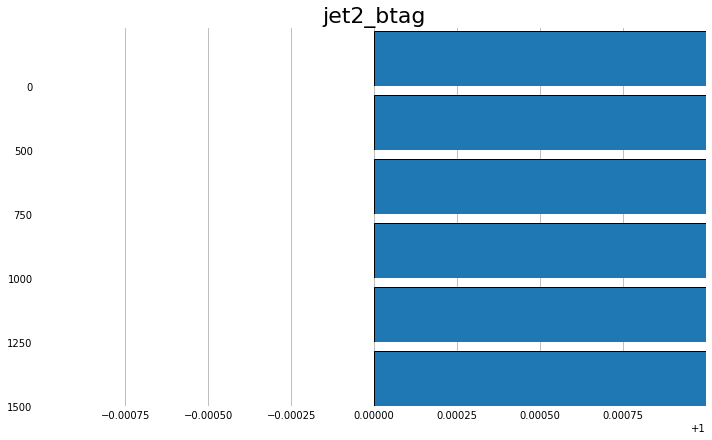

<Figure size 432x288 with 0 Axes>

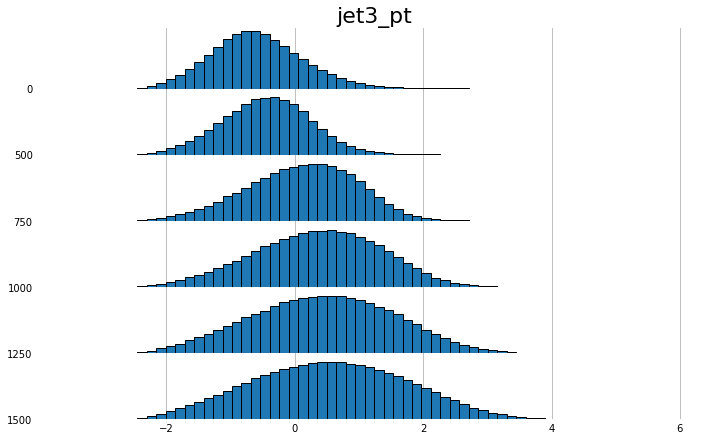

<Figure size 432x288 with 0 Axes>

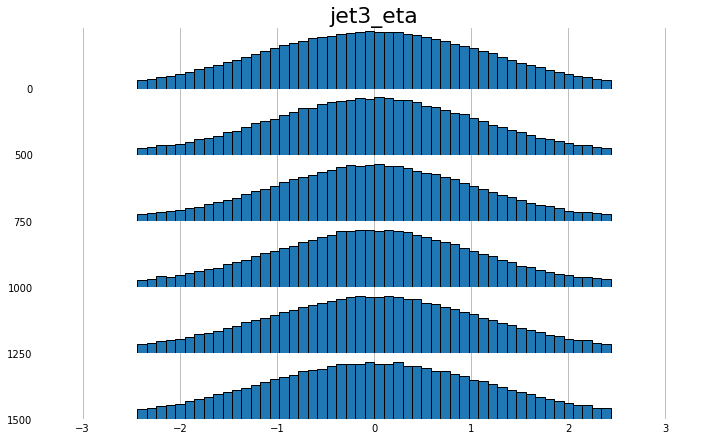

<Figure size 432x288 with 0 Axes>

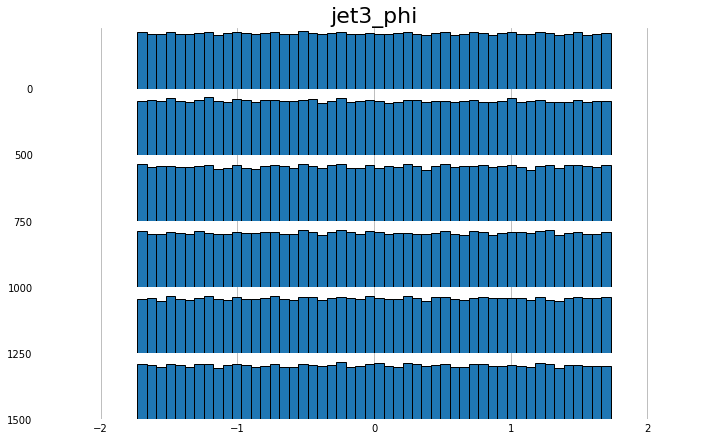

<Figure size 432x288 with 0 Axes>

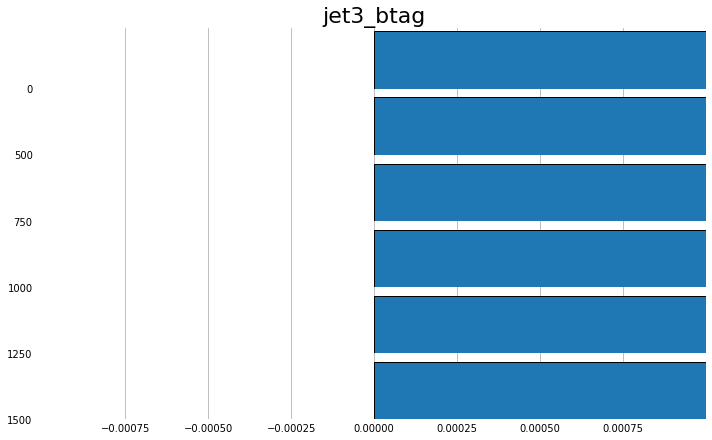

<Figure size 432x288 with 0 Axes>

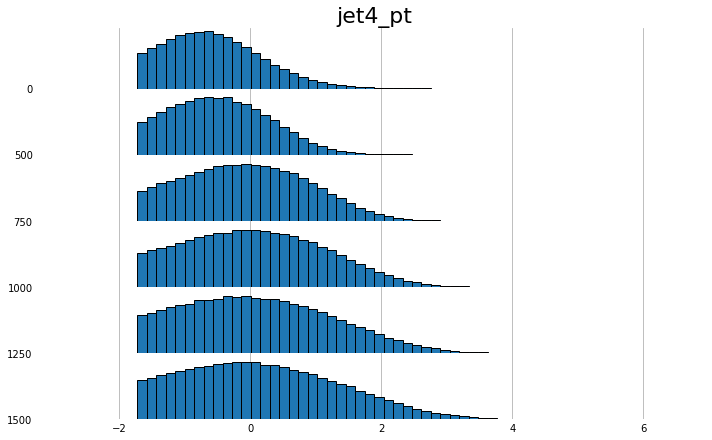

<Figure size 432x288 with 0 Axes>

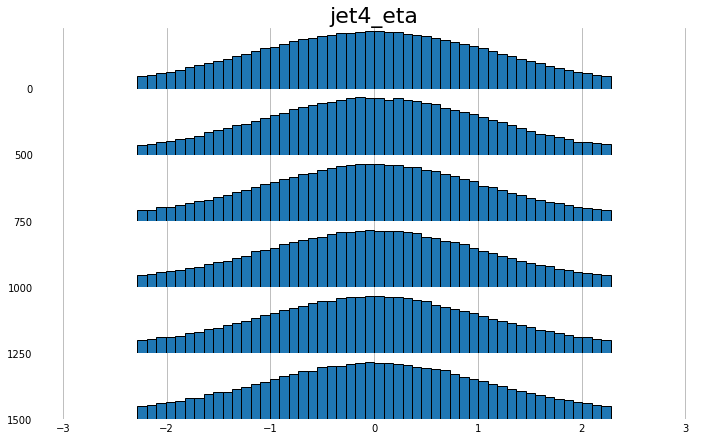

<Figure size 432x288 with 0 Axes>

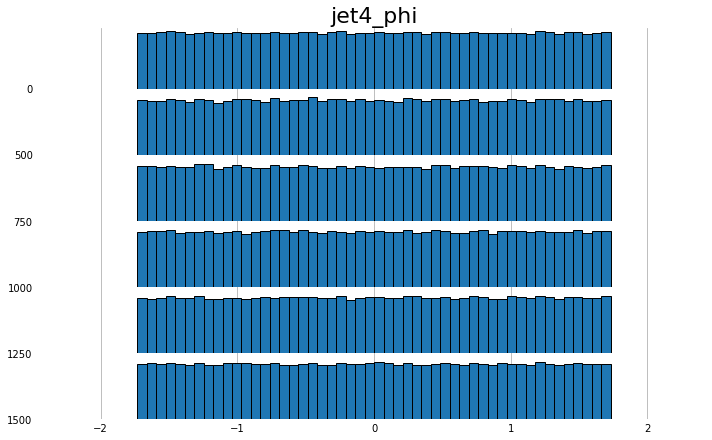

<Figure size 432x288 with 0 Axes>

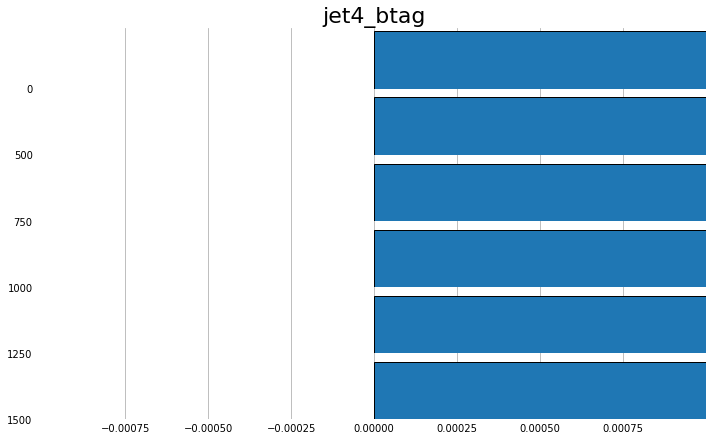

<Figure size 432x288 with 0 Axes>

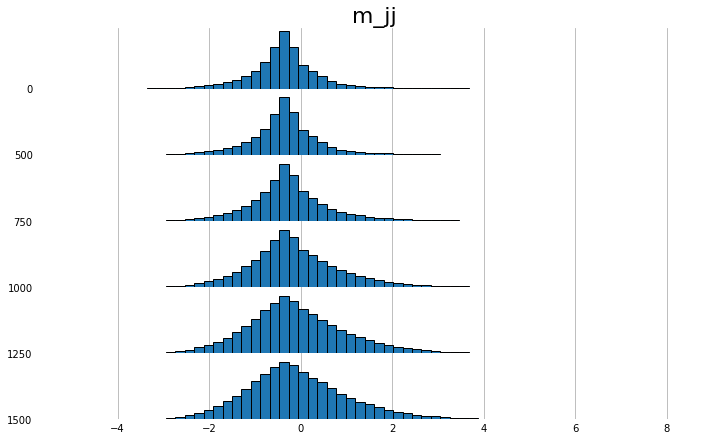

<Figure size 432x288 with 0 Axes>

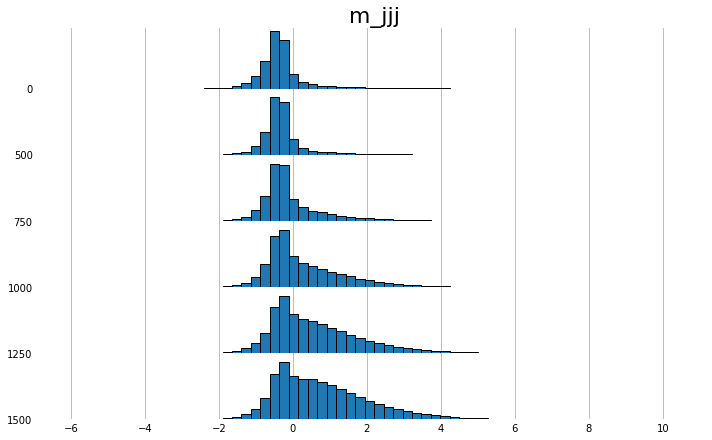

<Figure size 432x288 with 0 Axes>

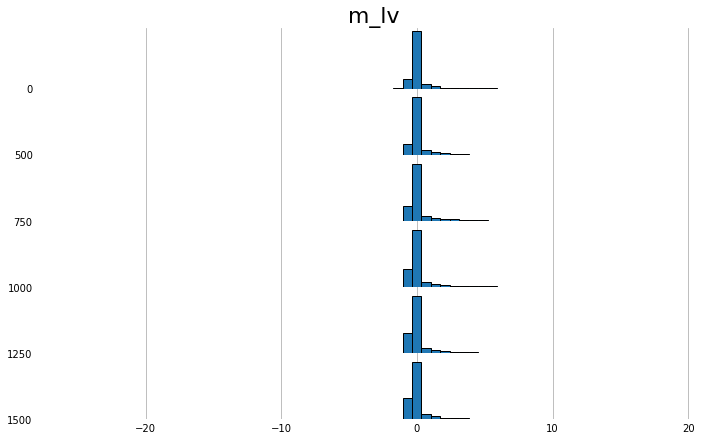

<Figure size 432x288 with 0 Axes>

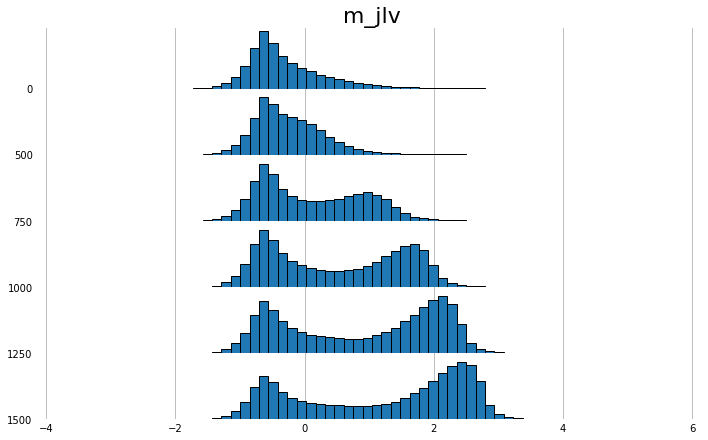

<Figure size 432x288 with 0 Axes>

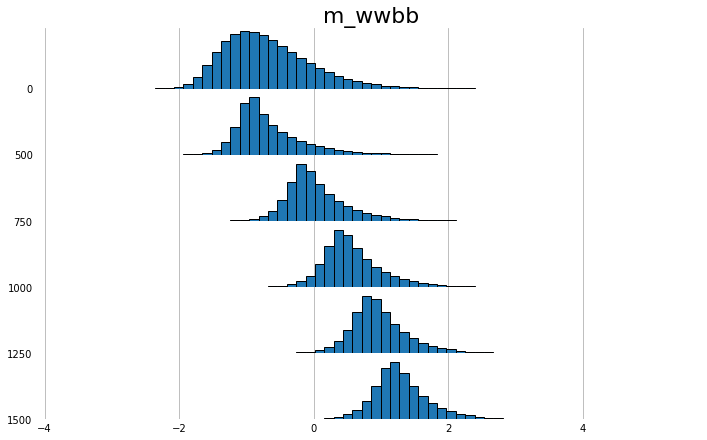

SAME THAN FIRST PLOT BUT WHEN BTAGS ARE 0-0-1-1


<Figure size 432x288 with 0 Axes>

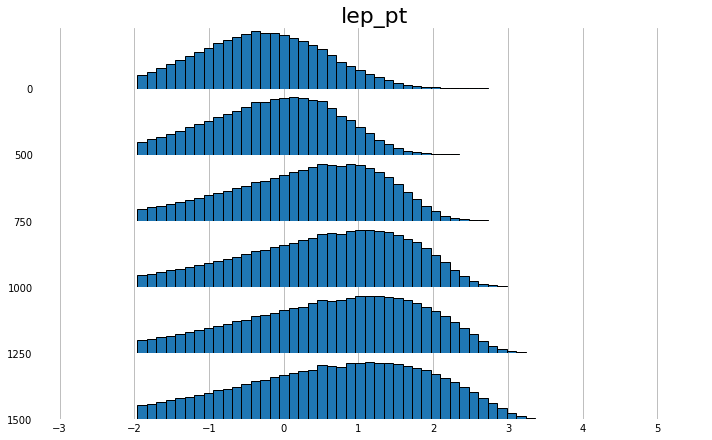

<Figure size 432x288 with 0 Axes>

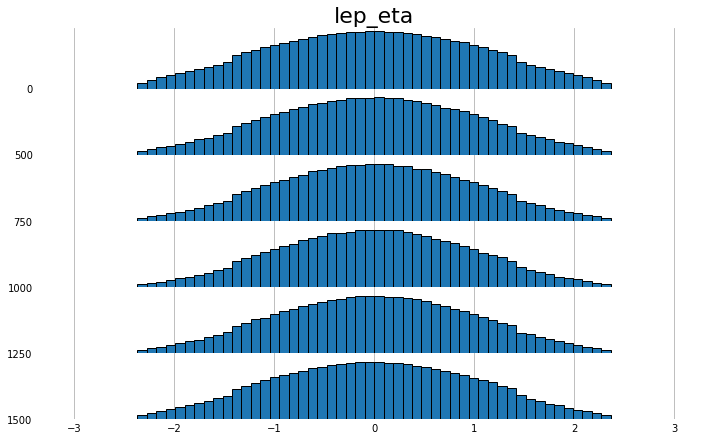

<Figure size 432x288 with 0 Axes>

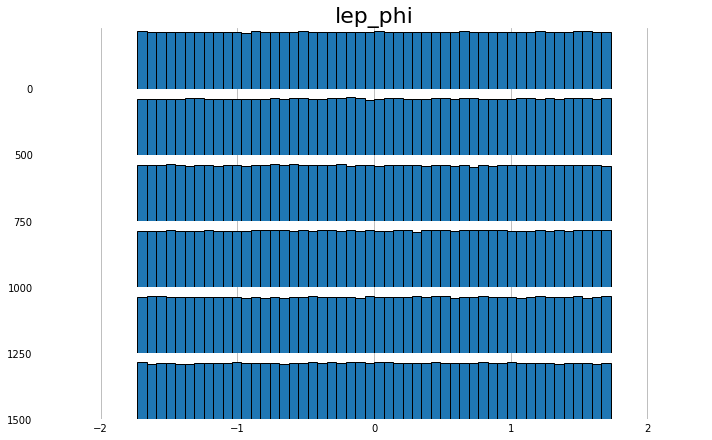

<Figure size 432x288 with 0 Axes>

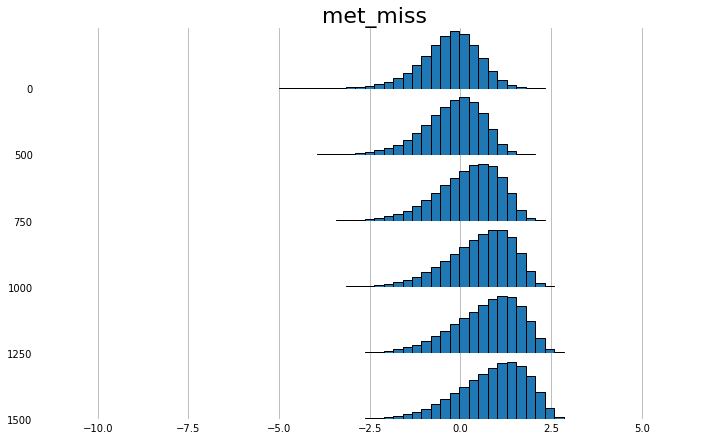

<Figure size 432x288 with 0 Axes>

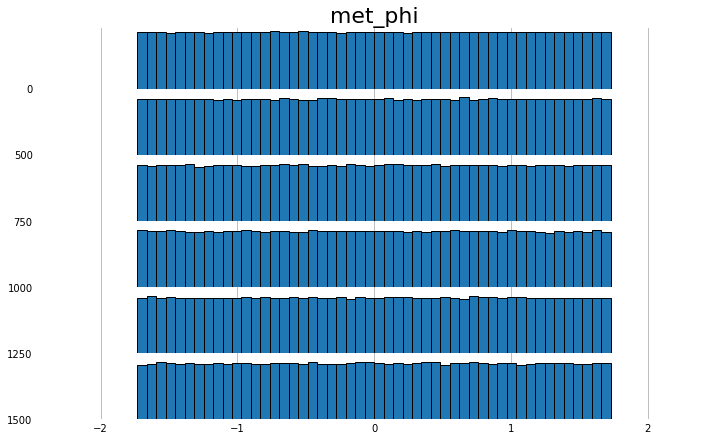

<Figure size 432x288 with 0 Axes>

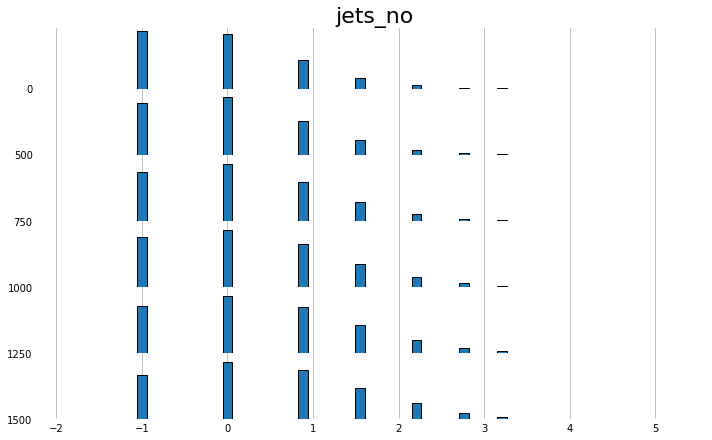

<Figure size 432x288 with 0 Axes>

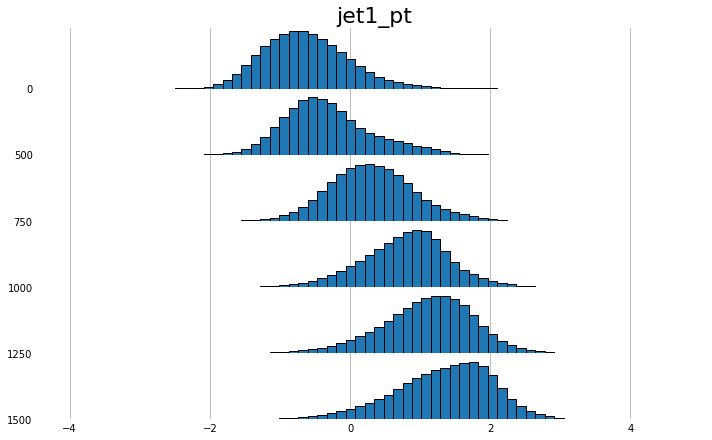

<Figure size 432x288 with 0 Axes>

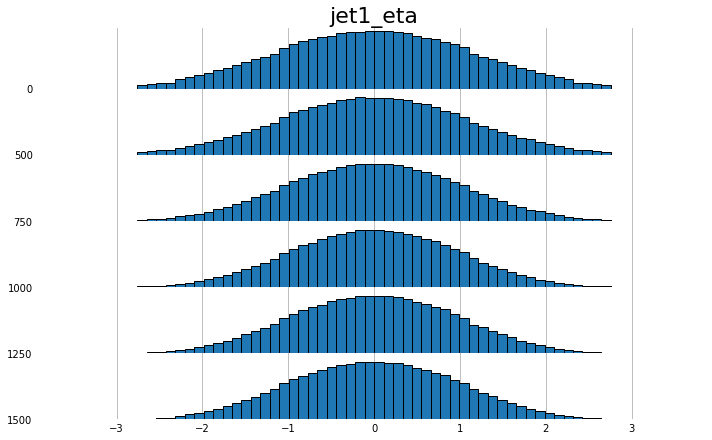

<Figure size 432x288 with 0 Axes>

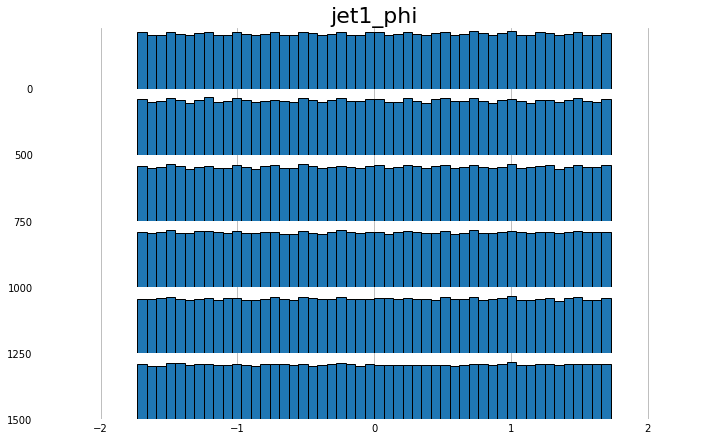

<Figure size 432x288 with 0 Axes>

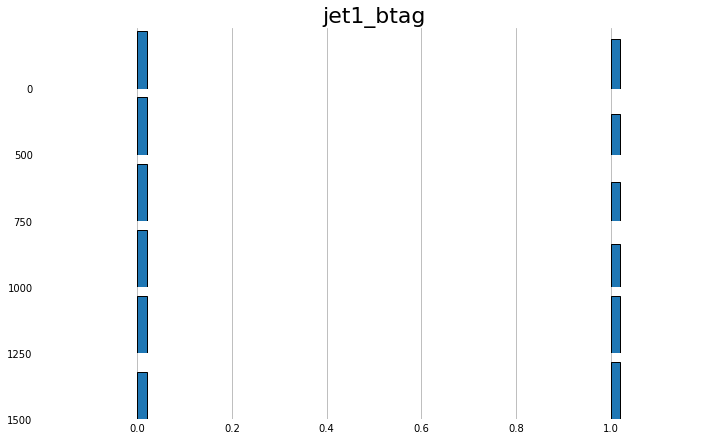

<Figure size 432x288 with 0 Axes>

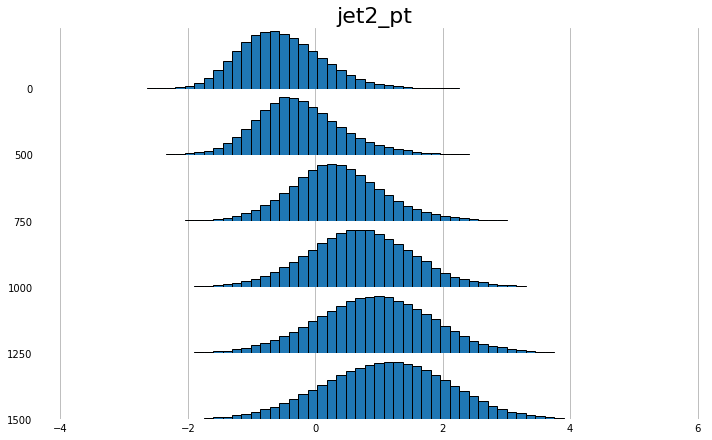

<Figure size 432x288 with 0 Axes>

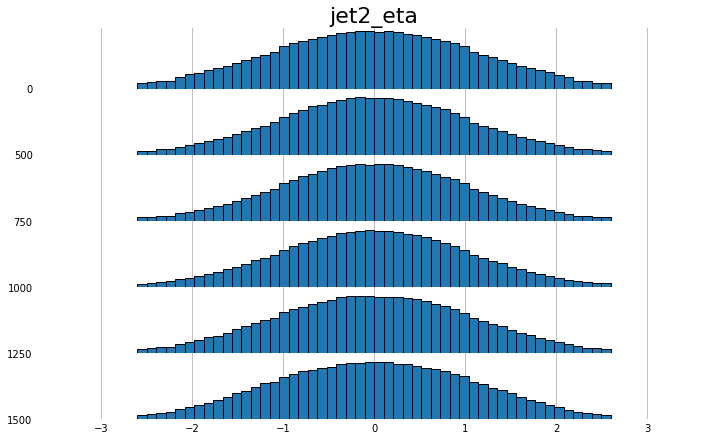

<Figure size 432x288 with 0 Axes>

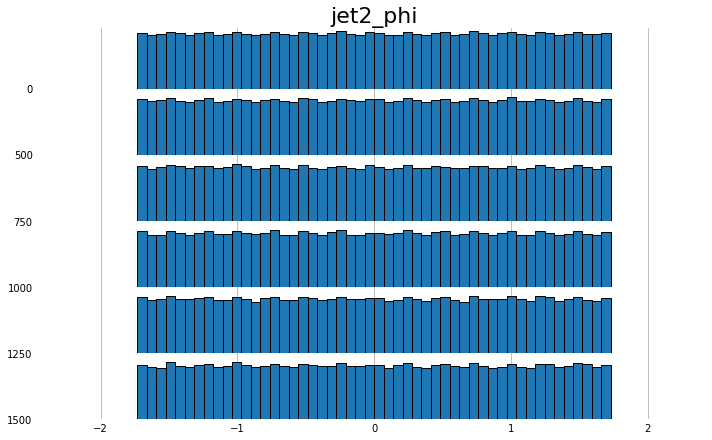

<Figure size 432x288 with 0 Axes>

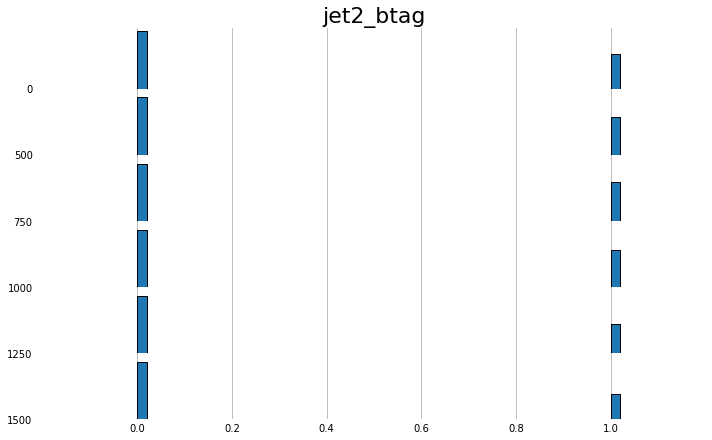

<Figure size 432x288 with 0 Axes>

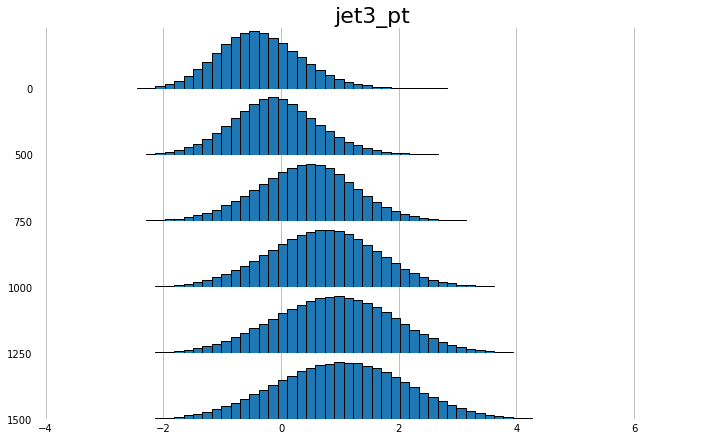

<Figure size 432x288 with 0 Axes>

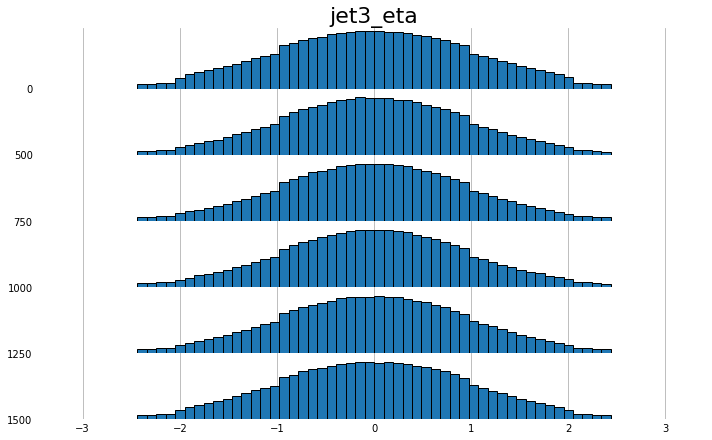

<Figure size 432x288 with 0 Axes>

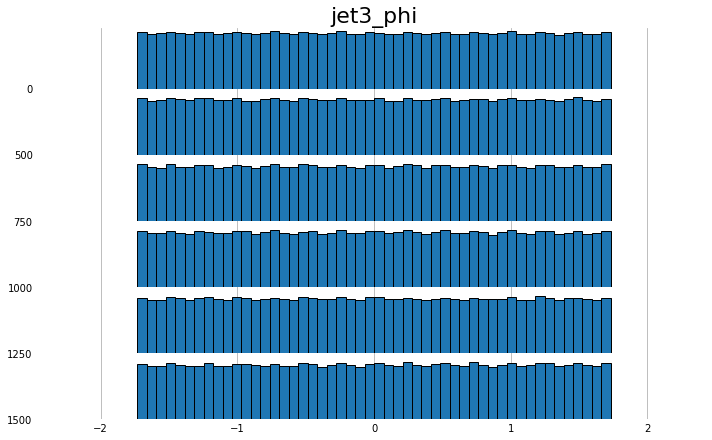

<Figure size 432x288 with 0 Axes>

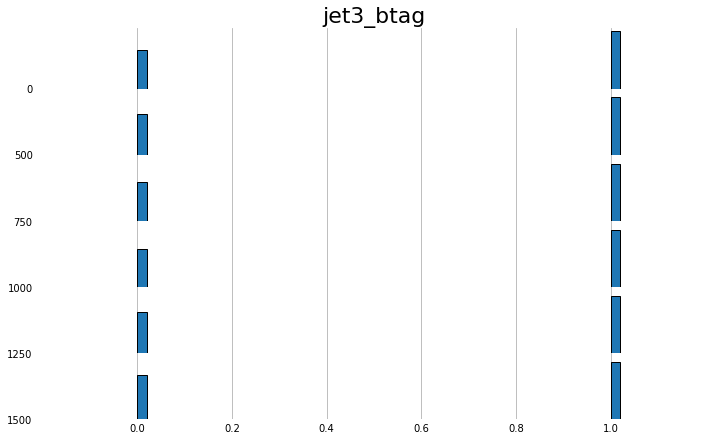

<Figure size 432x288 with 0 Axes>

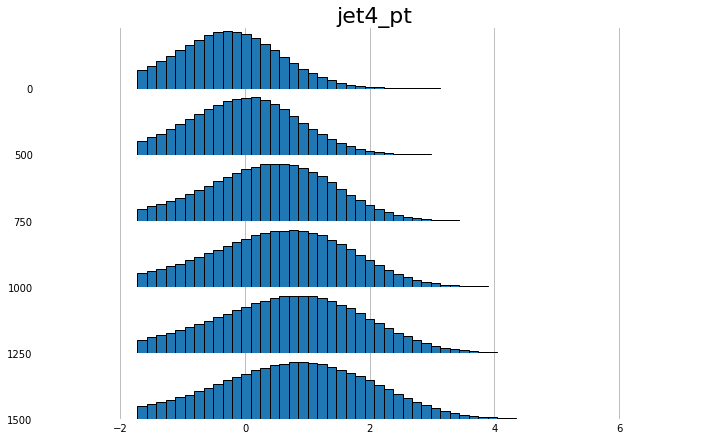

<Figure size 432x288 with 0 Axes>

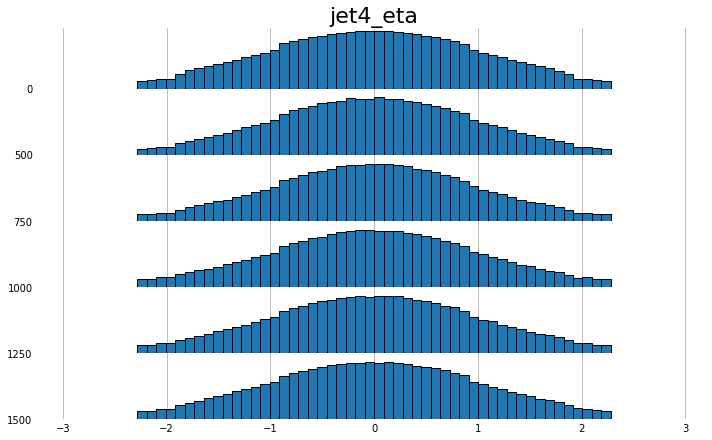

<Figure size 432x288 with 0 Axes>

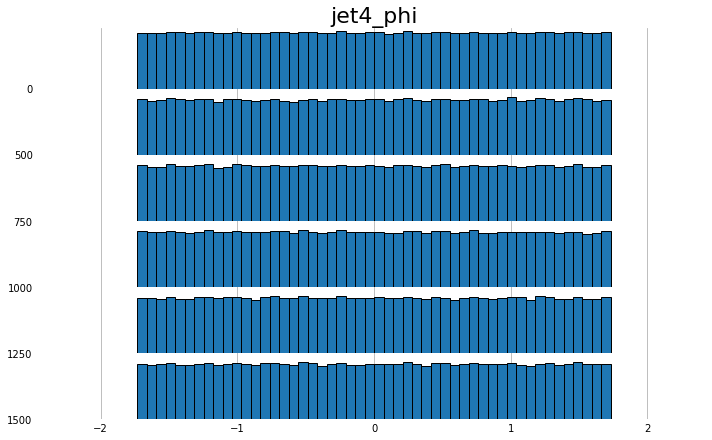

<Figure size 432x288 with 0 Axes>

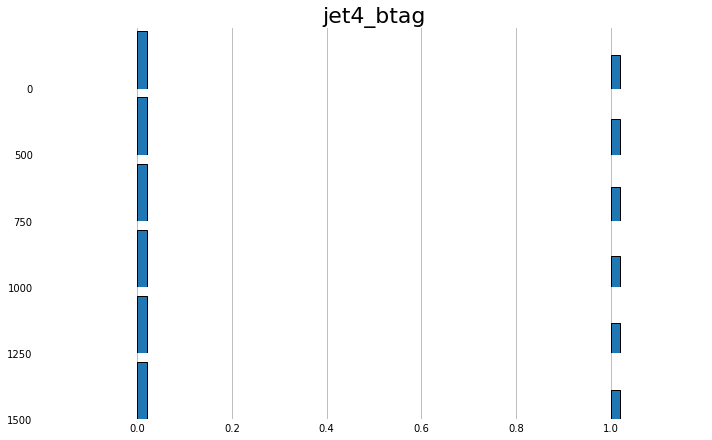

<Figure size 432x288 with 0 Axes>

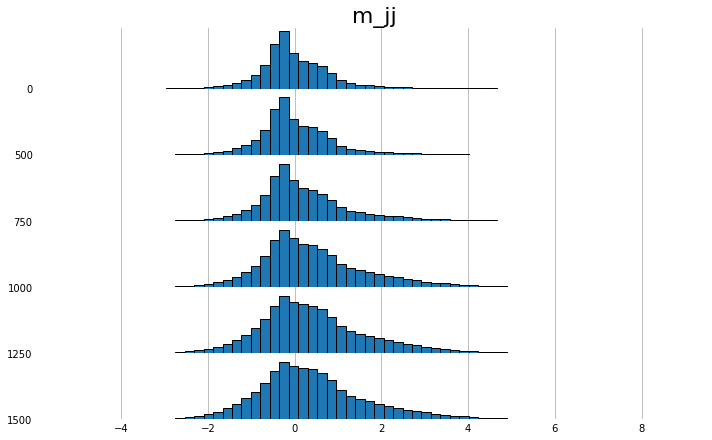

<Figure size 432x288 with 0 Axes>

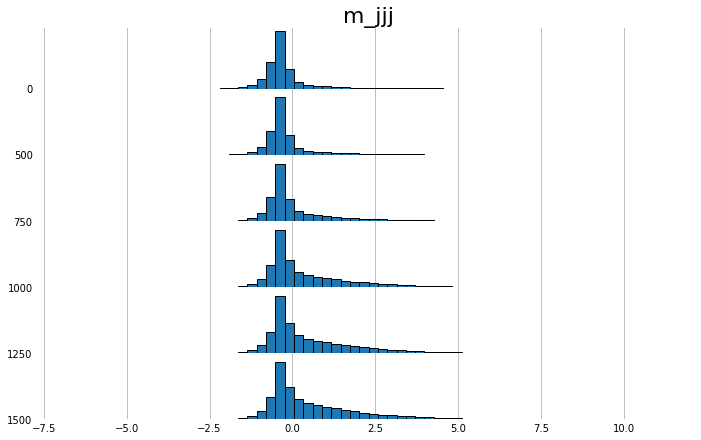

<Figure size 432x288 with 0 Axes>

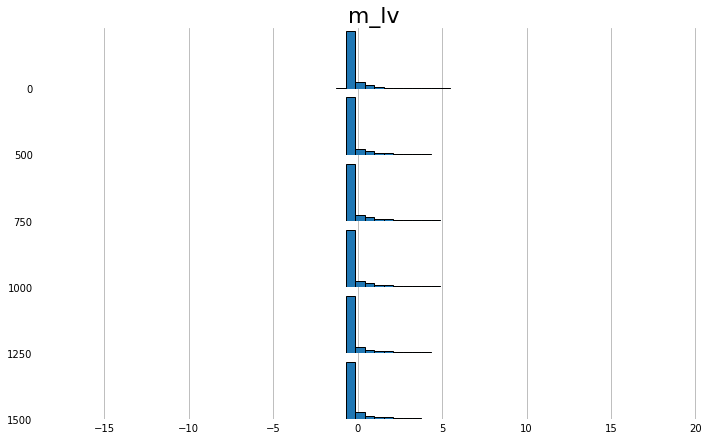

<Figure size 432x288 with 0 Axes>

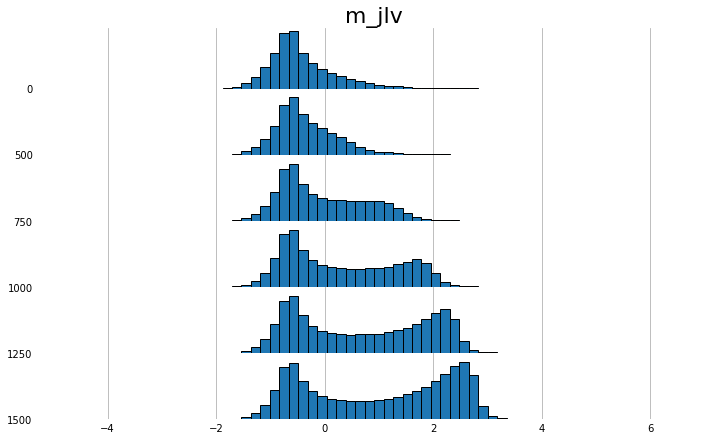

<Figure size 432x288 with 0 Axes>

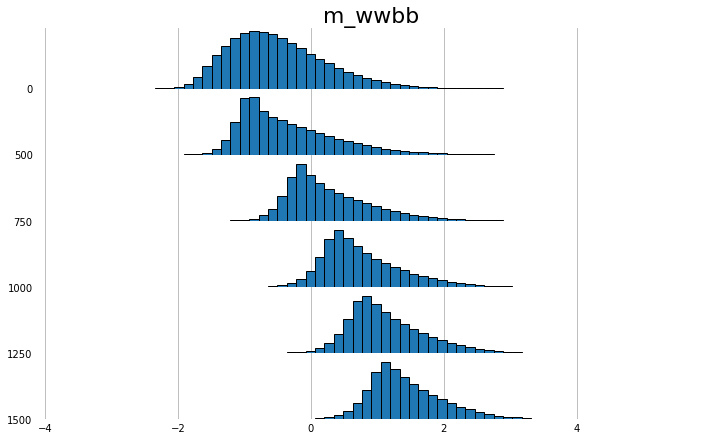

In [9]:
dfdensity=df.iloc[:,1:].query('jet1_btag==1 and jet2_btag==1')
names=dfdensity.iloc[:,:-1].columns

#Plot histogram: 

print("SAME THAN FIRST PLOT BUT WHEN BTAGS ARE 1-1-0-0")


for i in names: 
    plt.figure()
    fig, axes = joypy.joyplot(dfdensity, column=[i], by="mass", ylim='own', figsize=(10,6),hist="True", bins=70, overlap=0,
                          grid=True, legend=False)

    # Decoration
    plt.title(i, fontsize=22)
    plt.show()
    fig.savefig(pwdnorm +i + '_btag_correct.png')    
    
dfdensity=df.iloc[:,1:].query('jet1_btag==0 or jet2_btag==0')

print("SAME THAN FIRST PLOT BUT WHEN BTAGS ARE 0-0-1-1")

#Plot histogram: 

for i in names: 
    plt.figure()
    fig, axes = joypy.joyplot(dfdensity, column=[i], by="mass", ylim='own', figsize=(10,6),hist="True", bins=70, overlap=0,
                          grid=True, legend=False)

    # Decoration
    plt.title(i, fontsize=22)
    plt.show()
    fig.savefig(pwdnorm +i + '_btag_uncorrect.png')    


## Correlation Plot

SCORRELATION PLOT FOR NORMALIZED DATA (7 MILLIONS)


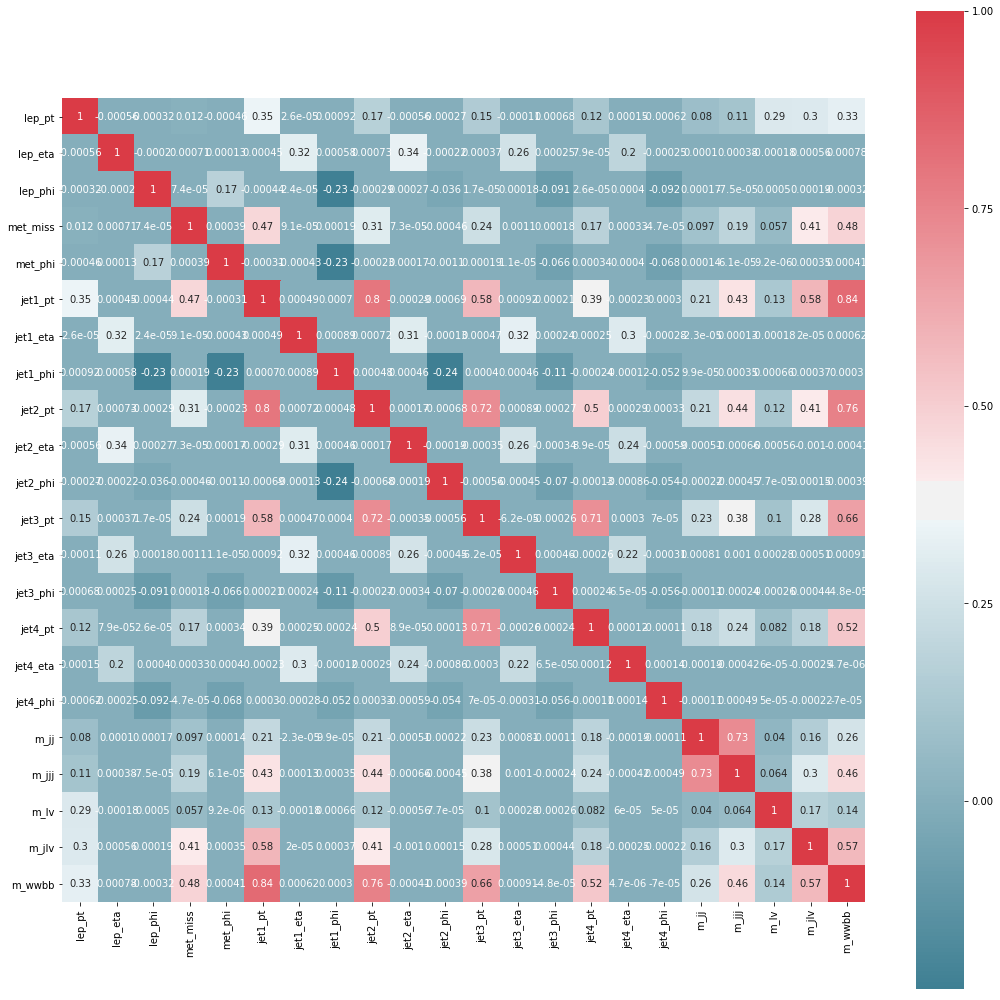

In [10]:

print("SCORRELATION PLOT FOR NORMALIZED DATA (7 MILLIONS)")

plt.figure(figsize=(18,18))
corr_sin_norm=df.corr()
corr_sin_norm=corr_sin_norm.round(2)
g=sns.heatmap(corr_sin_norm, mask=np.zeros_like(df.corr(), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, annot = True, annot_kws = {"size" : 10},cbar=False)
plt.title('Matriz de correlacion lineal entre variables', fontsize=20)
plt.show()
fig = g.get_figure()
fig.savefig(pwdsnorm  + 'correlation.png')   
#Keep in mind: categorical as number of jets are not HERE!



High correlations between:  (>70)
    - jet1_pt, jet2_pt
    - jet2_pt, jet3_pt
    - jet3_pt, jet4_pt
    
    - m_wwbb, jet1_pt
    - m_wwbb, jet2_pt

## Manifold learning (TSNE)

Reduction to two variables

In [11]:
'''tsne = manifold.TSNE(n_components=2, init='pca',n_iter=250)
X_tsne = tsne.fit_transform(df.drop('mass',axis=1))    #droping mass, obviously we cannot use
#np.unique(y)'''

"tsne = manifold.TSNE(n_components=2, init='pca',n_iter=250)\nX_tsne = tsne.fit_transform(df.drop('mass',axis=1))    #droping mass, obviously we cannot use\n#np.unique(y)"

In [12]:
'''scatter_x = X_tsne[:,0]
scatter_y = X_tsne[:,1]
group = df.label
cdict = {0: 'green', 1: 'red'}

fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g],label = g)
ax.legend()
plt.show()'''

"scatter_x = X_tsne[:,0]\nscatter_y = X_tsne[:,1]\ngroup = df.label\ncdict = {0: 'green', 1: 'red'}\n\nfig, ax = plt.subplots()\nfor g in np.unique(group):\n    ix = np.where(group == g)\n    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g],label = g)\nax.legend()\nplt.show()"

In [13]:
'''#grouping by mass: 
group = df.mass
cdict = {0: 'green', 500: 'blue',750: 'purple',1000: 'orange',1250: 'red' , 1500:'brown'}

fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g],label = g)
ax.legend()
plt.show()
'''

"#grouping by mass: \ngroup = df.mass\ncdict = {0: 'green', 500: 'blue',750: 'purple',1000: 'orange',1250: 'red' , 1500:'brown'}\n\nfig, ax = plt.subplots()\nfor g in np.unique(group):\n    ix = np.where(group == g)\n    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g],label = g)\nax.legend()\nplt.show()\n"

We cannot see practically anything. All points are overlaped, RESULT ARE SAVED IN A FILE

## Proportion of B-tag

In [14]:

print("BTAGS PROPORTION IN NORMALIZED DATA(7MILLIONS)")


pd.crosstab([df.jet1_btag, df.jet2_btag], [df.jet3_btag, df.jet4_btag],
            rownames=['1_btag', "2_btag"],
            colnames=['3_btag', "4_btag"])

BTAGS PROPORTION IN NORMALIZED DATA(7MILLIONS)


3_btag               0                1        
4_btag               0       1        0       1
1_btag 2_btag                                  
0      0         40208  149568   199576  392156
       1        256980  540035   982898       0
1      0        300669  652445  1238027       0
       1       2247438       0        0       0

**btag vs mass**

PLOT OF PREVIOUS TABLE


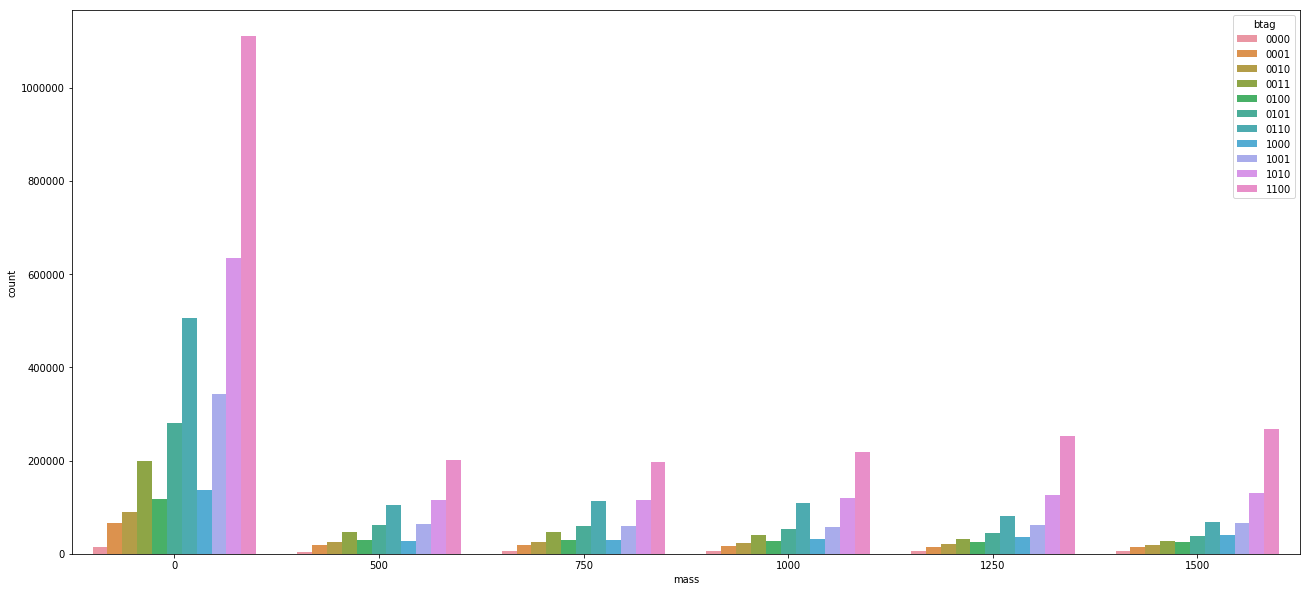

In [15]:
#making crosstab

print("PLOT OF PREVIOUS TABLE")

a=pd.crosstab([df.mass], [df.jet1_btag, df.jet2_btag, df.jet3_btag, df.jet4_btag],
            colnames=['1_btag', "2_btag",'3_btag', "4_btag"], rownames= ["mass"])
#correct names
a.columns=["0000","0001","0010","0011","0100","0101","0110","1000","1001","1010","1100"]
#adding mass
a = a.reset_index()
a["mass"] = a["mass"].astype('category')
#key-value
a=pd.melt(a, id_vars=['mass'], value_vars=a.columns[1:])
a.columns=['mass','btag','count']

plt.figure(figsize=(22,10))
g=sns.barplot(x="mass", y="count", hue="btag", data=a)

plt.show()
fig = g.get_figure()
fig.savefig(pwdsnorm  + 'btags.png')    


# DATA WITHOUT NORMALIZATION (SAME CODE: )

In [2]:
#load

df=pd.read_pickle("../data/sin_norm/trainpickle")

df_originaltest=pd.read_pickle("../data/sin_norm/testpickle")

#df=pd.read_pickle("../data/sin_norm/trainsimplepickle")
#df_originaltest=pd.read_pickle("../data/sin_norm/testsimplepickle")
df.describe() 
print('masses distribution FOR REAL DATA :noise, 500,750,1000,1250,1500')

df.mass.value_counts()


masses distribution FOR REAL DATA :noise, 500,750,1000,1250,1500


0       13722105
750      6225766
1250     5779862
1000     5588939
500      4631045
1500     4036025
Name: mass, dtype: int64

## plots

NON NORMALIZED DISTRIBUTIONS (50 MILLIONS DATA)


<Figure size 432x288 with 0 Axes>

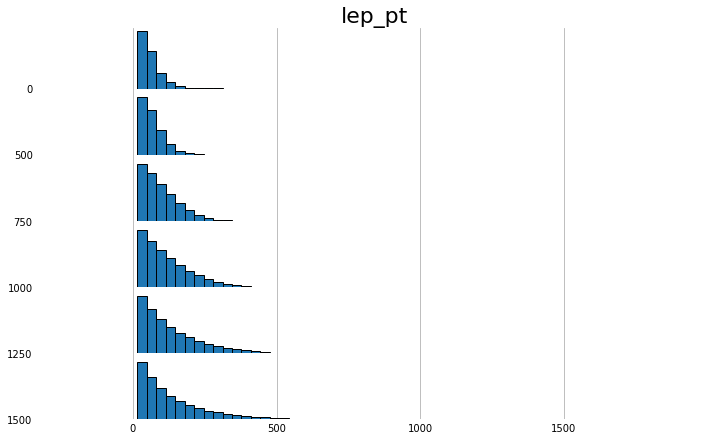

<Figure size 432x288 with 0 Axes>

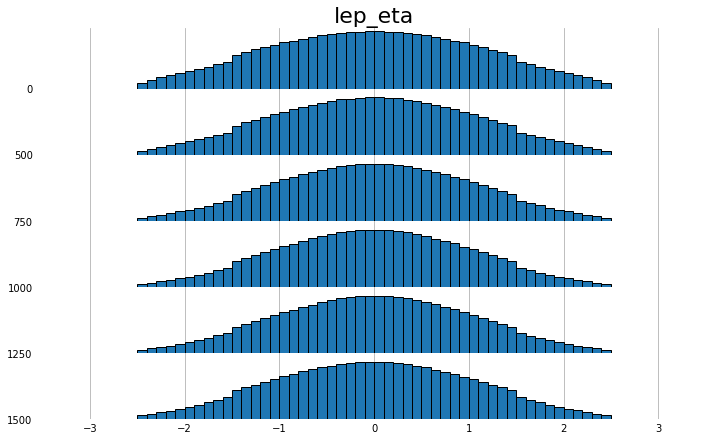

<Figure size 432x288 with 0 Axes>

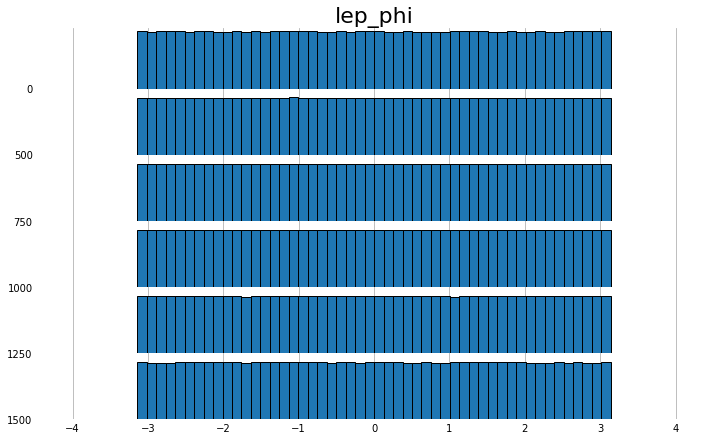

<Figure size 432x288 with 0 Axes>

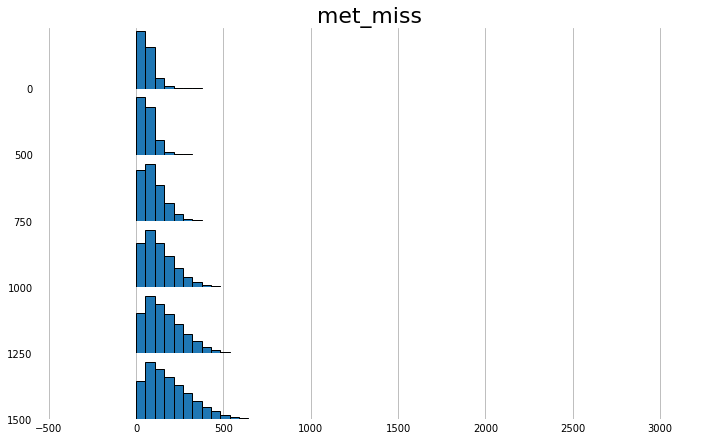

<Figure size 432x288 with 0 Axes>

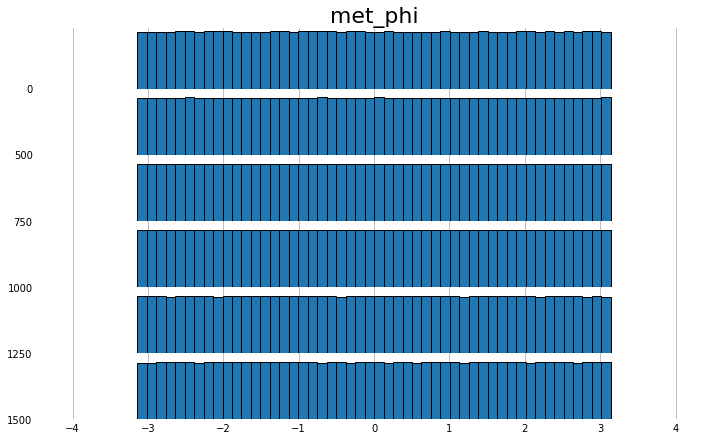

<Figure size 432x288 with 0 Axes>

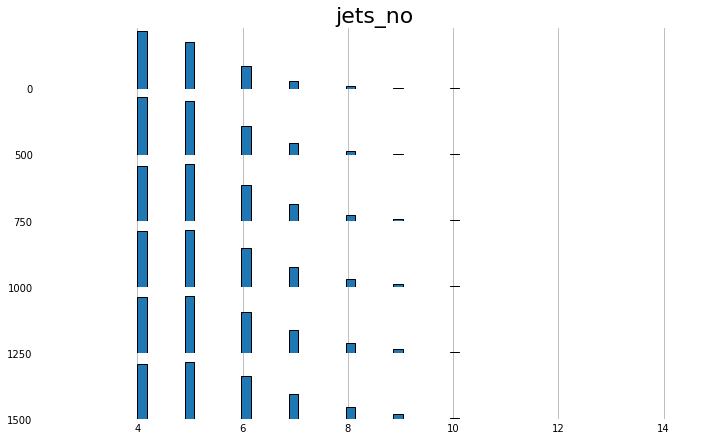

<Figure size 432x288 with 0 Axes>

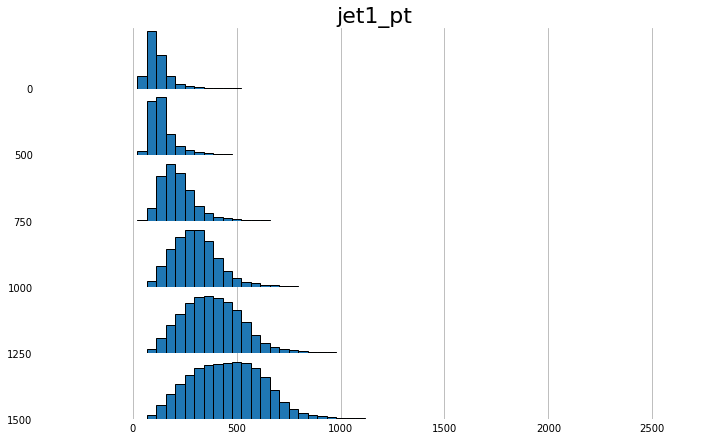

<Figure size 432x288 with 0 Axes>

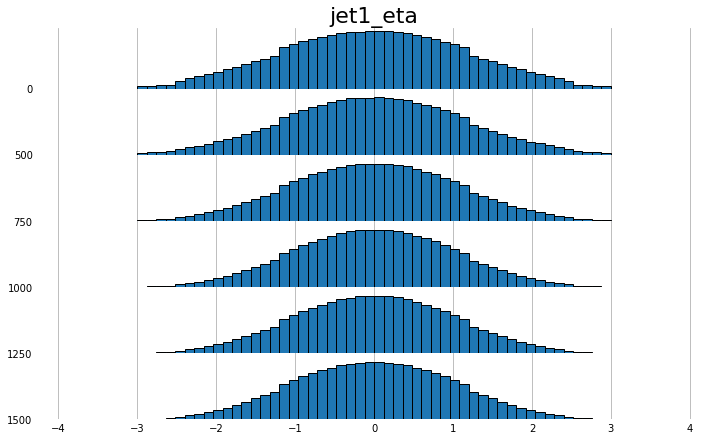

<Figure size 432x288 with 0 Axes>

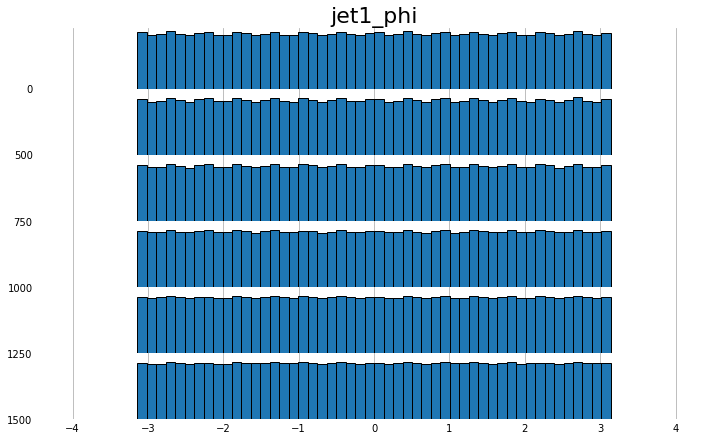

<Figure size 432x288 with 0 Axes>

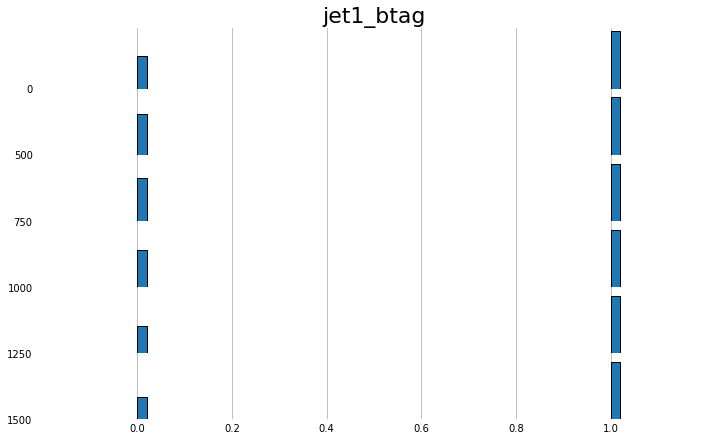

<Figure size 432x288 with 0 Axes>

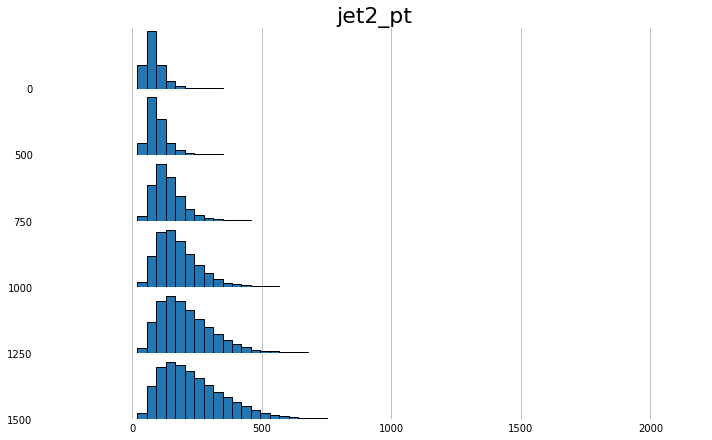

<Figure size 432x288 with 0 Axes>

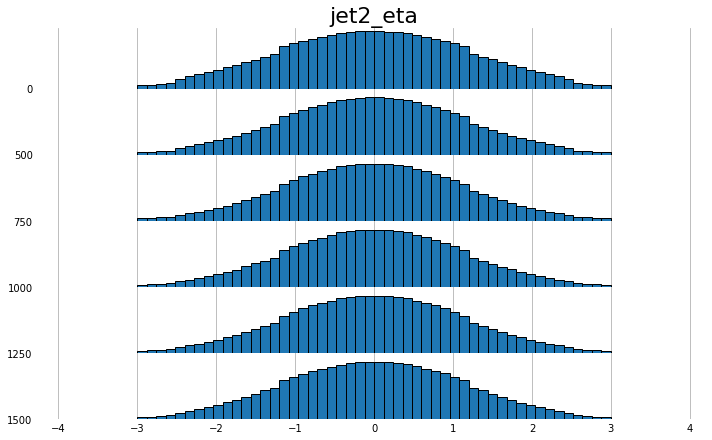

<Figure size 432x288 with 0 Axes>

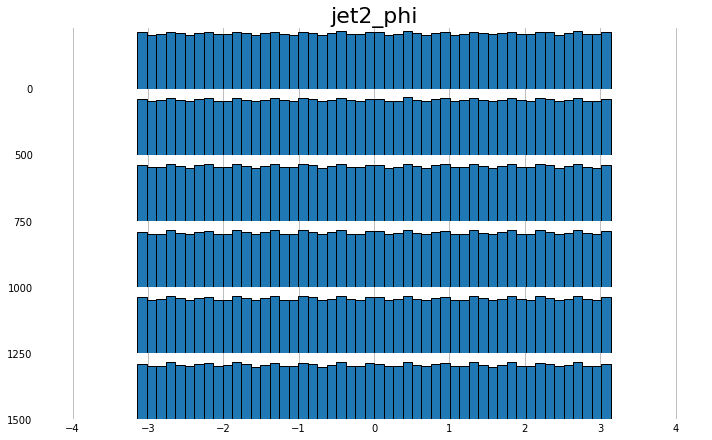

<Figure size 432x288 with 0 Axes>

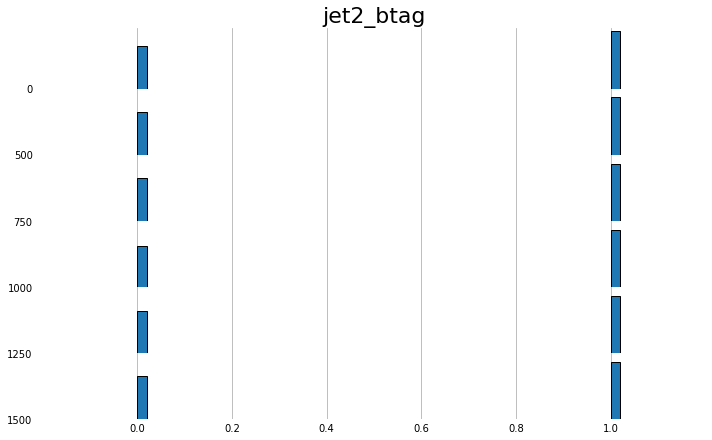

<Figure size 432x288 with 0 Axes>

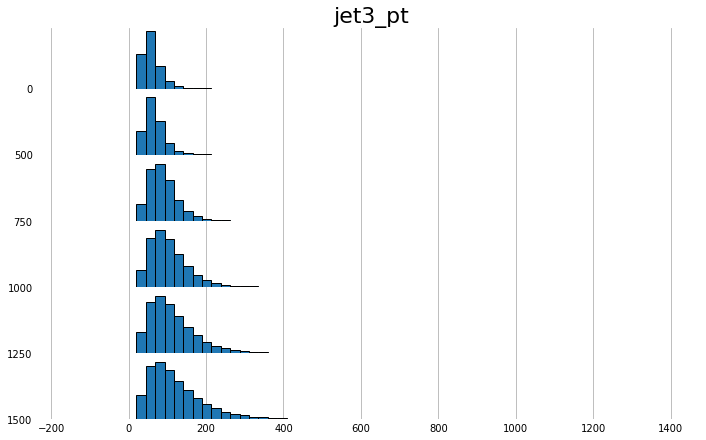

<Figure size 432x288 with 0 Axes>

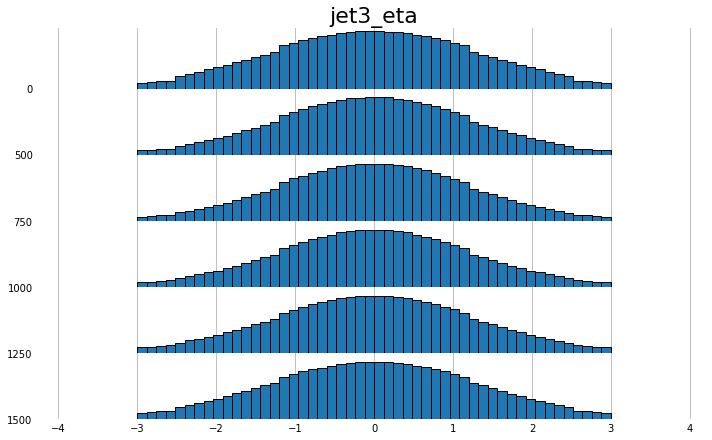

<Figure size 432x288 with 0 Axes>

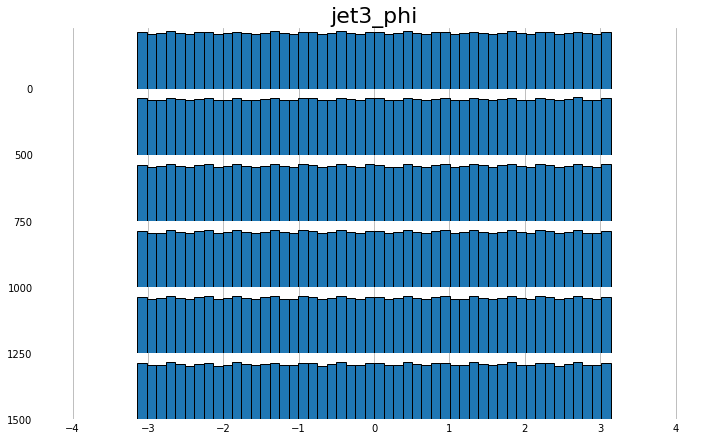

<Figure size 432x288 with 0 Axes>

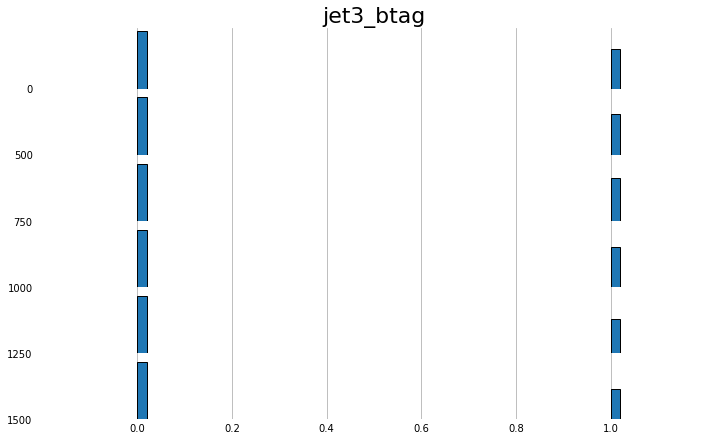

<Figure size 432x288 with 0 Axes>

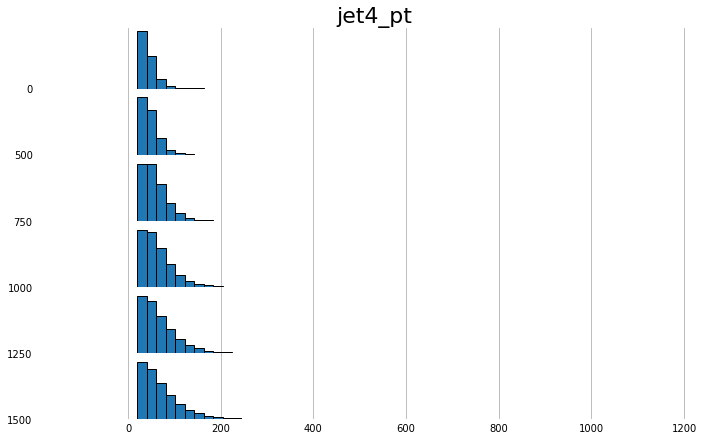

<Figure size 432x288 with 0 Axes>

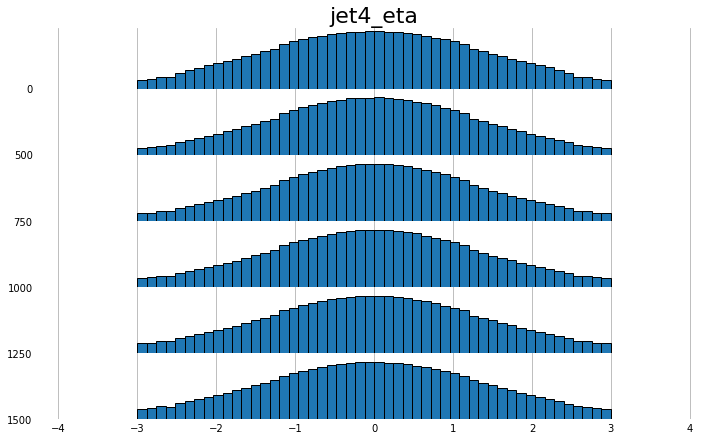

<Figure size 432x288 with 0 Axes>

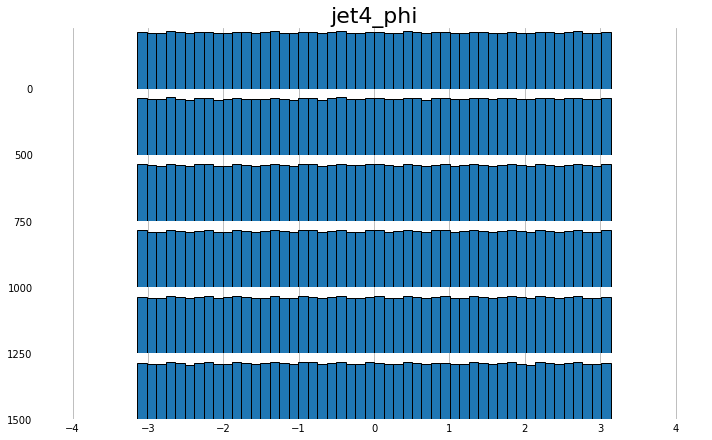

<Figure size 432x288 with 0 Axes>

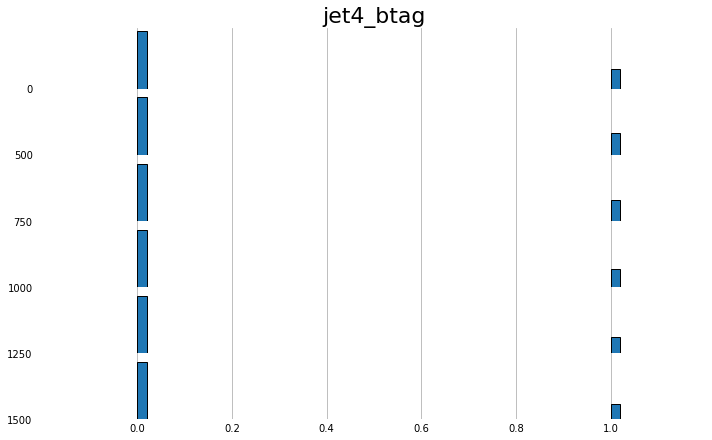

<Figure size 432x288 with 0 Axes>

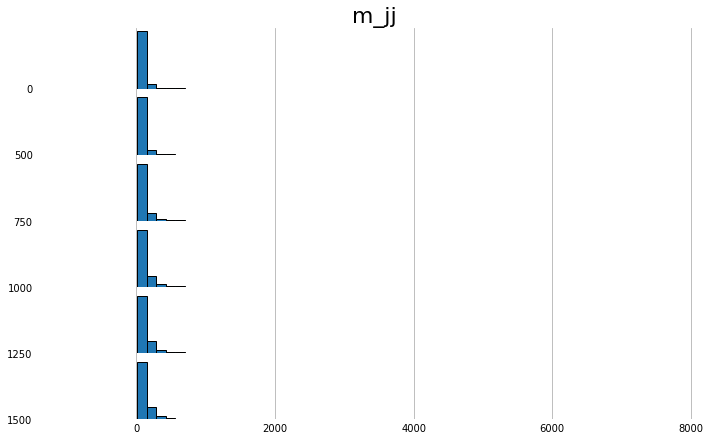

<Figure size 432x288 with 0 Axes>

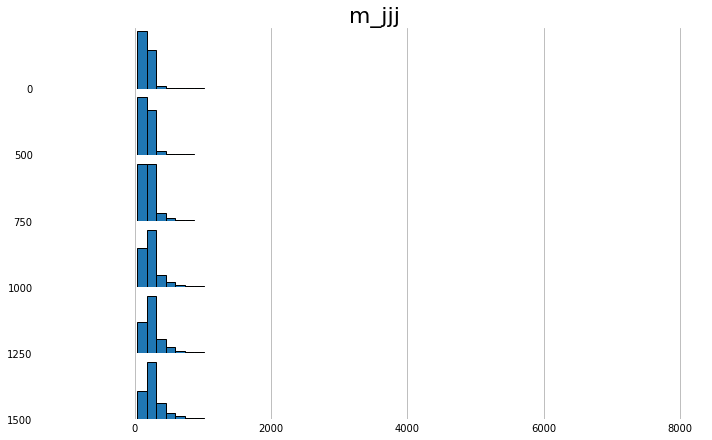

<Figure size 432x288 with 0 Axes>

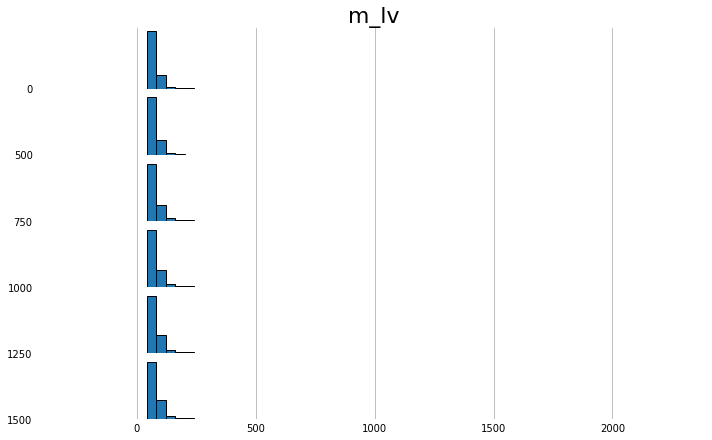

<Figure size 432x288 with 0 Axes>

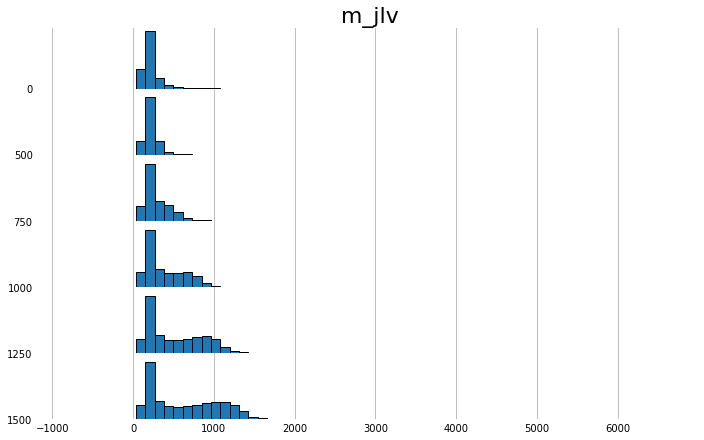

<Figure size 432x288 with 0 Axes>

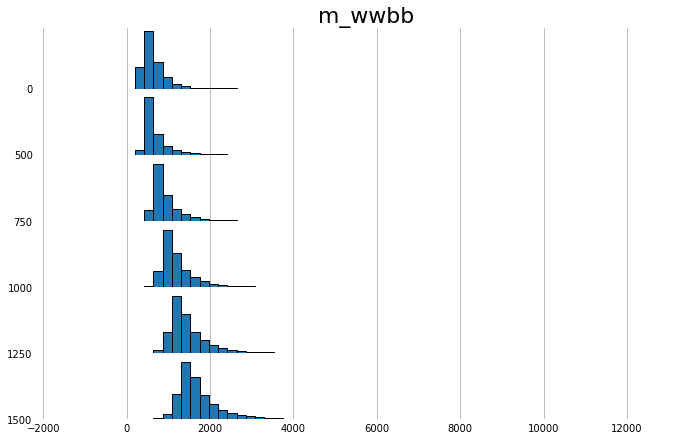

In [17]:
#Plot histogram: 

dfdensity=df.iloc[:,1:]
names=dfdensity.iloc[:,:-1].columns

print("NON NORMALIZED DISTRIBUTIONS (50 MILLIONS DATA)")


for i in names: 
    plt.figure()
    fig, axes = joypy.joyplot(dfdensity, column=[i], by="mass", ylim='own', figsize=(10,6),hist="True", bins=70, overlap=0,
                          grid=True, legend=False)

    # Decoration
    plt.title(i, fontsize=22)
    plt.show()
    fig.savefig(pwdsnorm +i + '.png')
    


**REMOVING OUTLIERS**

SAME THAN BEFORE BUT WITH ZOOM


<Figure size 432x288 with 0 Axes>

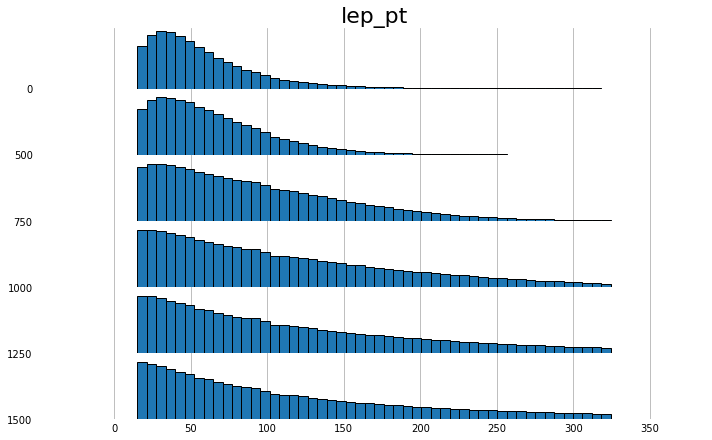

<Figure size 432x288 with 0 Axes>

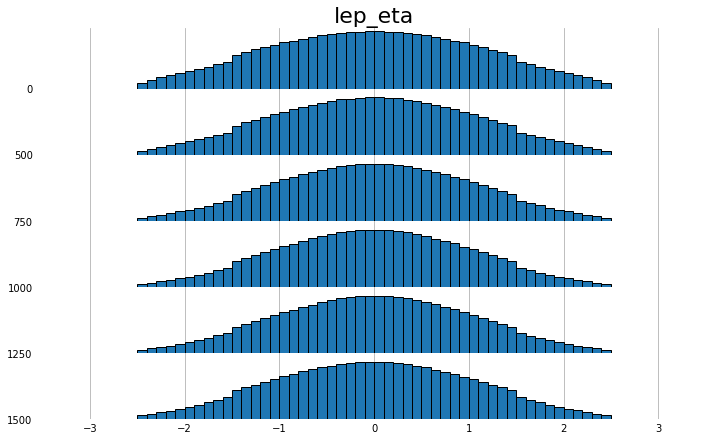

<Figure size 432x288 with 0 Axes>

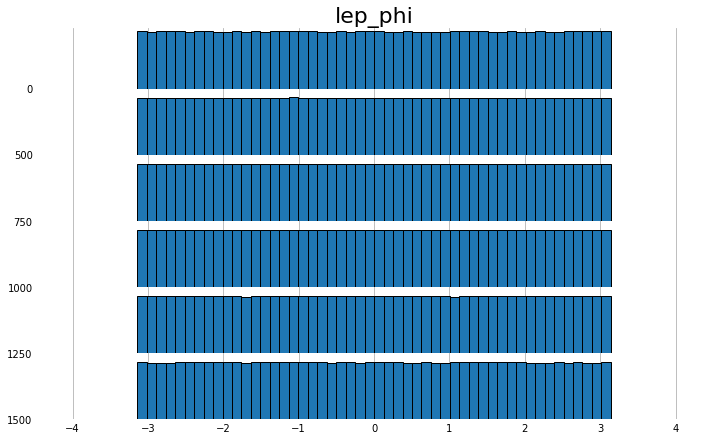

<Figure size 432x288 with 0 Axes>

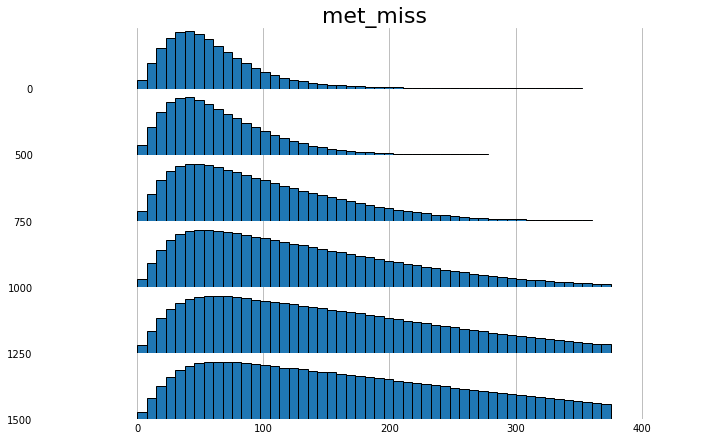

<Figure size 432x288 with 0 Axes>

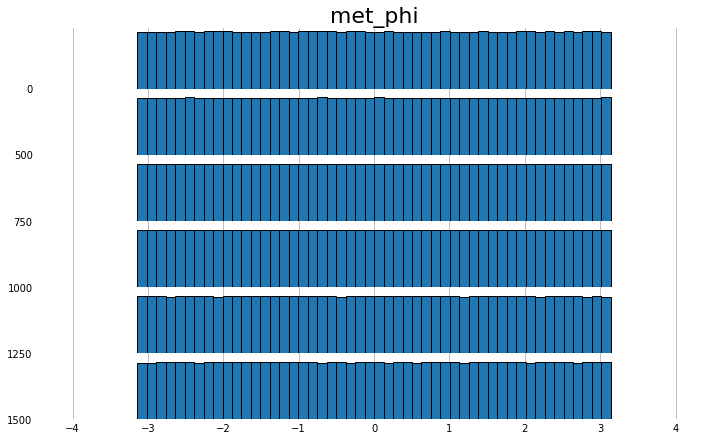

<Figure size 432x288 with 0 Axes>

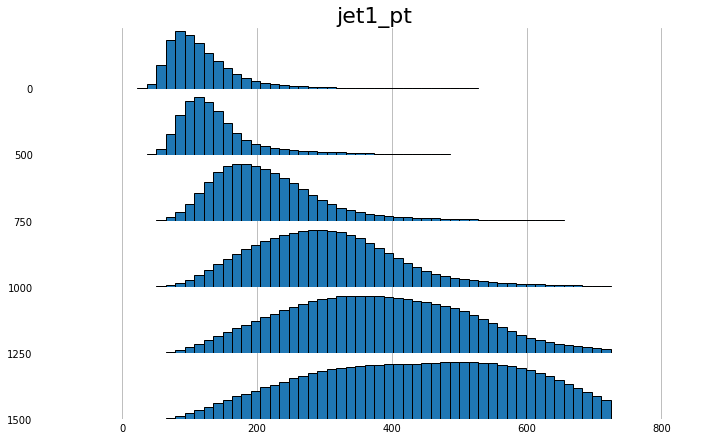

<Figure size 432x288 with 0 Axes>

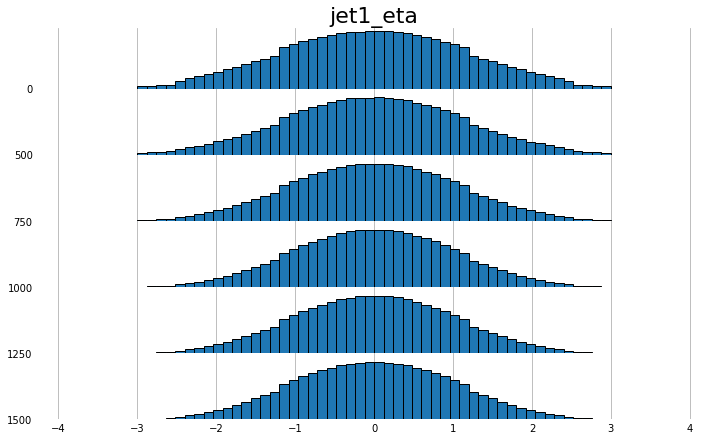

<Figure size 432x288 with 0 Axes>

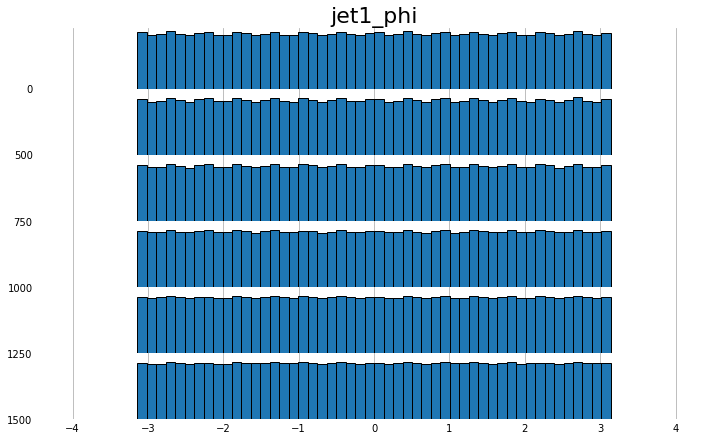

<Figure size 432x288 with 0 Axes>

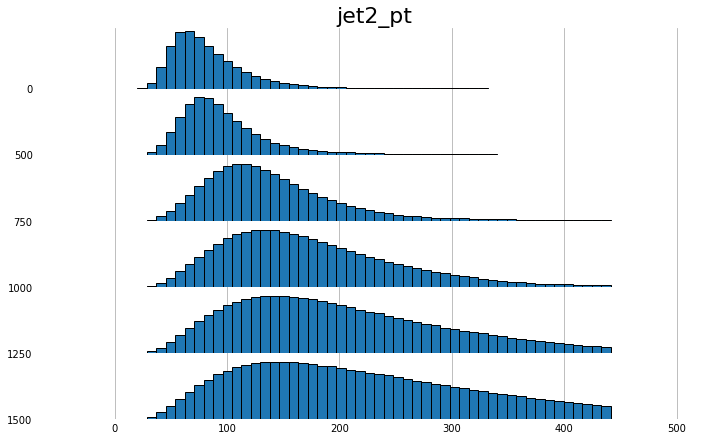

<Figure size 432x288 with 0 Axes>

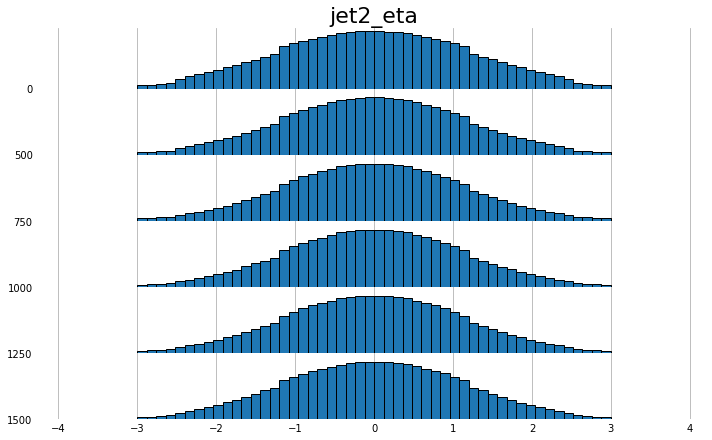

<Figure size 432x288 with 0 Axes>

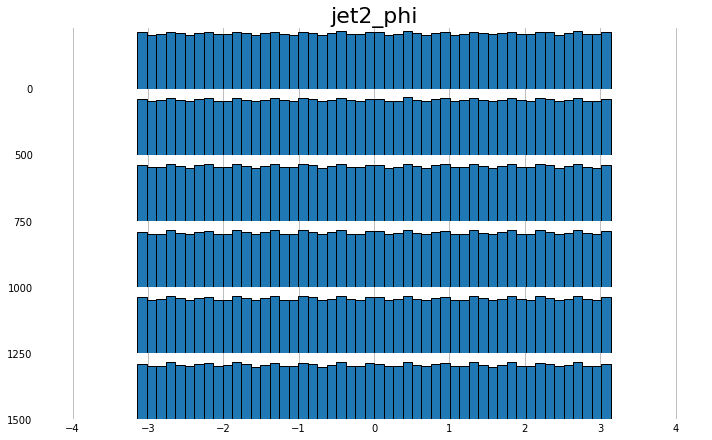

<Figure size 432x288 with 0 Axes>

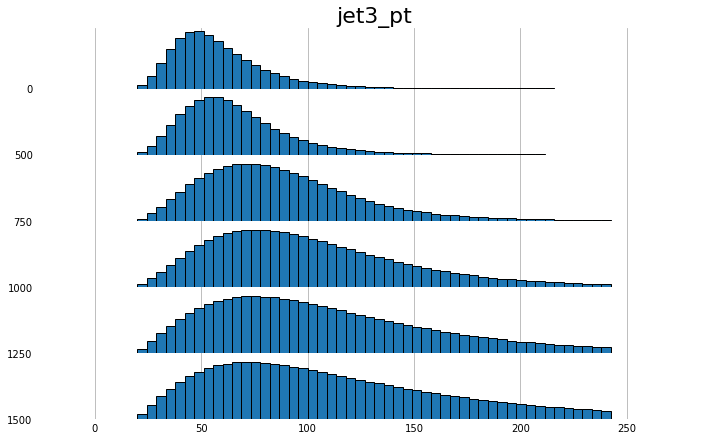

<Figure size 432x288 with 0 Axes>

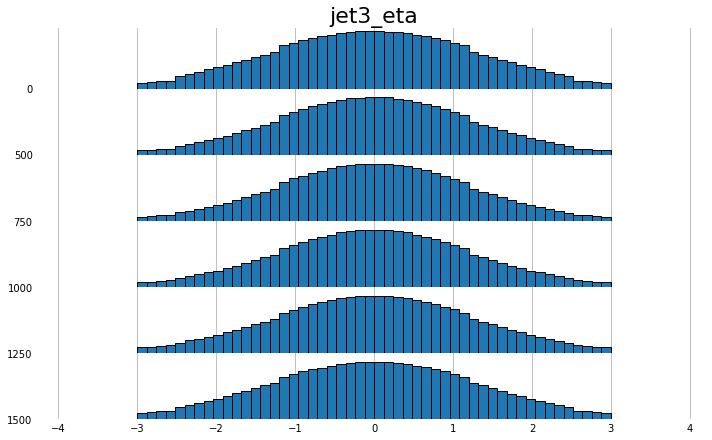

<Figure size 432x288 with 0 Axes>

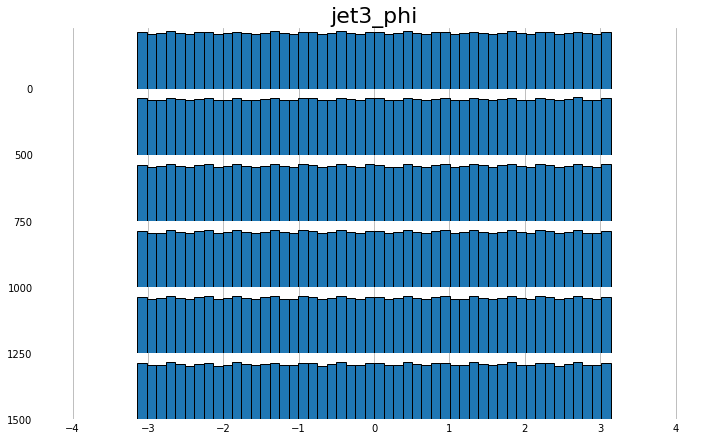

<Figure size 432x288 with 0 Axes>

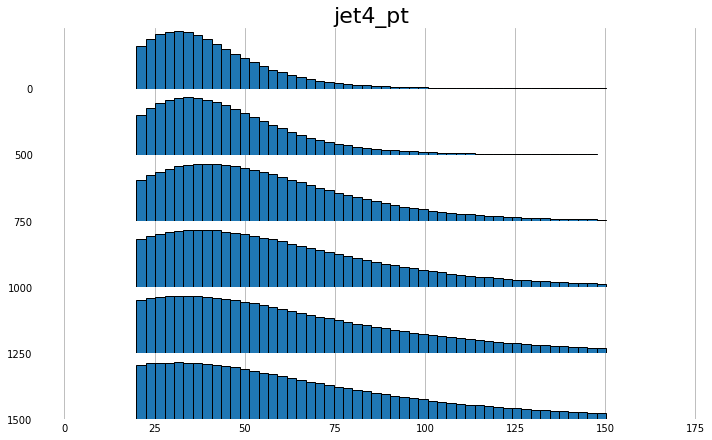

<Figure size 432x288 with 0 Axes>

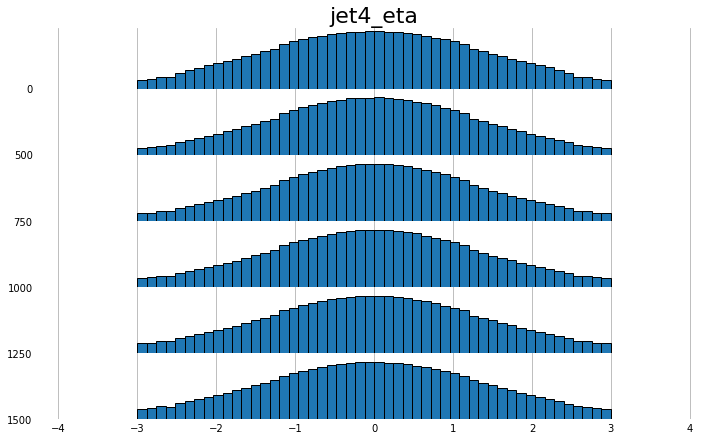

<Figure size 432x288 with 0 Axes>

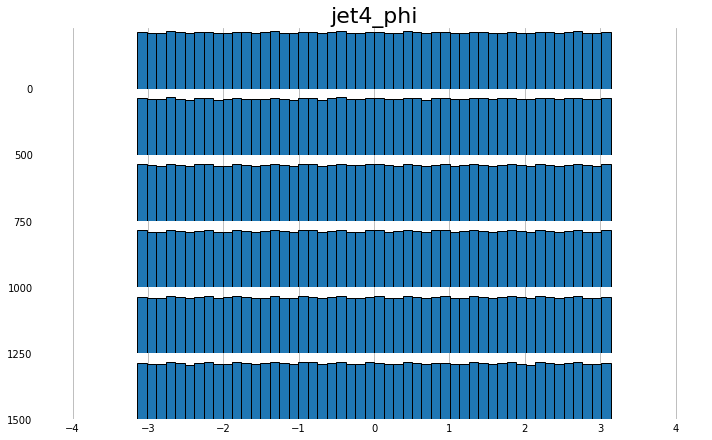

<Figure size 432x288 with 0 Axes>

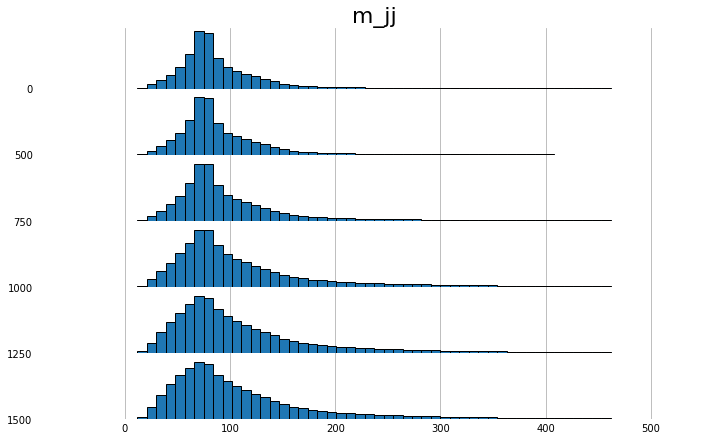

m_jjj


<Figure size 432x288 with 0 Axes>

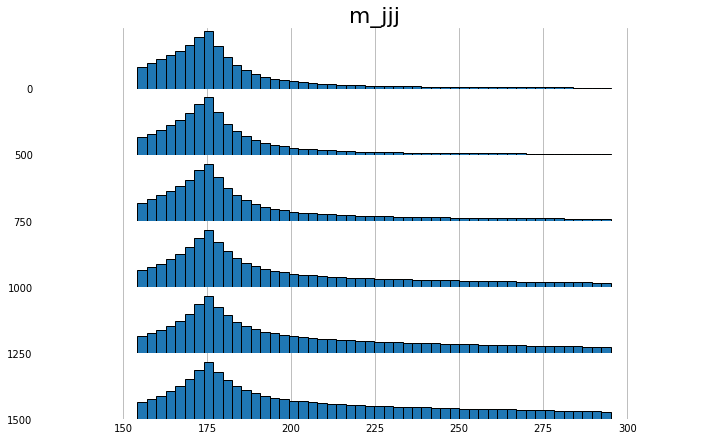

m_lv


<Figure size 432x288 with 0 Axes>

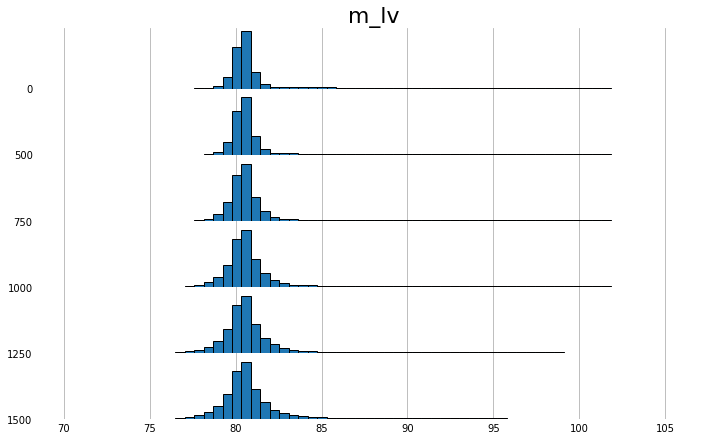

<Figure size 432x288 with 0 Axes>

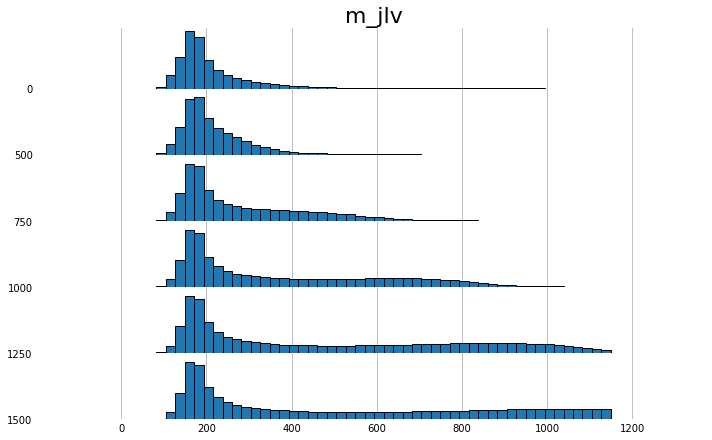

<Figure size 432x288 with 0 Axes>

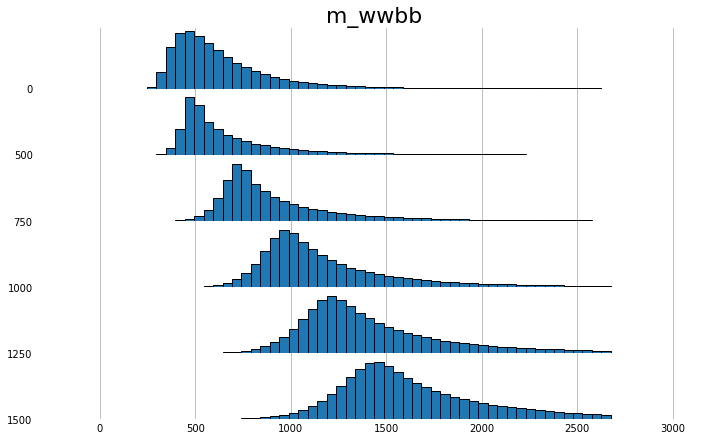

In [18]:
#Removing outliers to print diagrams: 

dfdensity=df.iloc[:,1:]
names=dfdensity.iloc[:,:-1].columns

print("SAME THAN BEFORE BUT WITH ZOOM")

#Plot histogram: 

for i in names: 
    if dfdensity[i].dtypes=='float64': 
        
        df_sinout = dfdensity.copy()
        
        if i == "m_jjj" or  i== "m_lv":

            df_sinout=df_sinout[~((df_sinout[i]-df_sinout[i].mean()).abs() > 0.5*df_sinout[i].std())]
            ### outliers are removing for each column and printed, for the next column the whole dataset is loaded again. 
            ### "normal column outliers > 3"" , m_jjj and m_ñv (high std) > 0.5, there is no criteria , is just the best way od visualize 
            print(i)
       
        else: 
            df_sinout=df_sinout[~((df_sinout[i]-df_sinout[i].mean()).abs() > 3*df_sinout[i].std())]


        plt.figure()
        fig, axes = joypy.joyplot(df_sinout, column=[i], by="mass", ylim='own', figsize=(10,6),hist="True", bins=70, overlap=0,
                              grid=True, legend=False)

        # Decoration
        plt.title(i, fontsize=22)
        plt.show()
        fig.savefig(pwdsnorm +i + '_outlier.png')

** DIFFERENCE BETWEEN BTAG CORRECT AND UNCORRECT** 

SAME THAN FIRST PLOT BUT WHEN BTAGS ARE 1-1-0-0


<Figure size 432x288 with 0 Axes>

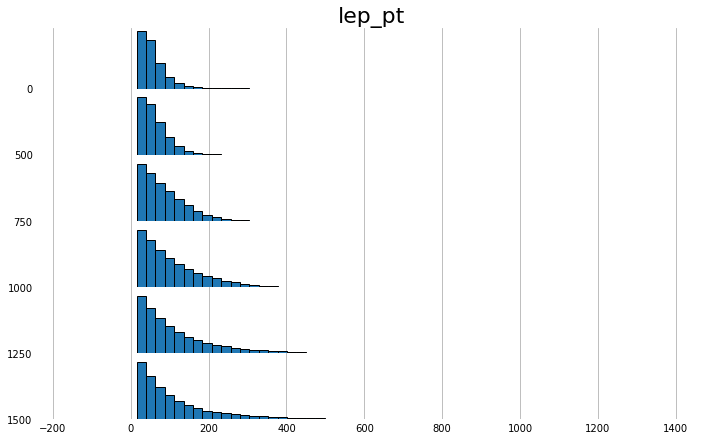

<Figure size 432x288 with 0 Axes>

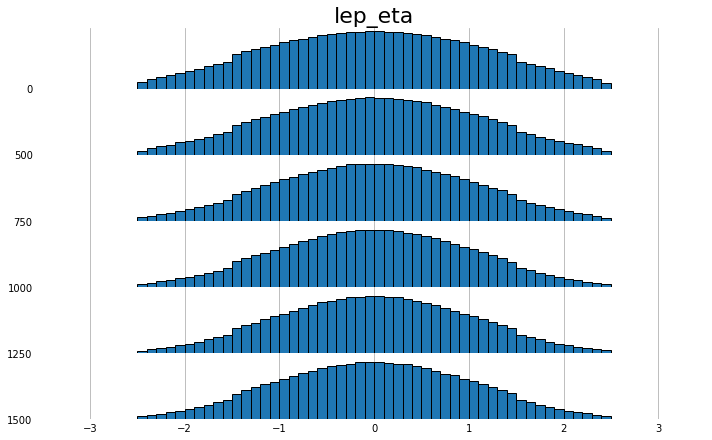

<Figure size 432x288 with 0 Axes>

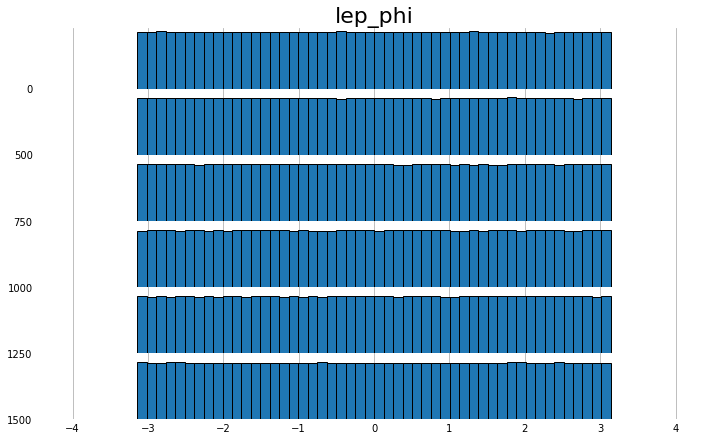

<Figure size 432x288 with 0 Axes>

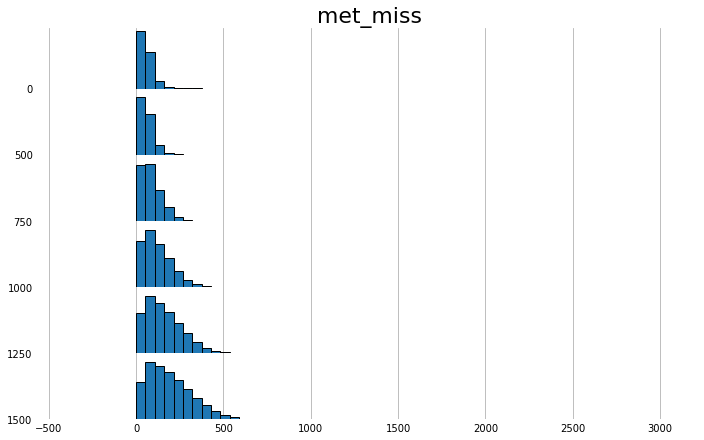

<Figure size 432x288 with 0 Axes>

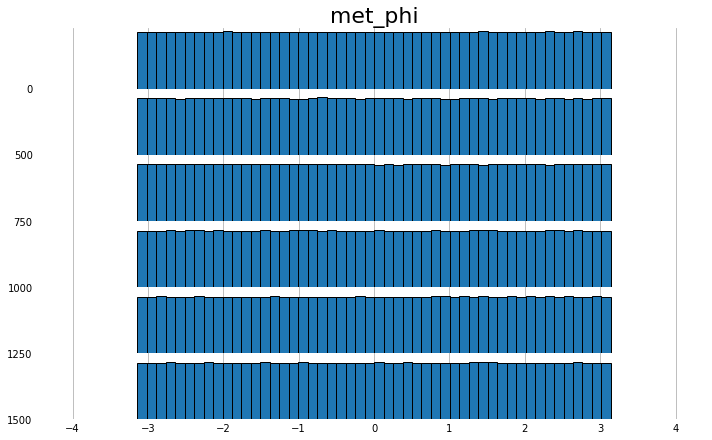

<Figure size 432x288 with 0 Axes>

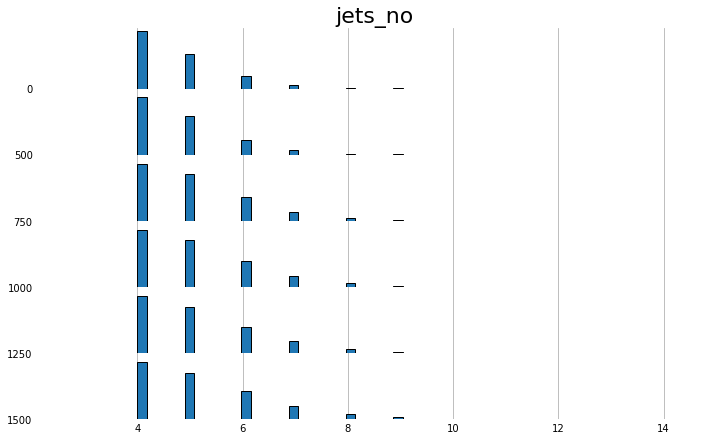

<Figure size 432x288 with 0 Axes>

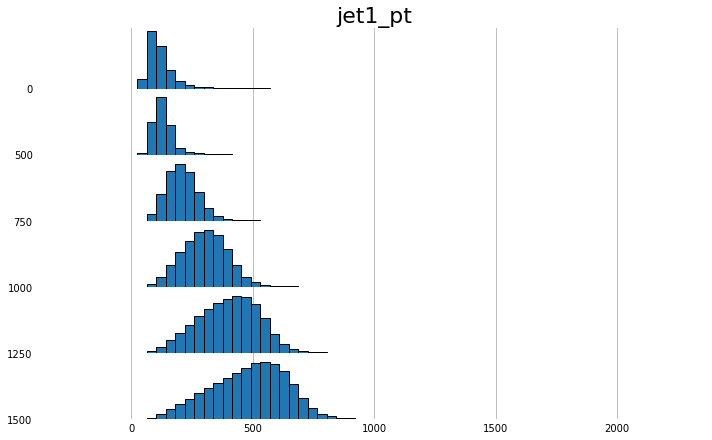

<Figure size 432x288 with 0 Axes>

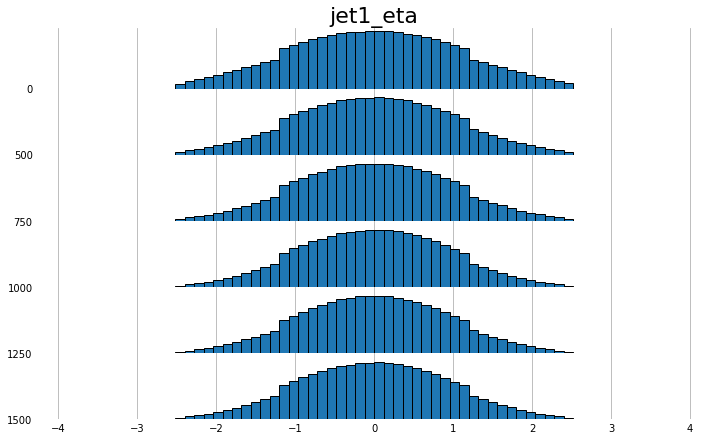

<Figure size 432x288 with 0 Axes>

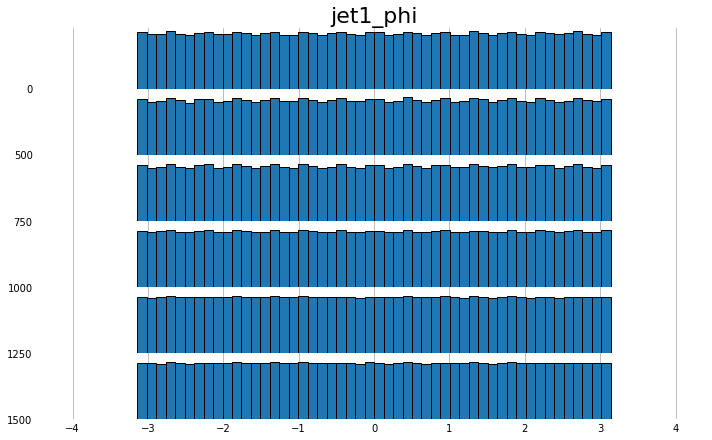

<Figure size 432x288 with 0 Axes>

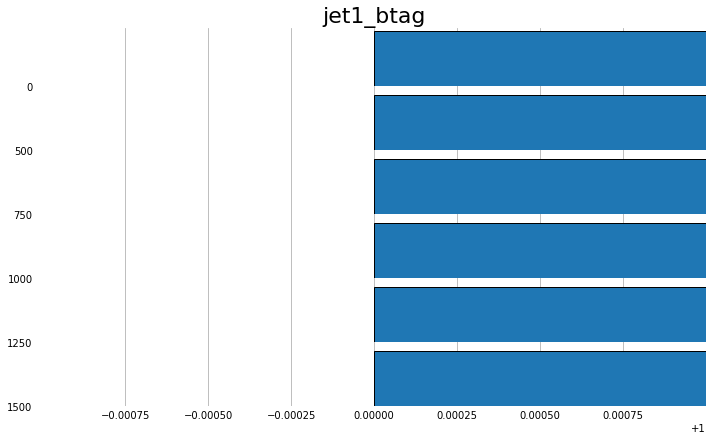

<Figure size 432x288 with 0 Axes>

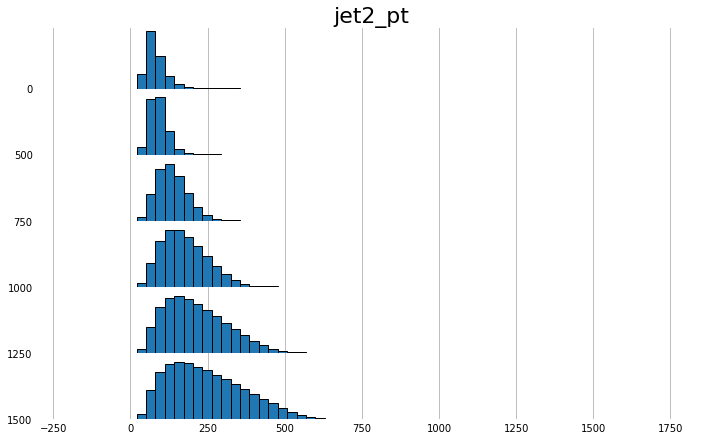

<Figure size 432x288 with 0 Axes>

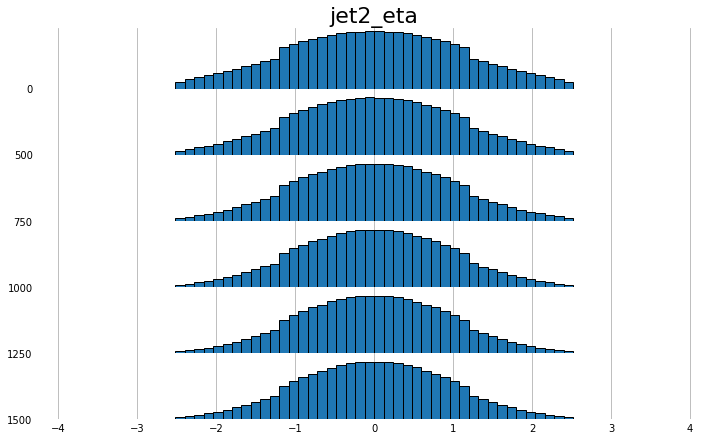

<Figure size 432x288 with 0 Axes>

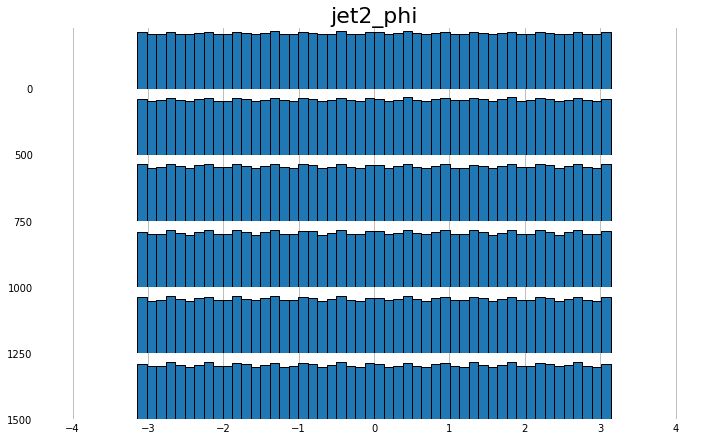

<Figure size 432x288 with 0 Axes>

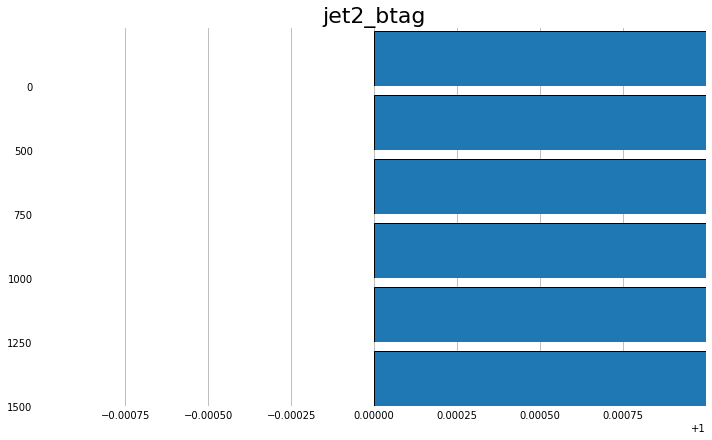

<Figure size 432x288 with 0 Axes>

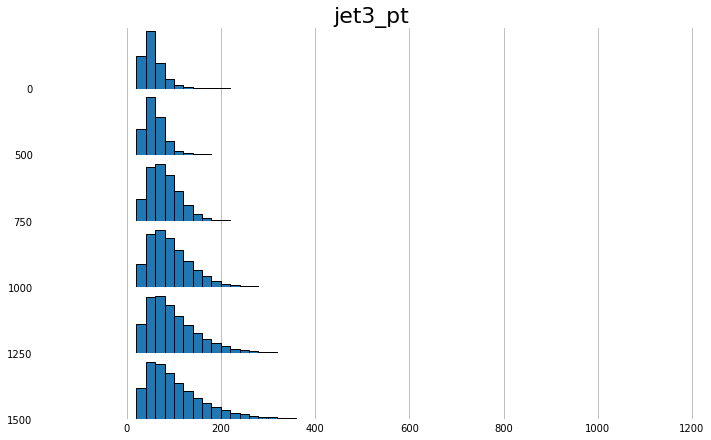

<Figure size 432x288 with 0 Axes>

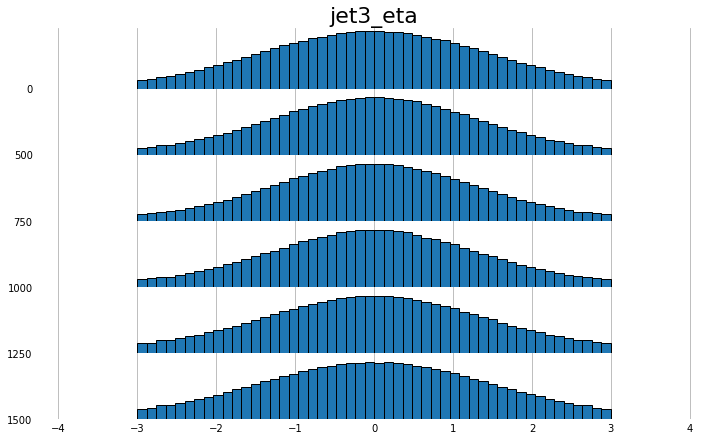

<Figure size 432x288 with 0 Axes>

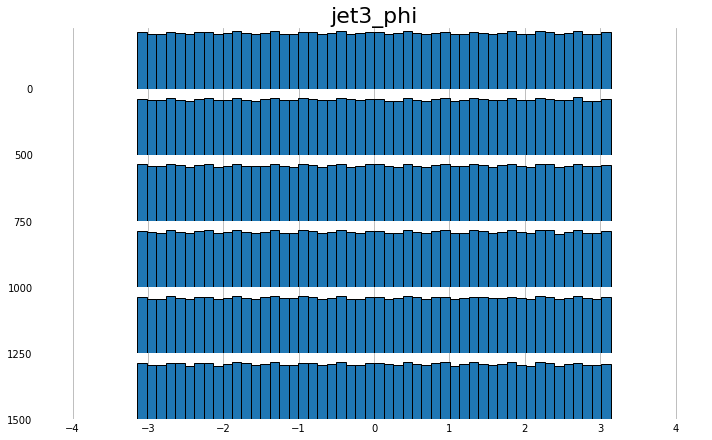

<Figure size 432x288 with 0 Axes>

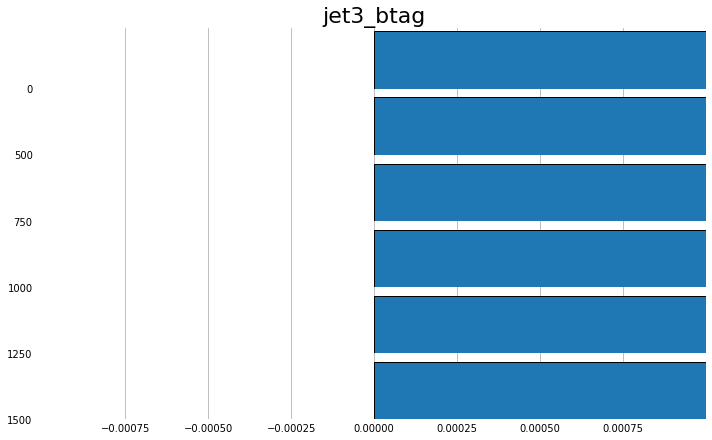

<Figure size 432x288 with 0 Axes>

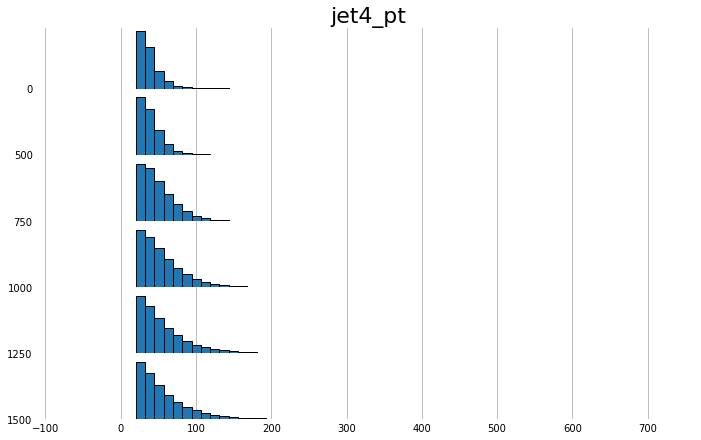

<Figure size 432x288 with 0 Axes>

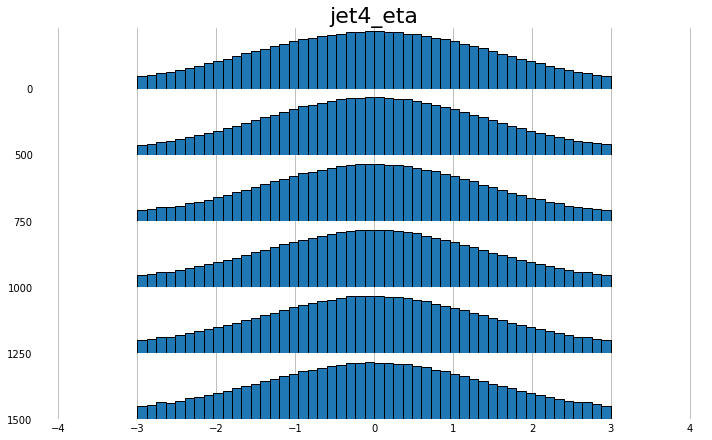

<Figure size 432x288 with 0 Axes>

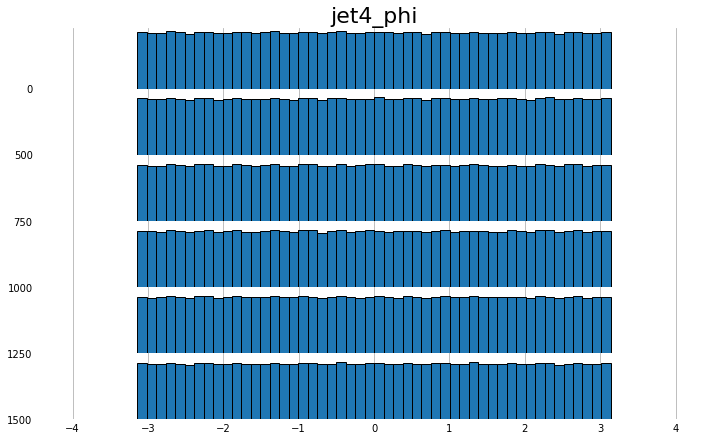

<Figure size 432x288 with 0 Axes>

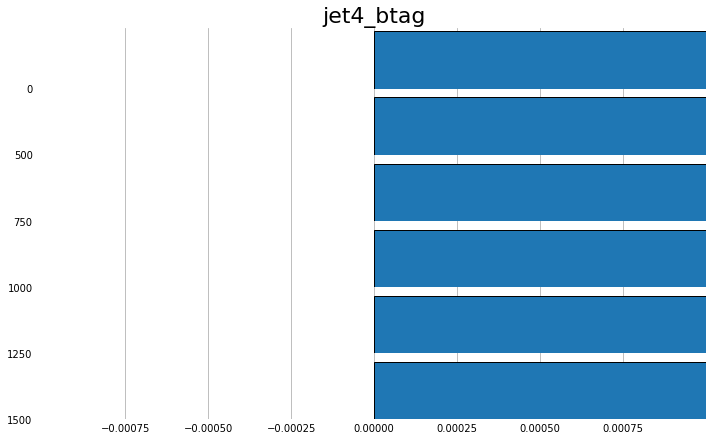

<Figure size 432x288 with 0 Axes>

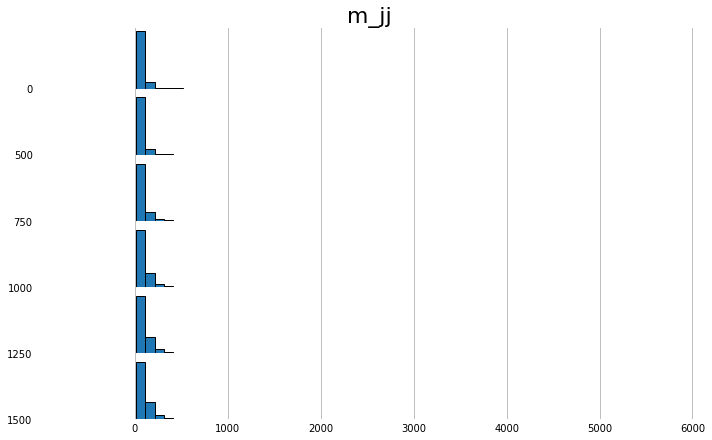

<Figure size 432x288 with 0 Axes>

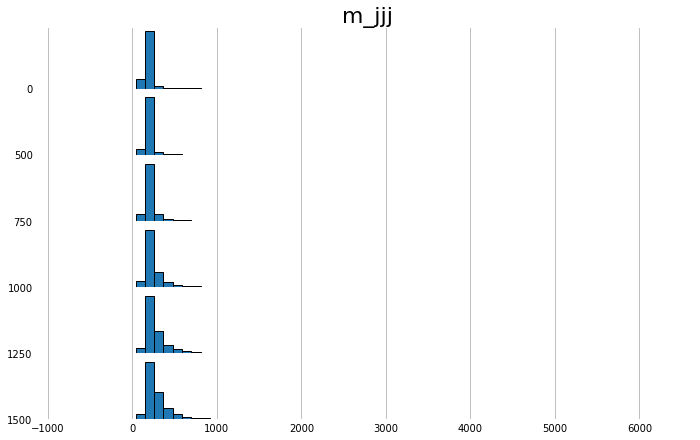

<Figure size 432x288 with 0 Axes>

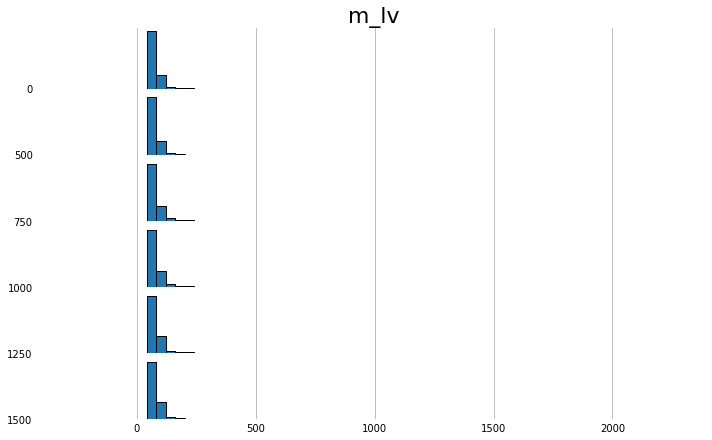

<Figure size 432x288 with 0 Axes>

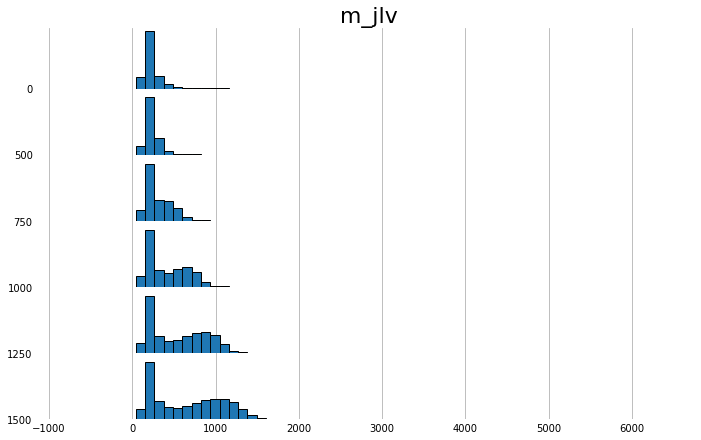

<Figure size 432x288 with 0 Axes>

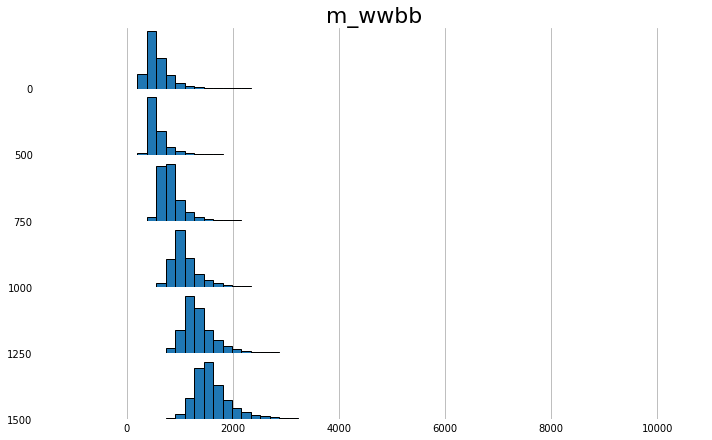

SAME THAN FIRST PLOT BUT WHEN BTAGS ARE 0-0-1-1


<Figure size 432x288 with 0 Axes>

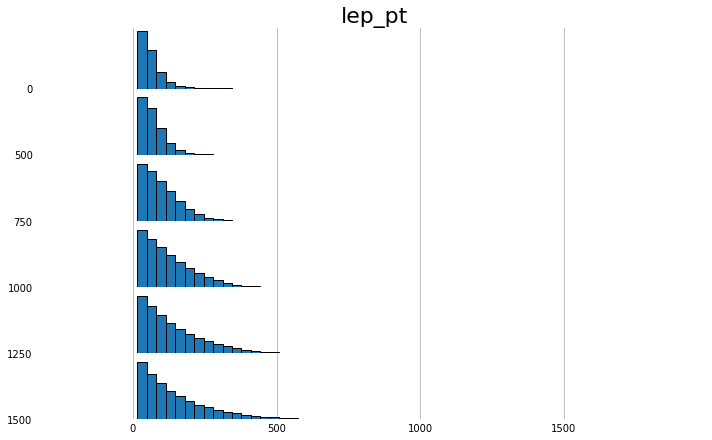

<Figure size 432x288 with 0 Axes>

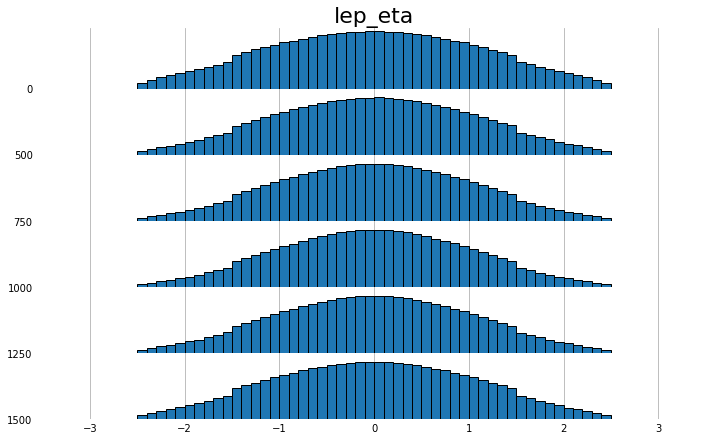

<Figure size 432x288 with 0 Axes>

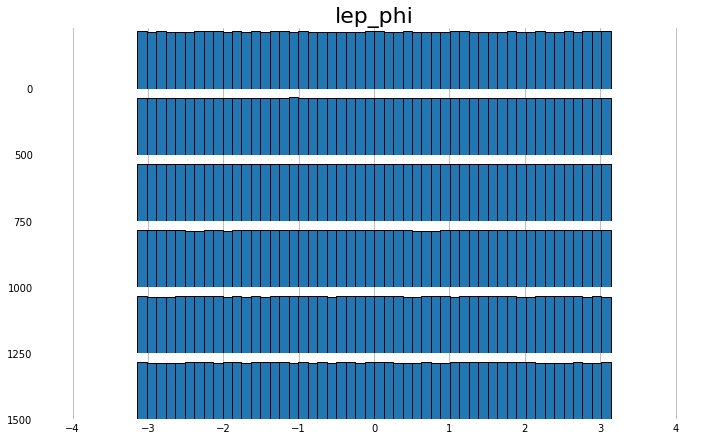

<Figure size 432x288 with 0 Axes>

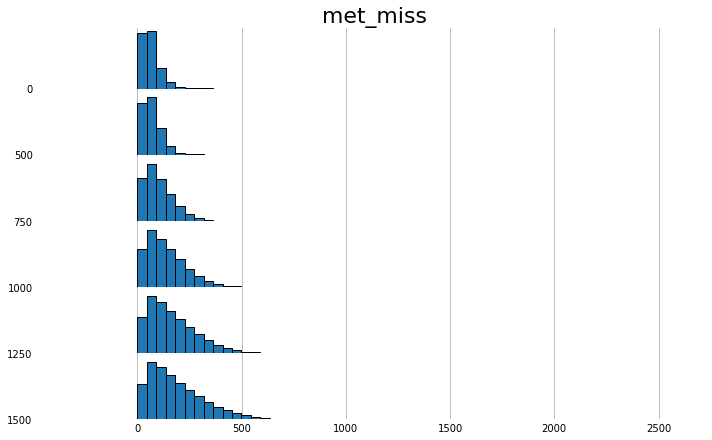

<Figure size 432x288 with 0 Axes>

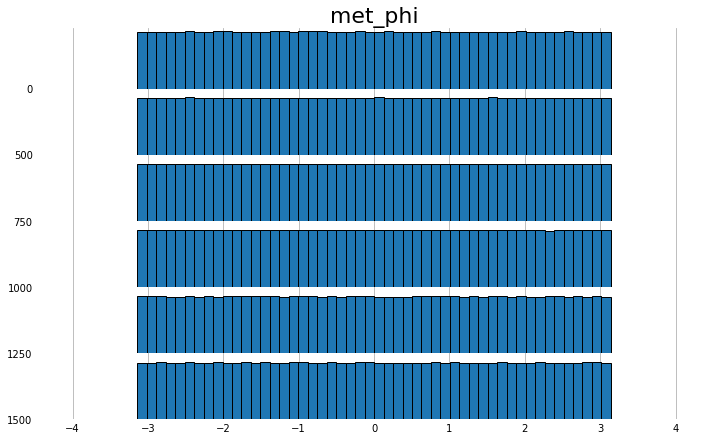

<Figure size 432x288 with 0 Axes>

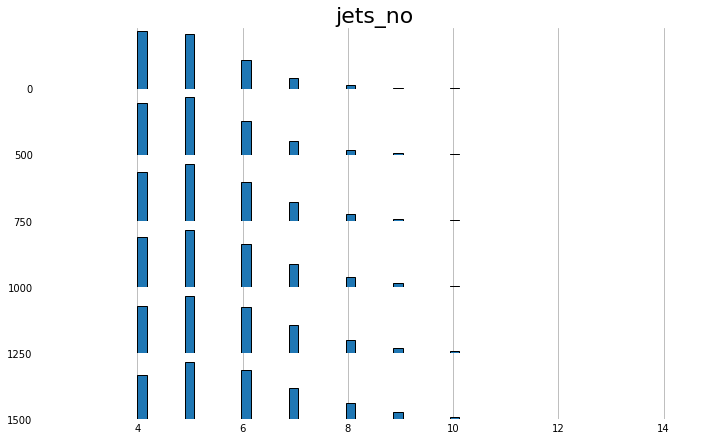

<Figure size 432x288 with 0 Axes>

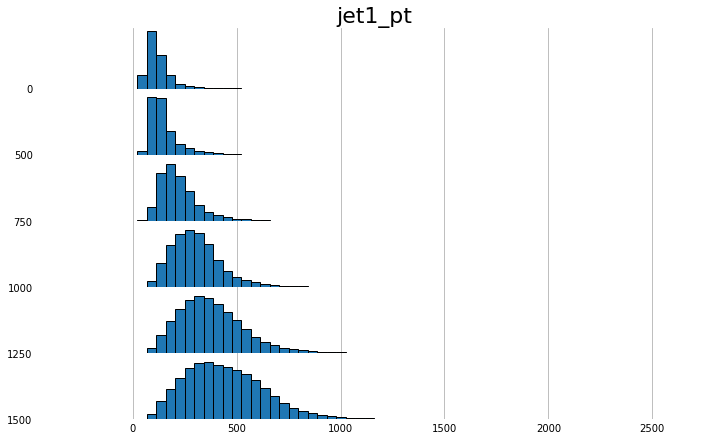

<Figure size 432x288 with 0 Axes>

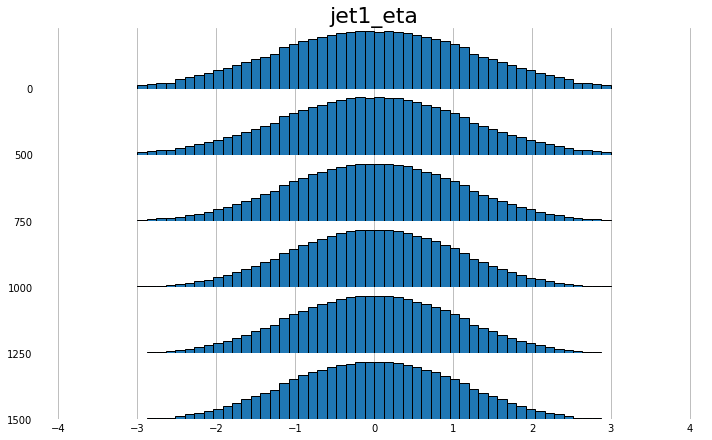

<Figure size 432x288 with 0 Axes>

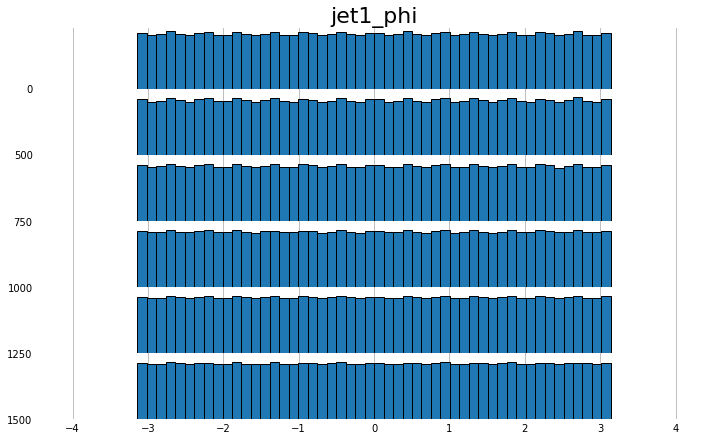

<Figure size 432x288 with 0 Axes>

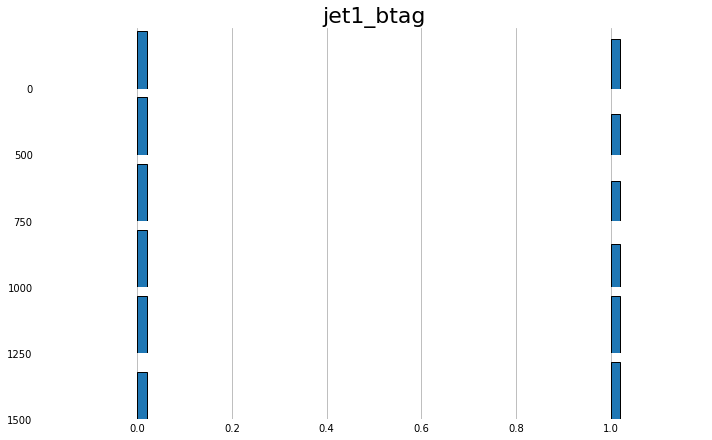

<Figure size 432x288 with 0 Axes>

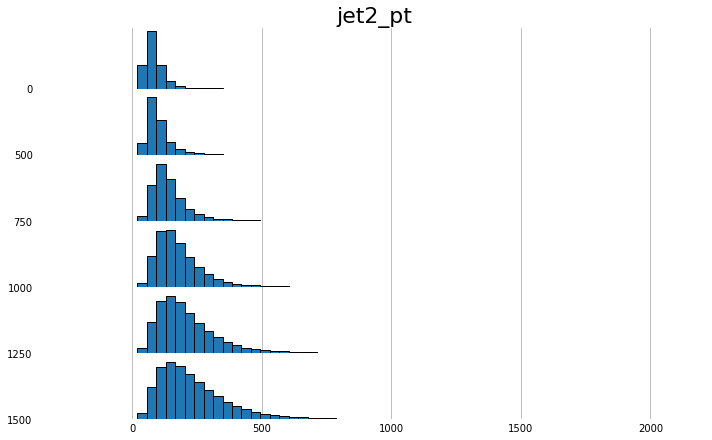

<Figure size 432x288 with 0 Axes>

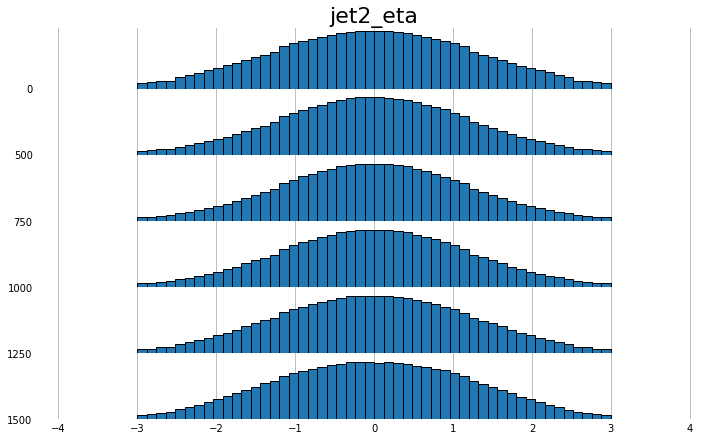

<Figure size 432x288 with 0 Axes>

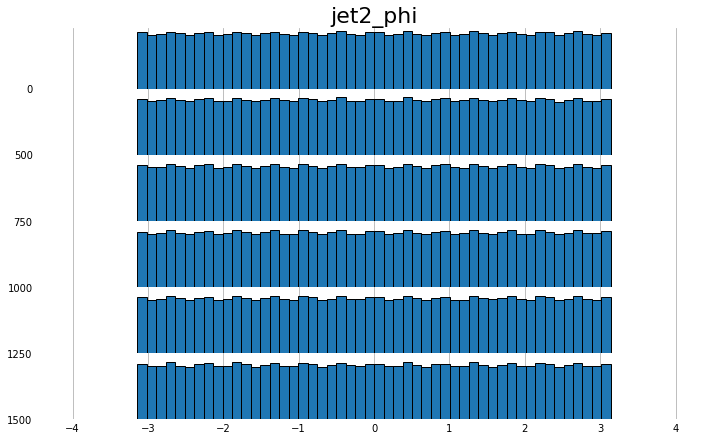

<Figure size 432x288 with 0 Axes>

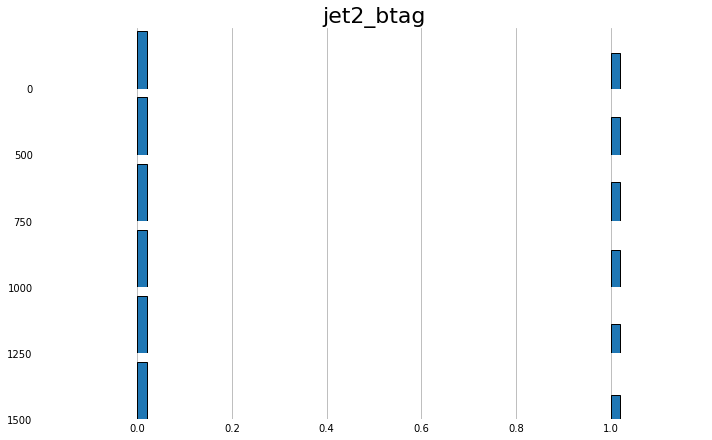

<Figure size 432x288 with 0 Axes>

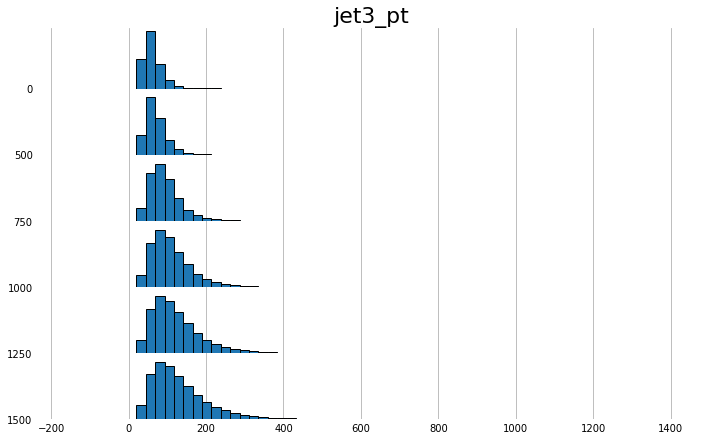

<Figure size 432x288 with 0 Axes>

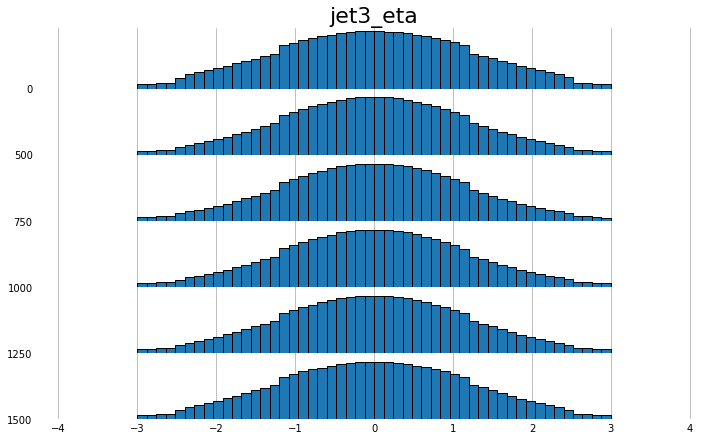

<Figure size 432x288 with 0 Axes>

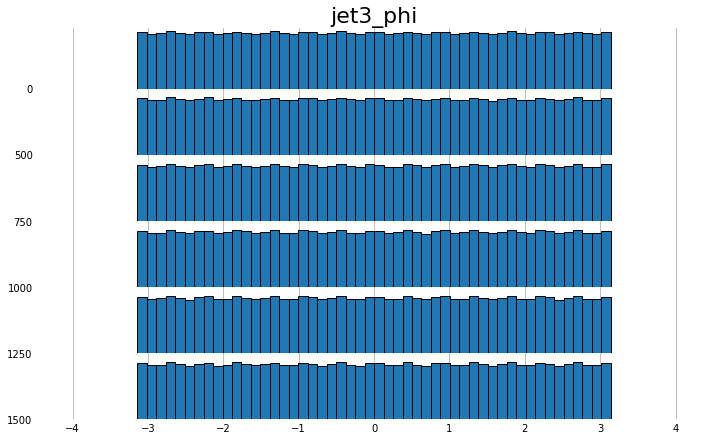

<Figure size 432x288 with 0 Axes>

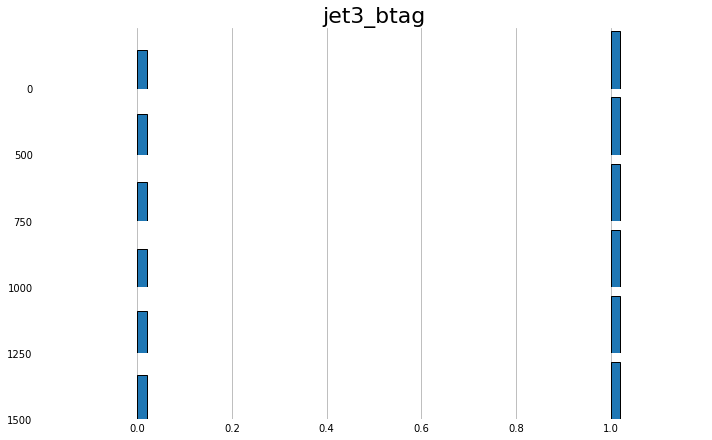

<Figure size 432x288 with 0 Axes>

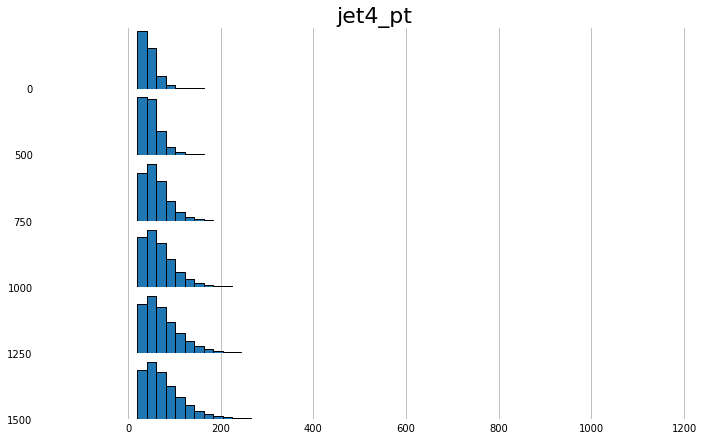

<Figure size 432x288 with 0 Axes>

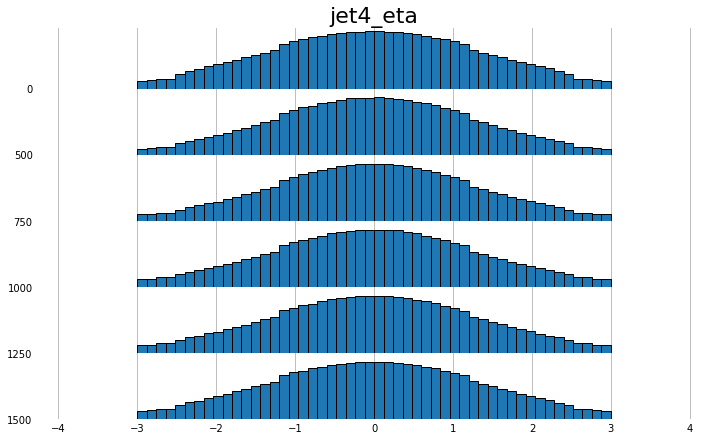

<Figure size 432x288 with 0 Axes>

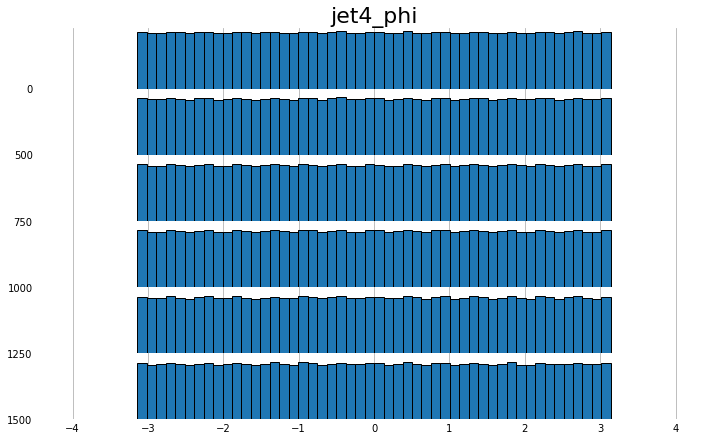

<Figure size 432x288 with 0 Axes>

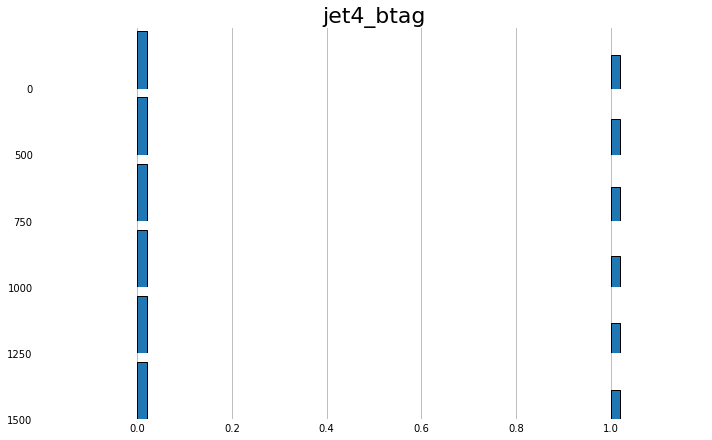

<Figure size 432x288 with 0 Axes>

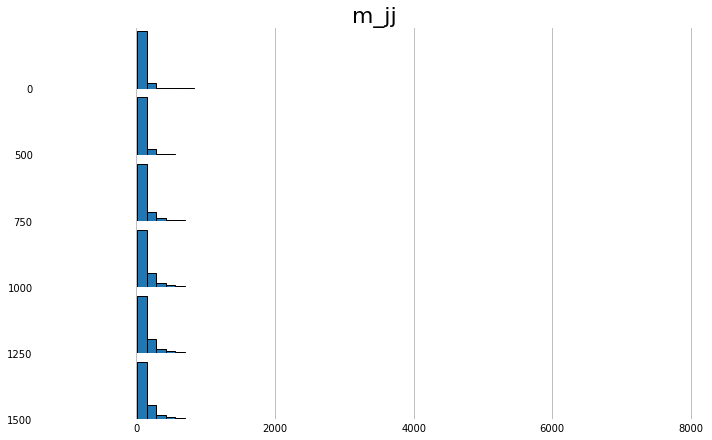

<Figure size 432x288 with 0 Axes>

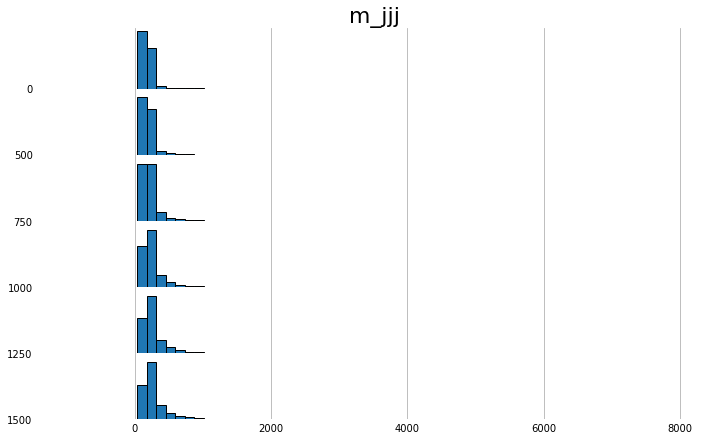

<Figure size 432x288 with 0 Axes>

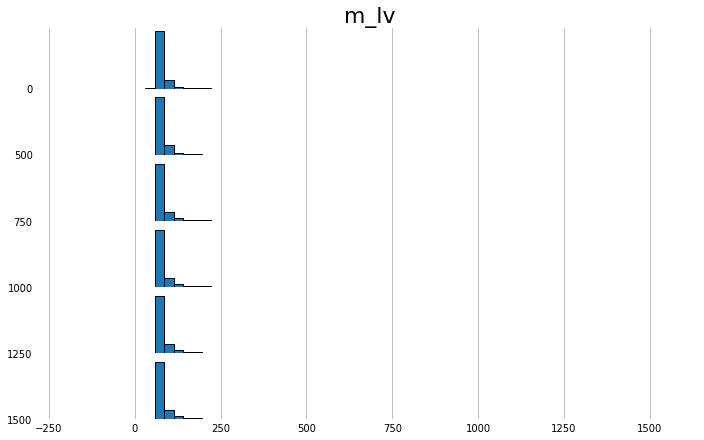

<Figure size 432x288 with 0 Axes>

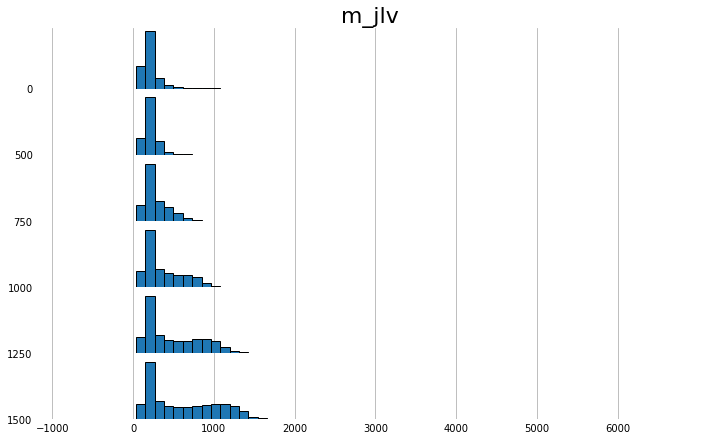

<Figure size 432x288 with 0 Axes>

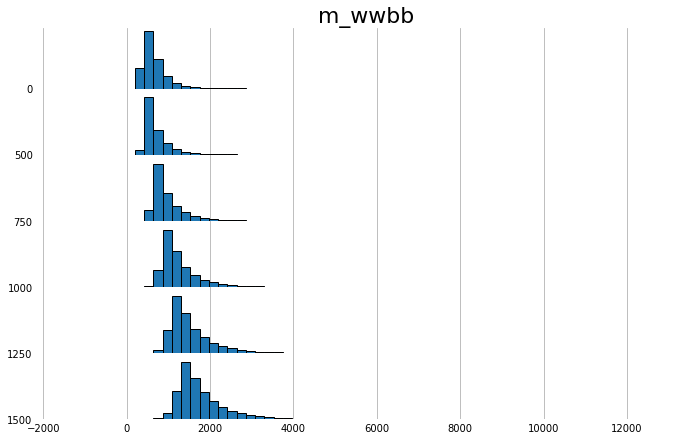

In [19]:
dfdensity=df.iloc[:,1:].query('jet1_btag==1 and jet2_btag==1')
names=dfdensity.iloc[:,:-1].columns

print("SAME THAN FIRST PLOT BUT WHEN BTAGS ARE 1-1-0-0")

#Plot histogram: 

for i in names: 
    plt.figure()
    fig, axes = joypy.joyplot(dfdensity, column=[i], by="mass", ylim='own', figsize=(10,6),hist="True", bins=70, overlap=0,
                          grid=True, legend=False)

    # Decoration
    plt.title(i, fontsize=22)
    plt.show()
    fig.savefig(pwdsnorm +i + '_btag_correct.png')    
    
dfdensity=df.iloc[:,1:].query('jet1_btag==0 or jet2_btag==0')

#Plot histogram: 

print("SAME THAN FIRST PLOT BUT WHEN BTAGS ARE 0-0-1-1")



for i in names: 
    plt.figure()
    fig, axes = joypy.joyplot(dfdensity, column=[i], by="mass", ylim='own', figsize=(10,6),hist="True", bins=70, overlap=0,
                          grid=True, legend=False)

    # Decoration
    plt.title(i, fontsize=22)
    plt.show()
    fig.savefig(pwdsnorm +i + '_btag_uncorrect.png')    


** BTAG = 0000, 0001, 0010, 0100, 1000 VS BTAG 1100 **

BTAG 0000 VS 1100


<Figure size 432x288 with 0 Axes>

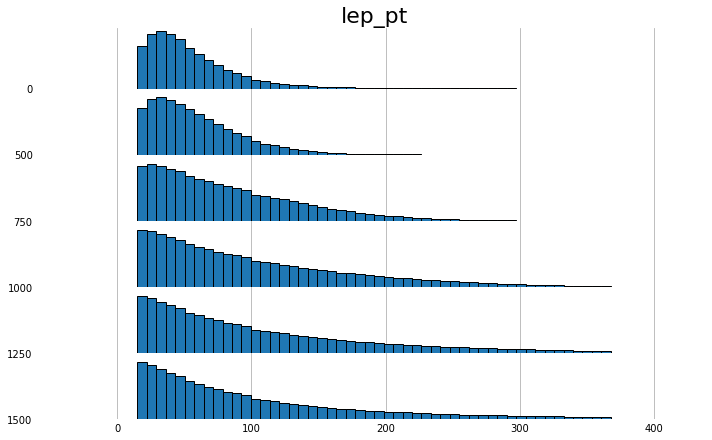

<Figure size 432x288 with 0 Axes>

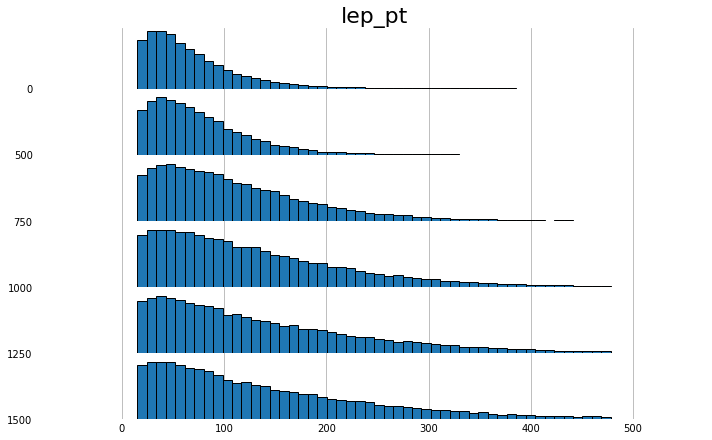

<Figure size 432x288 with 0 Axes>

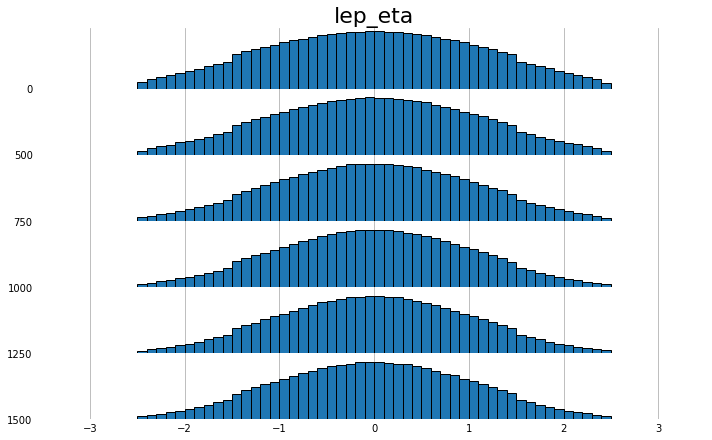

<Figure size 432x288 with 0 Axes>

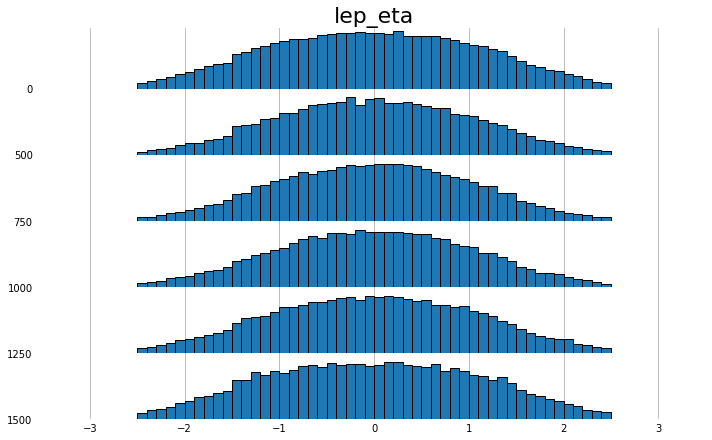

<Figure size 432x288 with 0 Axes>

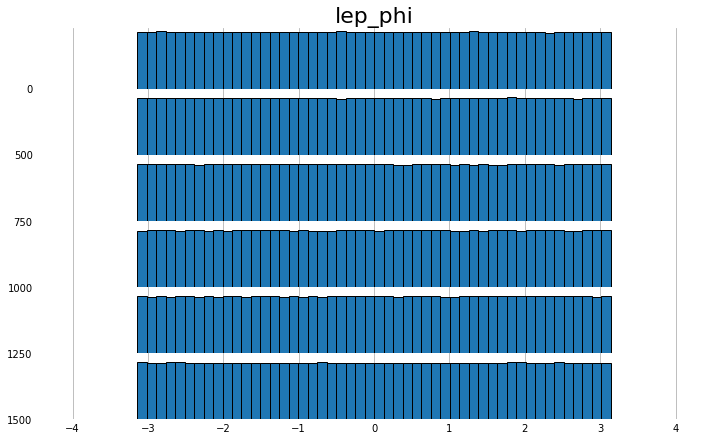

<Figure size 432x288 with 0 Axes>

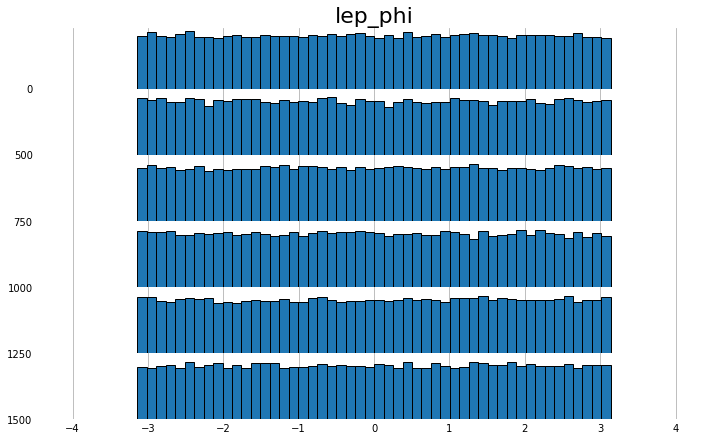

<Figure size 432x288 with 0 Axes>

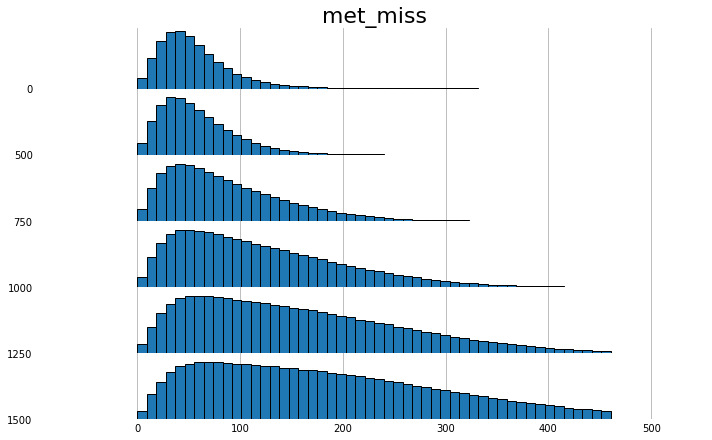

<Figure size 432x288 with 0 Axes>

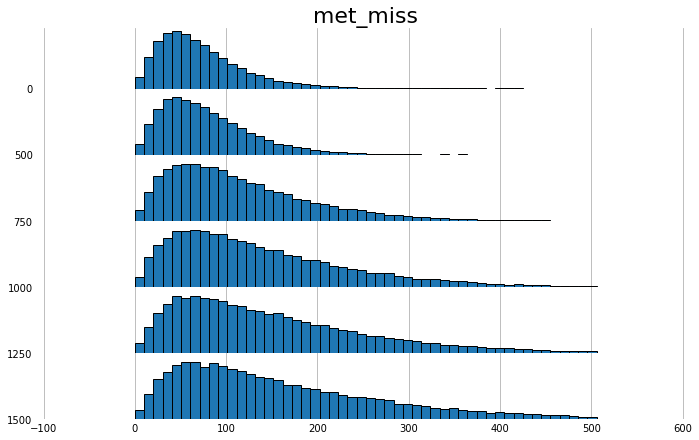

<Figure size 432x288 with 0 Axes>

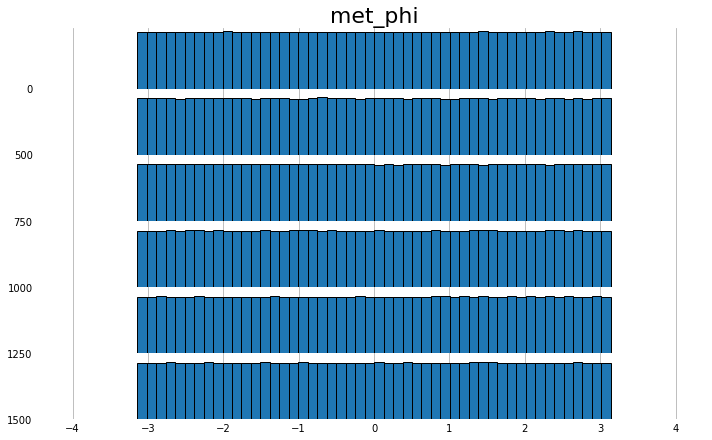

<Figure size 432x288 with 0 Axes>

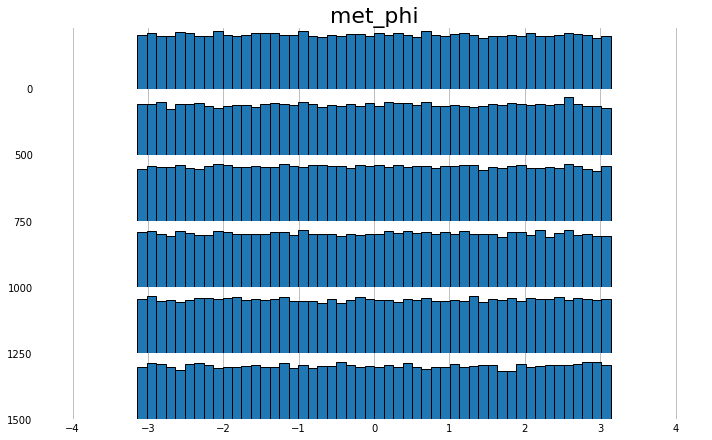

<Figure size 432x288 with 0 Axes>

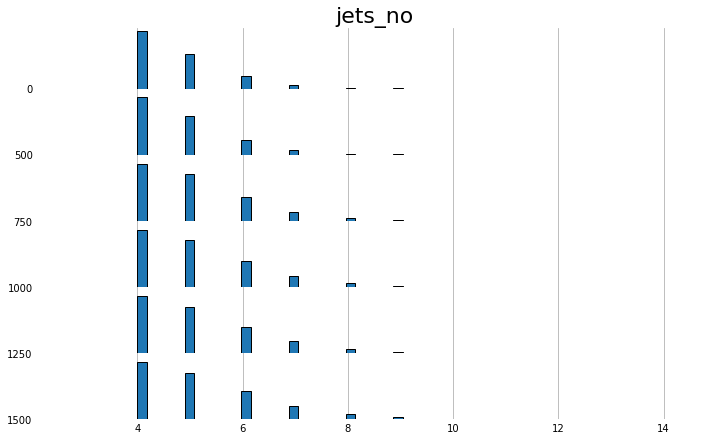

<Figure size 432x288 with 0 Axes>

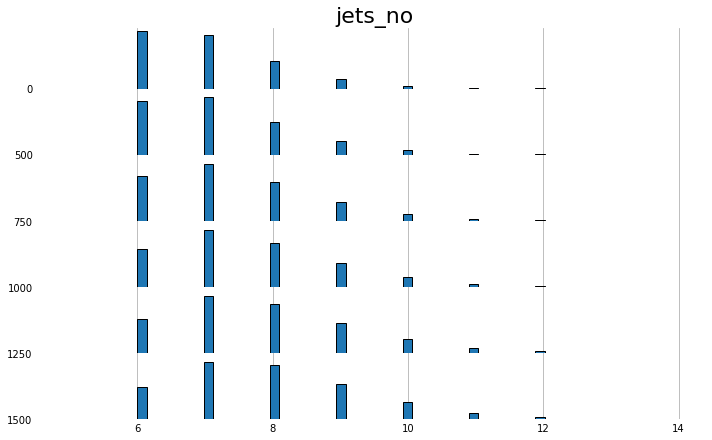

<Figure size 432x288 with 0 Axes>

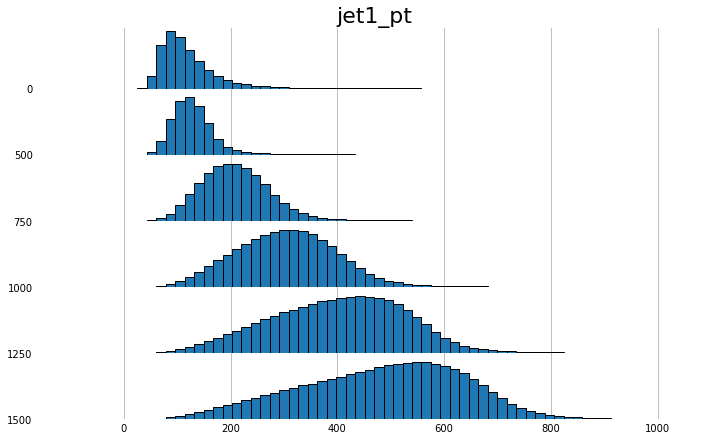

<Figure size 432x288 with 0 Axes>

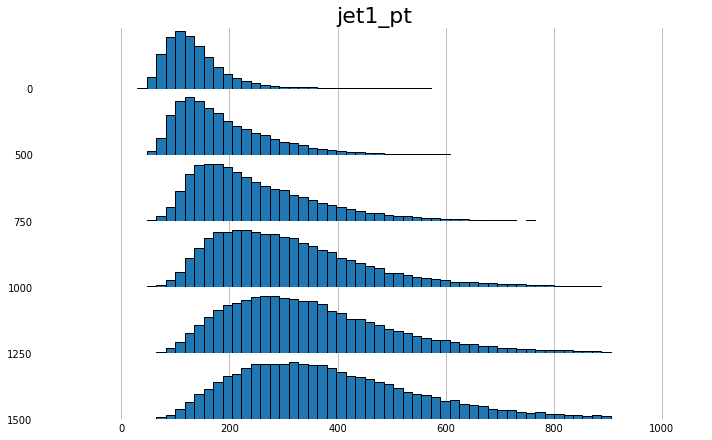

<Figure size 432x288 with 0 Axes>

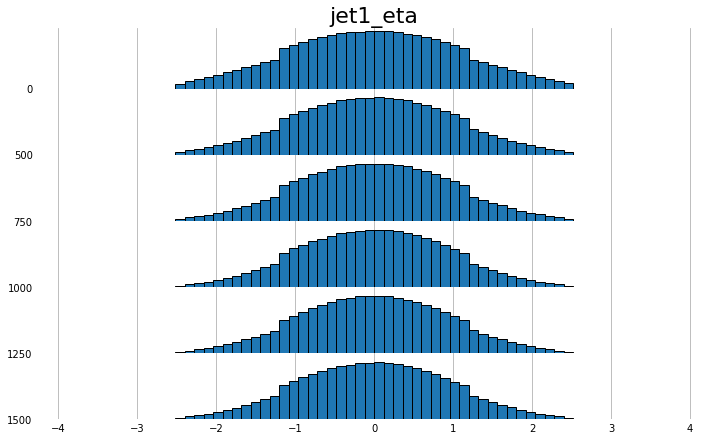

<Figure size 432x288 with 0 Axes>

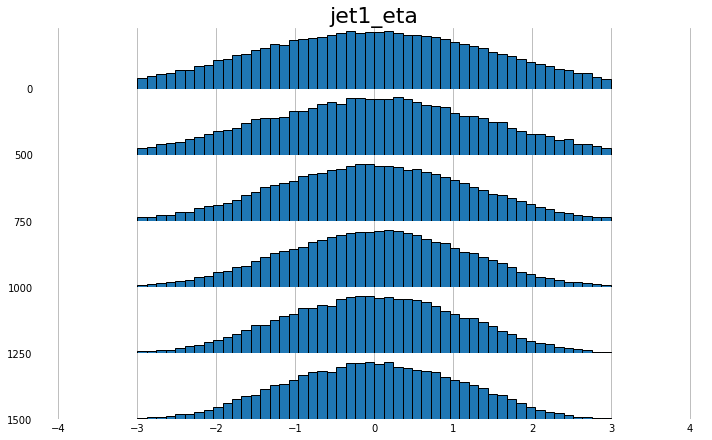

<Figure size 432x288 with 0 Axes>

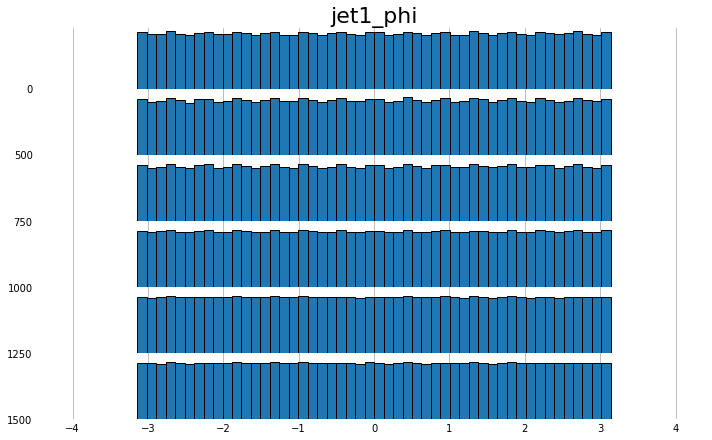

<Figure size 432x288 with 0 Axes>

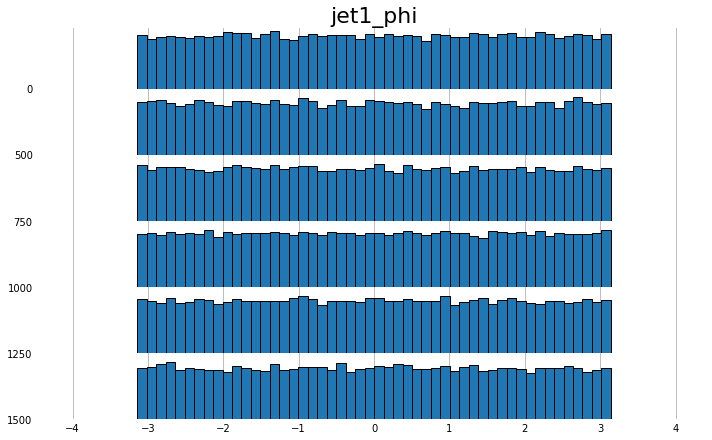

<Figure size 432x288 with 0 Axes>

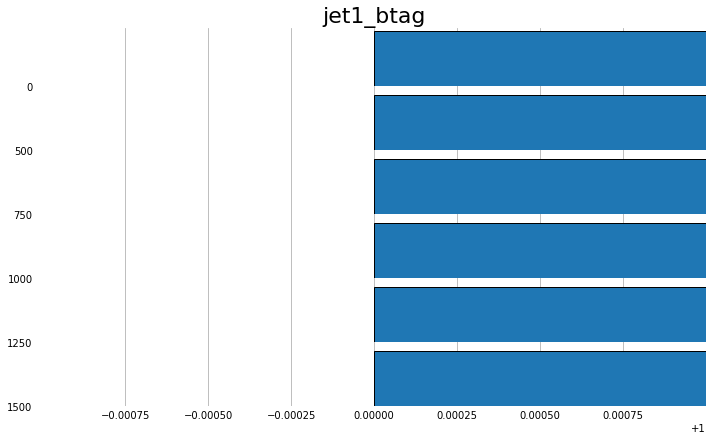

<Figure size 432x288 with 0 Axes>

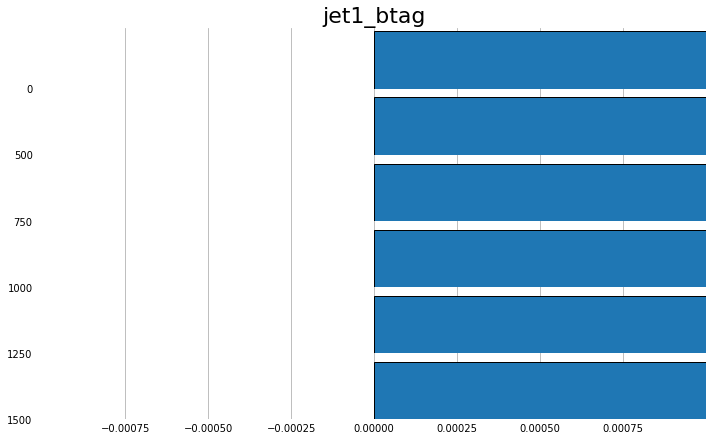

<Figure size 432x288 with 0 Axes>

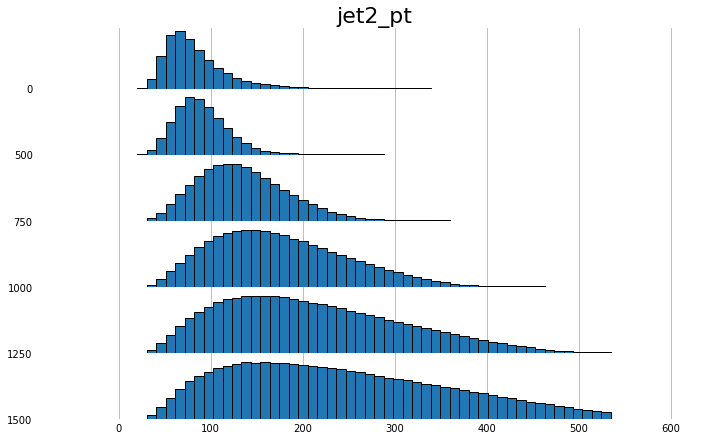

<Figure size 432x288 with 0 Axes>

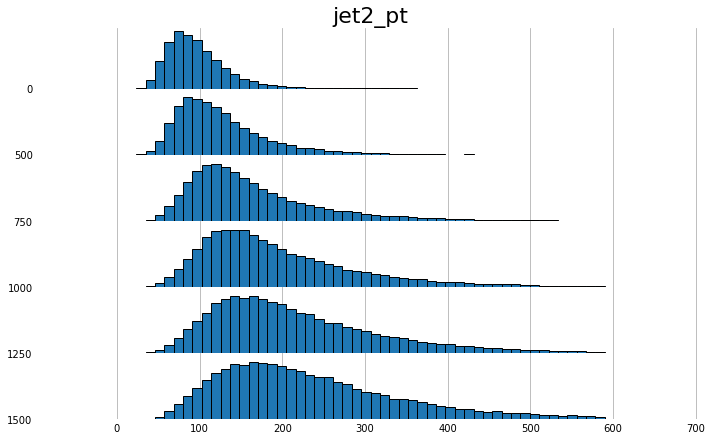

<Figure size 432x288 with 0 Axes>

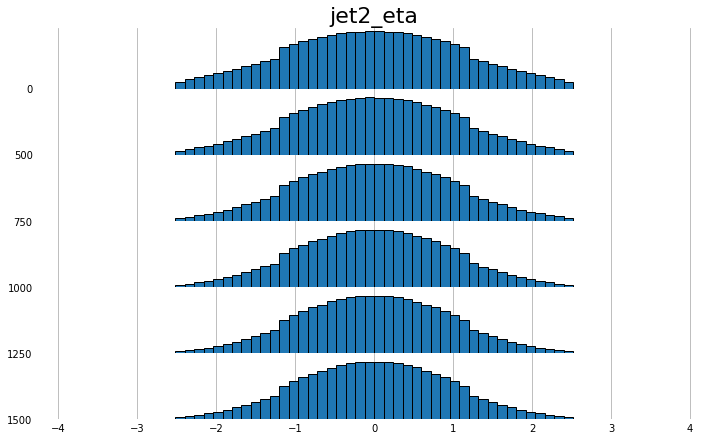

<Figure size 432x288 with 0 Axes>

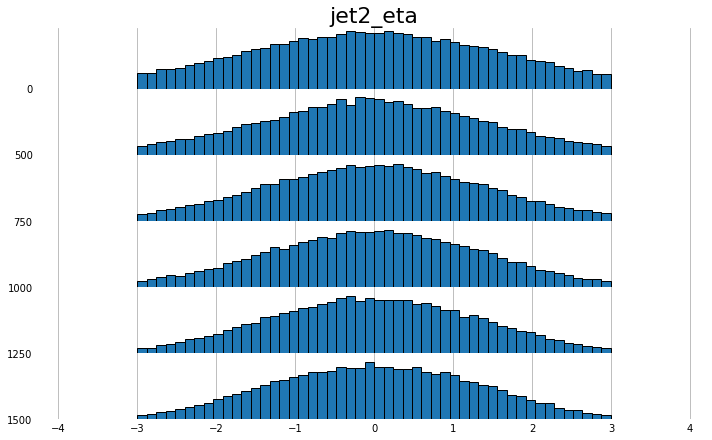

<Figure size 432x288 with 0 Axes>

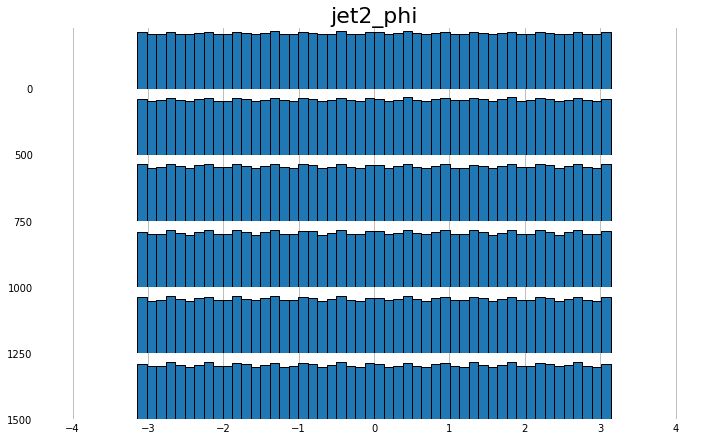

<Figure size 432x288 with 0 Axes>

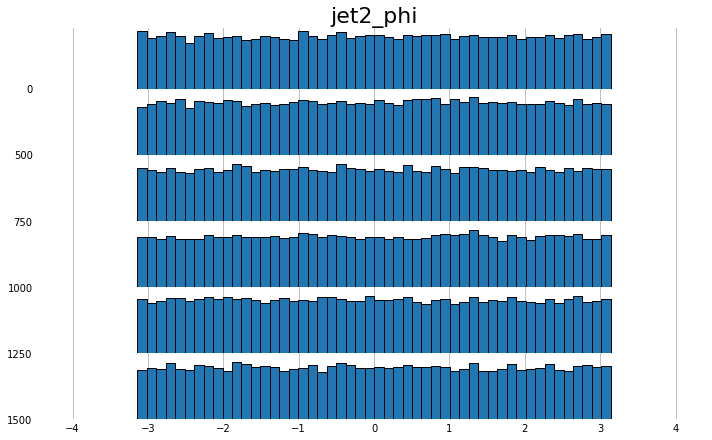

<Figure size 432x288 with 0 Axes>

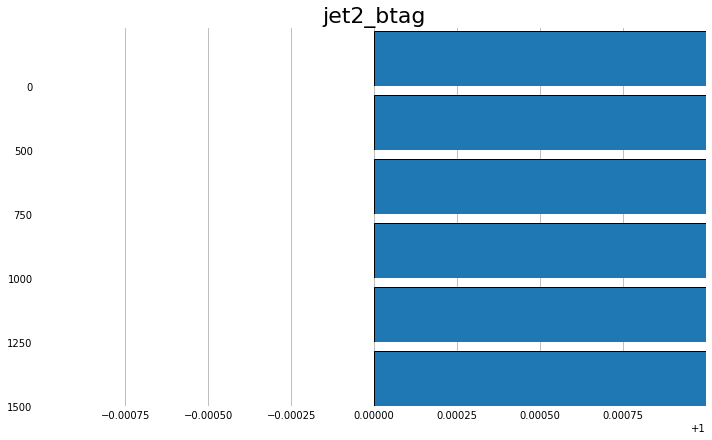

<Figure size 432x288 with 0 Axes>

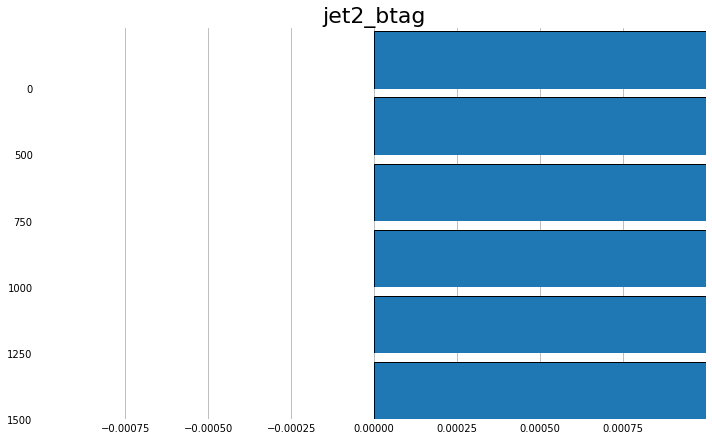

<Figure size 432x288 with 0 Axes>

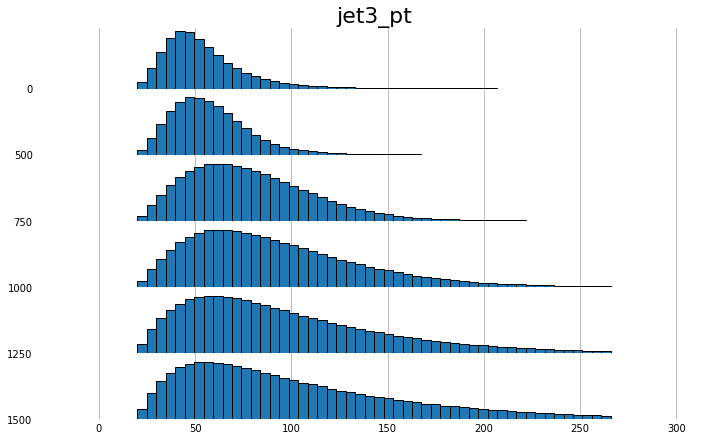

<Figure size 432x288 with 0 Axes>

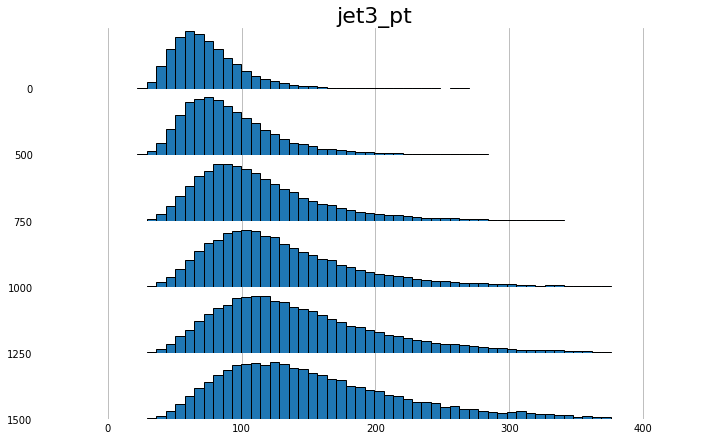

<Figure size 432x288 with 0 Axes>

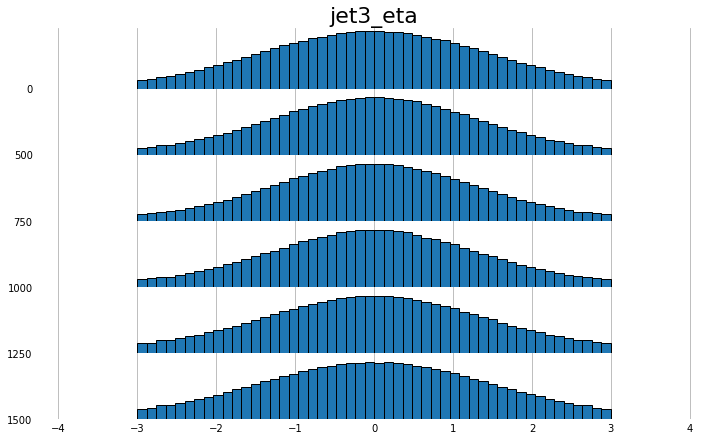

<Figure size 432x288 with 0 Axes>

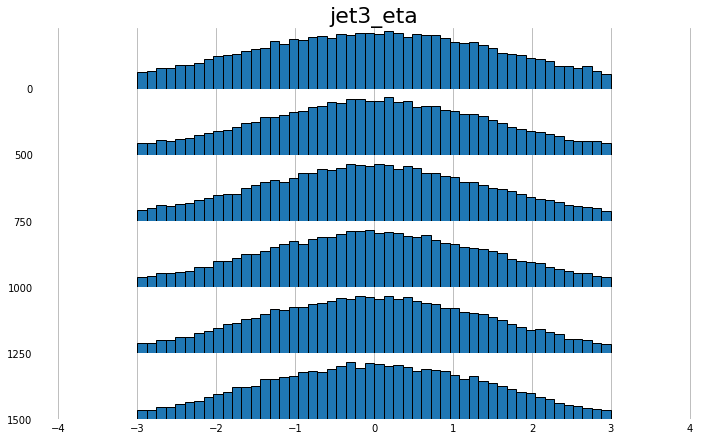

<Figure size 432x288 with 0 Axes>

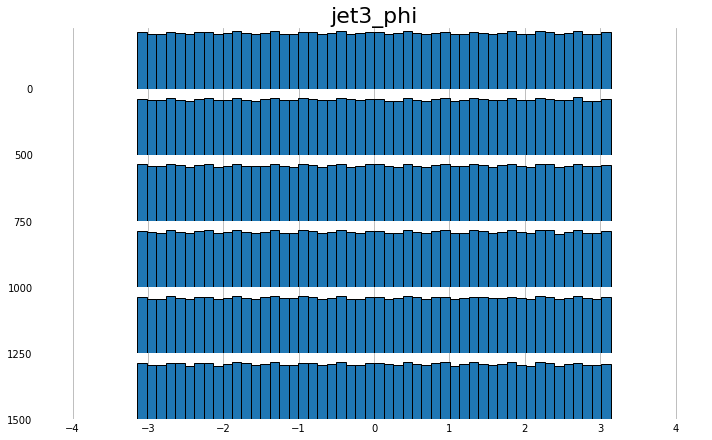

<Figure size 432x288 with 0 Axes>

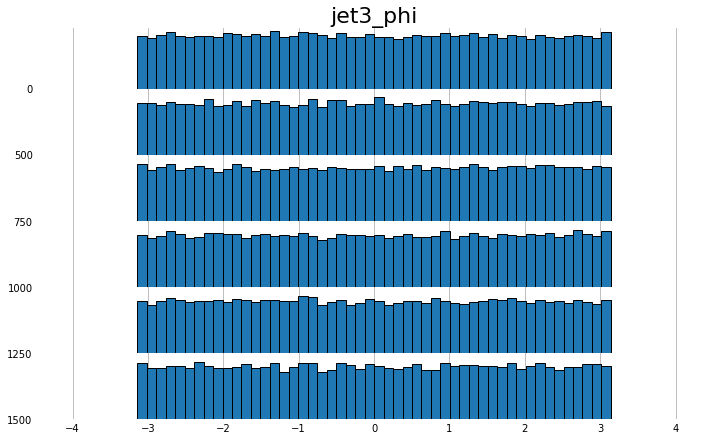

<Figure size 432x288 with 0 Axes>

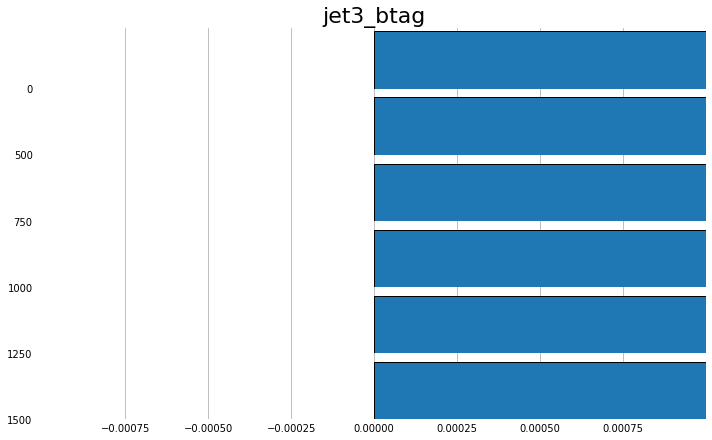

<Figure size 432x288 with 0 Axes>

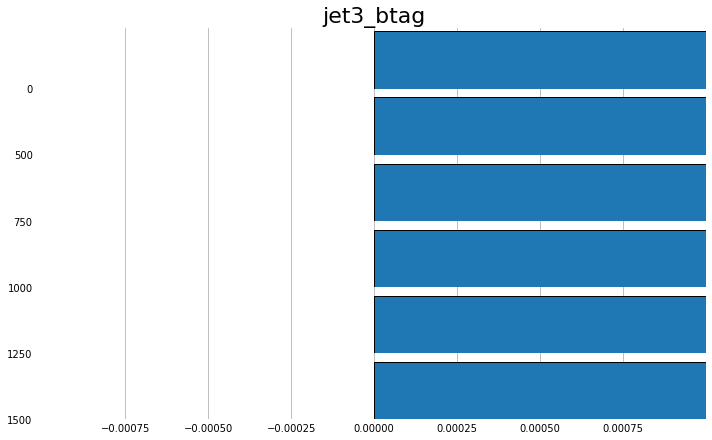

<Figure size 432x288 with 0 Axes>

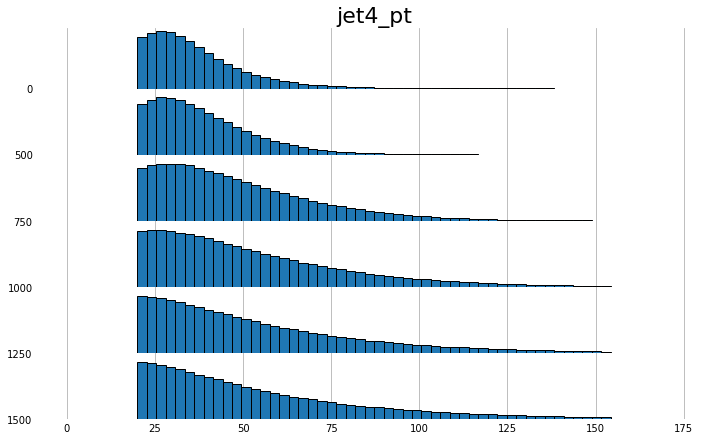

<Figure size 432x288 with 0 Axes>

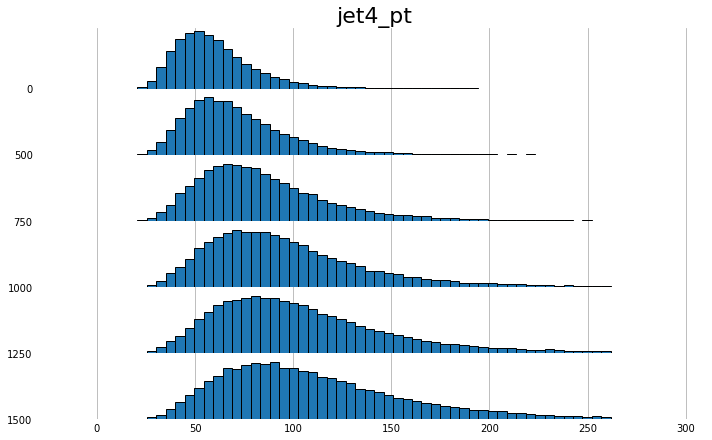

<Figure size 432x288 with 0 Axes>

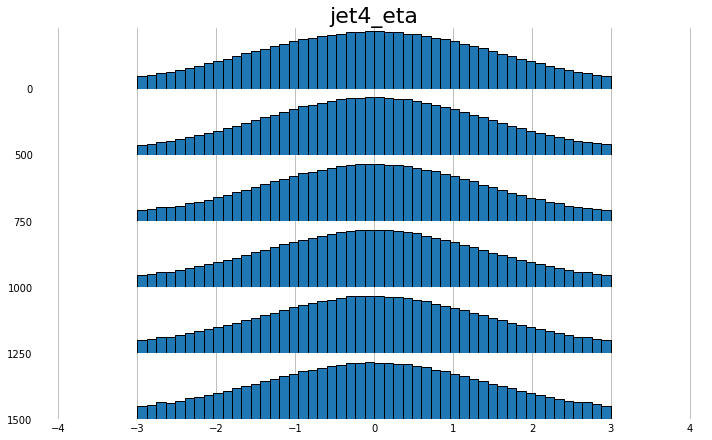

<Figure size 432x288 with 0 Axes>

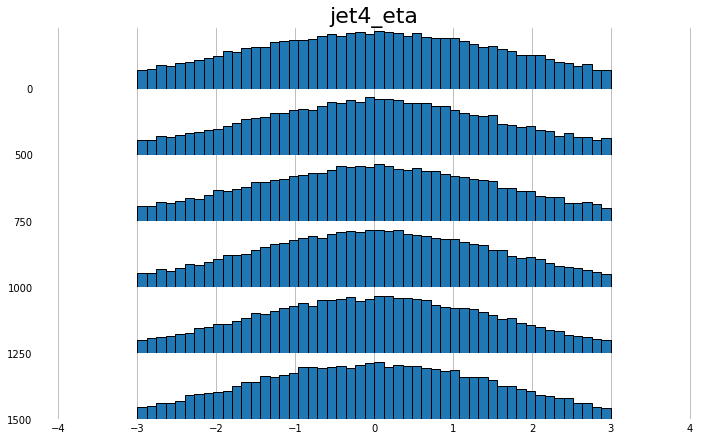

<Figure size 432x288 with 0 Axes>

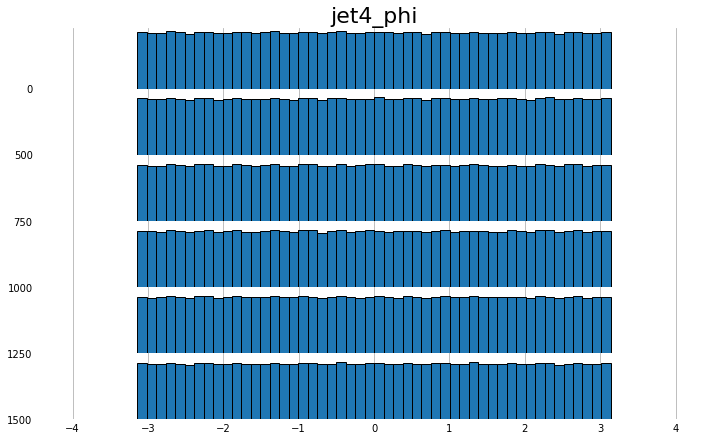

<Figure size 432x288 with 0 Axes>

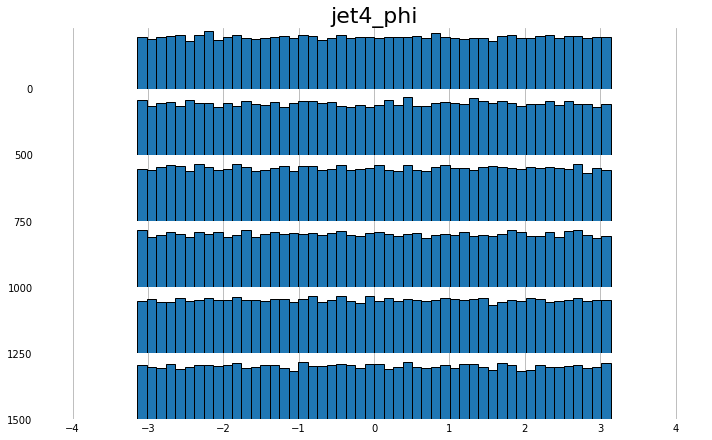

<Figure size 432x288 with 0 Axes>

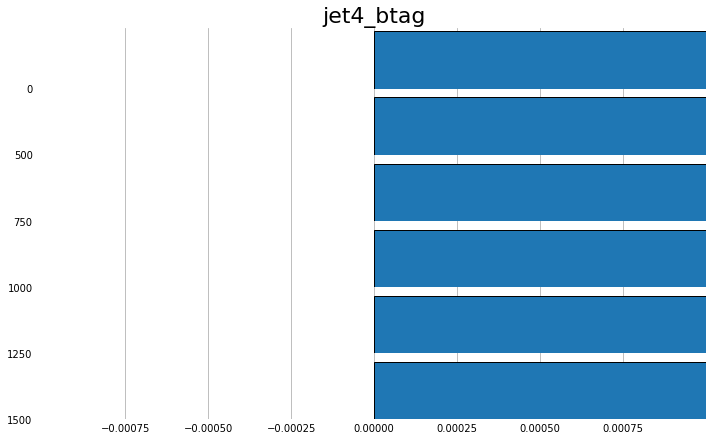

<Figure size 432x288 with 0 Axes>

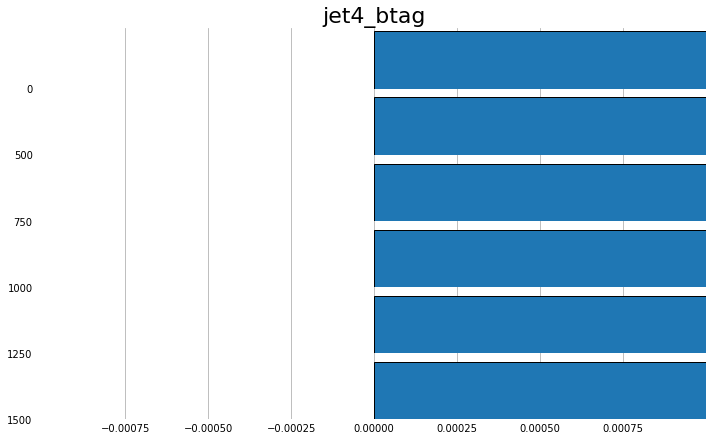

<Figure size 432x288 with 0 Axes>

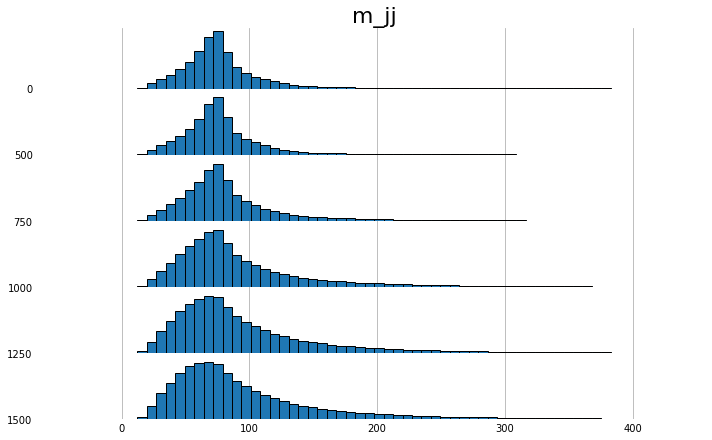

<Figure size 432x288 with 0 Axes>

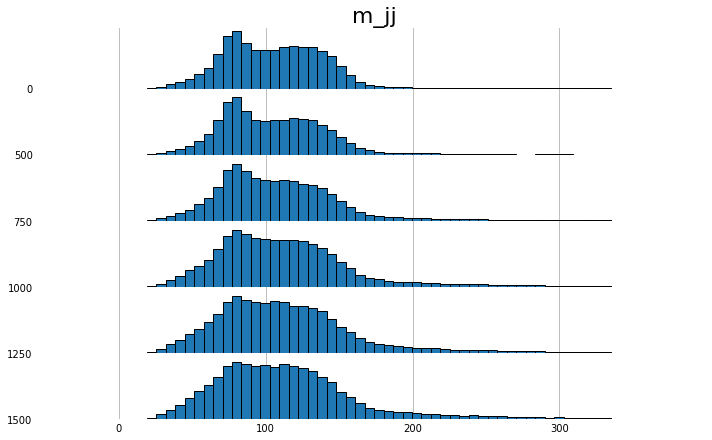

m_jjj


<Figure size 432x288 with 0 Axes>

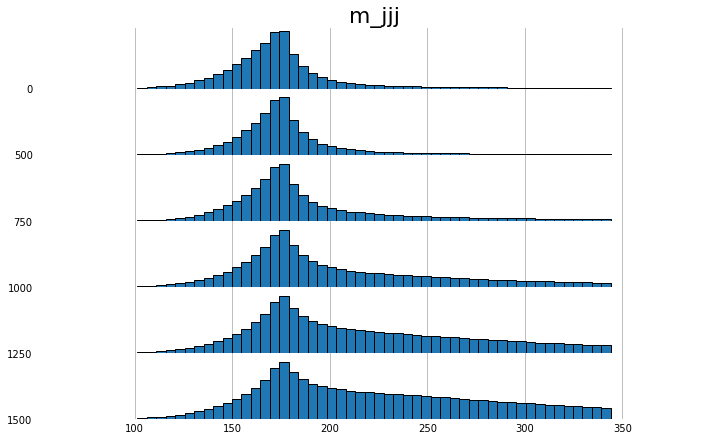

<Figure size 432x288 with 0 Axes>

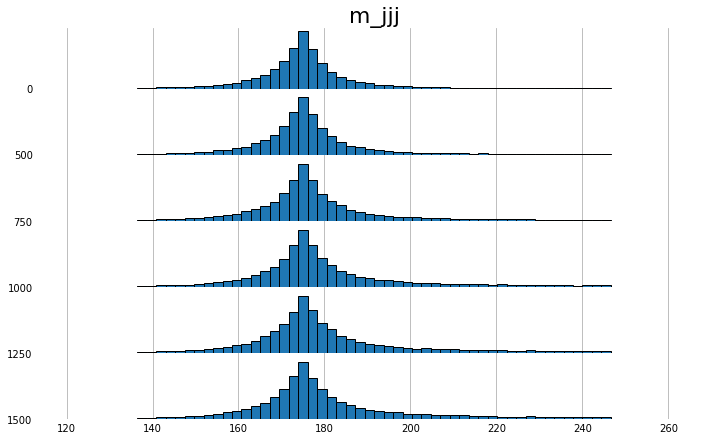

m_lv


<Figure size 432x288 with 0 Axes>

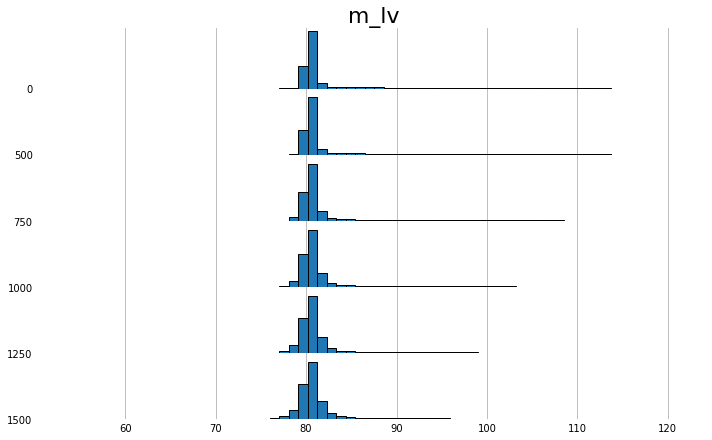

<Figure size 432x288 with 0 Axes>

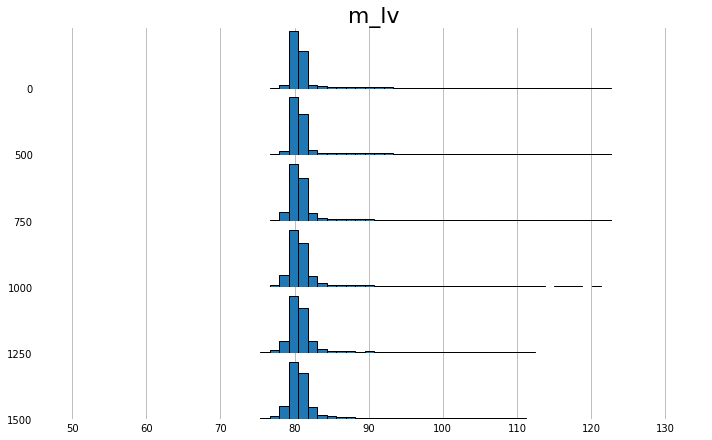

<Figure size 432x288 with 0 Axes>

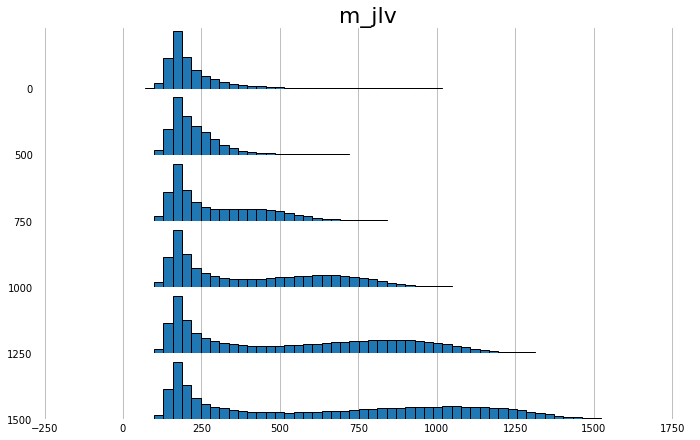

<Figure size 432x288 with 0 Axes>

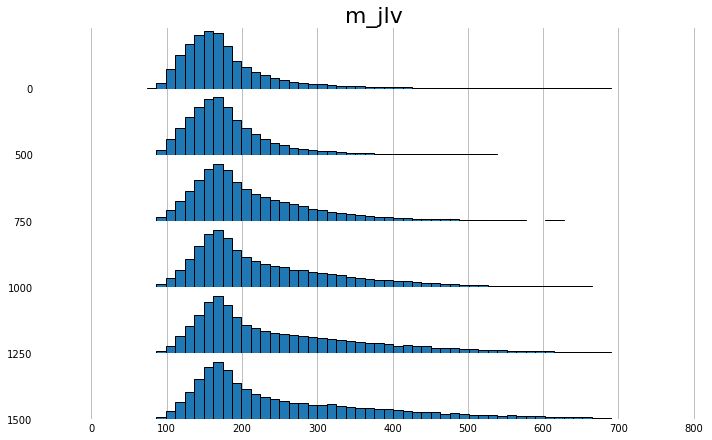

<Figure size 432x288 with 0 Axes>

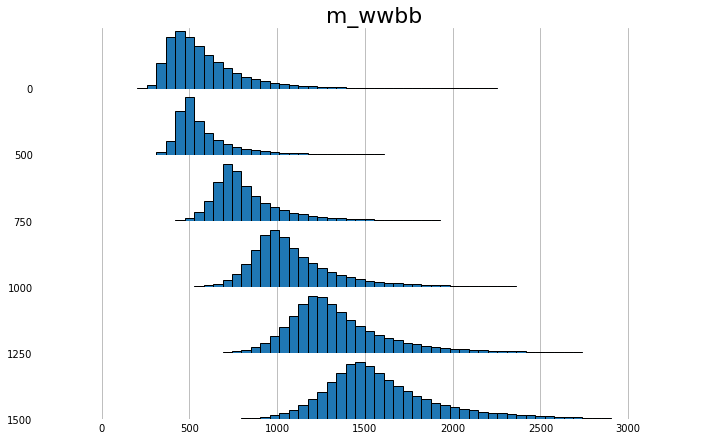

<Figure size 432x288 with 0 Axes>

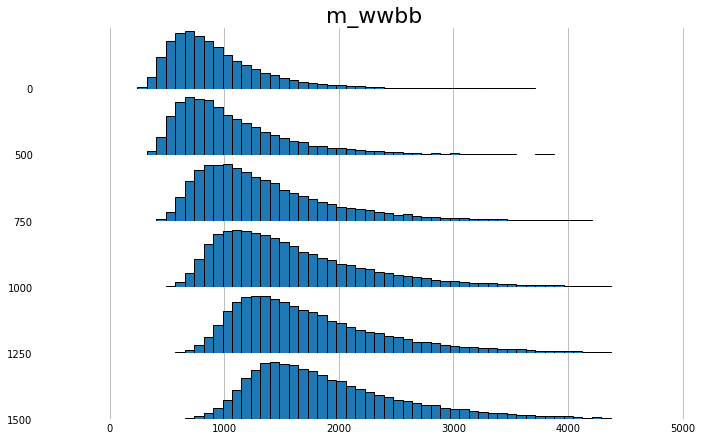

In [20]:
dfdensityincorrect=df.iloc[:,1:].query('jet1_btag==0 and jet2_btag==0 and jet3_btag==0 and jet4_btag==0')
dfdensitycorrect=df.iloc[:,1:].query('jet1_btag==1 and jet2_btag==1 and jet3_btag==0 and jet4_btag==0')

names=dfdensity.iloc[:,:-1].columns

print("BTAG 0000 VS 1100")

#Plot histogram: 

for i in names: 
    if dfdensity[i].dtypes=='float64': 
        
        df_sinoutcorrect = dfdensitycorrect.copy()
        df_sinoutincorrect = dfdensityincorrect.copy()
        
        if i == "m_jjj" or  i== "m_lv":

            df_sinoutcorrect=df_sinoutcorrect[~((df_sinoutcorrect[i]-df_sinoutcorrect[i].mean()).abs() > 1*df_sinoutcorrect[i].std())]
            df_sinoutincorrect=df_sinoutincorrect[~((df_sinoutincorrect[i]-df_sinoutincorrect[i].mean()).abs() > 1*df_sinoutincorrect[i].std())]

            ### outliers are removing for each column and printed, for the next column the whole dataset is loaded again. 
            ### "normal column outliers > 3"" , m_jjj and m_ñv (high std) > 0.5, there is no criteria , is just the best way od visualize 
            print(i)
       
        else: 
            df_sinoutcorrect=df_sinoutcorrect[~((df_sinoutcorrect[i]-df_sinoutcorrect[i].mean()).abs() > 4*df_sinoutcorrect[i].std())]
            df_sinoutincorrect=df_sinoutincorrect[~((df_sinoutincorrect[i]-df_sinoutincorrect[i].mean()).abs() > 4*df_sinoutincorrect[i].std())]



    
    plt.figure()
    fig, axes = joypy.joyplot(df_sinoutcorrect, column=[i], by="mass", ylim='own', figsize=(10,6),hist="True", bins=70, overlap=0,
                          grid=True, legend=False)

    # Decoration
    plt.title(i, fontsize=22)
    plt.show()
    fig.savefig(pwdest +"btag1100" +i + '.png')
    
    plt.figure()
    fig, axes = joypy.joyplot(df_sinoutincorrect, column=[i], by="mass", ylim='own', figsize=(10,6),hist="True", bins=70, overlap=0,
                          grid=True, legend=False)

    # Decoration
    plt.title(i, fontsize=22)
    plt.show()
    fig.savefig(pwdest + "btag0000" +i + '.png')
    


In [11]:
corr_sin_norm=corr_sin_norm.round(2)

lep_pt  lep_eta  lep_phi  met_miss  met_phi  jet1_pt  jet1_eta  \
lep_pt      1.00    -0.00    -0.00      0.05    -0.00     0.34      0.00   
lep_eta    -0.00     1.00     0.00     -0.00    -0.00     0.00      0.32   
lep_phi    -0.00     0.00     1.00      0.00     0.23    -0.00     -0.00   
met_miss    0.05    -0.00     0.00      1.00     0.00     0.51     -0.00   
met_phi    -0.00    -0.00     0.23      0.00     1.00     0.00     -0.00   
jet1_pt     0.34     0.00    -0.00      0.51     0.00     1.00      0.00   
jet1_eta    0.00     0.32    -0.00     -0.00    -0.00     0.00      1.00   
jet1_phi    0.00     0.00    -0.25     -0.00    -0.24     0.00     -0.00   
jet2_pt     0.10     0.00     0.00      0.26    -0.00     0.75      0.00   
jet2_eta   -0.00     0.34     0.00     -0.00     0.00    -0.00      0.31   
jet2_phi   -0.00    -0.00    -0.02     -0.00     0.02    -0.00     -0.00   
jet3_pt     0.08    -0.00     0.00      0.22    -0.00     0.51      0.00   
jet3_eta    0.00     0.26     0.00     -0.00     0.00     0.00      0.33   
jet3_phi   -0.00    -0.00    -0.09      0.00    -0.06     0.00      0.00   
jet4_pt     0.08    -0.00    -0.00      0.16    -0.00     0.34      0.00   
jet4_eta   -0.00     0.20     0.00     -0.00     0.00    -0.00      0.30   
jet4_phi   -0.00    -0.00    -0.10      0.00    -0.07    -0.00      0.00   
m_jj        0.07    -0.00     0.00      0.10     0.00     0.23      0.00   
m_jjj       0.07     0.00     0.00      0.15     0.00     0.38      0.00   
m_lv        0.33    -0.00     0.00     -0.01     0.00     0.10     -0.00   
m_jlv       0.37    -0.00     0.00      0.48     0.00     0.62     -0.00   
m_wwbb      0.31    -0.00     0.00      0.48     0.00     0.79      0.00   

          jet1_phi  jet2_pt  jet2_eta  ...  jet3_eta  jet3_phi  jet4_pt  \
lep_pt        0.00     0.10     -0.00  ...      0.00     -0.00     0.08   
lep_eta       0.00     0.00      0.34  ...      0.26     -0.00    -0.00   
lep_phi      -0.25     0.00      0.00  ...      0.00     -0.09    -0.00   
met_miss     -0.00     0.26     -0.00  ...     -0.00      0.00     0.16   
met_phi      -0.24    -0.00      0.00  ...      0.00     -0.06    -0.00   
jet1_pt       0.00     0.75     -0.00  ...      0.00      0.00     0.34   
jet1_eta     -0.00     0.00      0.31  ...      0.33      0.00     0.00   
jet1_phi      1.00    -0.00      0.00  ...      0.00     -0.10    -0.00   
jet2_pt      -0.00     1.00     -0.00  ...      0.00      0.00     0.44   
jet2_eta      0.00    -0.00      1.00  ...      0.25     -0.00    -0.00   
jet2_phi     -0.24     0.00     -0.00  ...      0.00     -0.07    -0.00   
jet3_pt      -0.00     0.65     -0.00  ...     -0.00      0.00     0.69   
jet3_eta      0.00     0.00      0.25  ...      1.00     -0.00    -0.00   
jet3_phi     -0.10     0.00     -0.00  ...     -0.00      1.00     0.00   
jet4_pt      -0.00     0.44     -0.00  ...     -0.00      0.00     1.00   
jet4_eta     -0.00    -0.00      0.23  ...      0.21      0.00    -0.00   
jet4_phi     -0.04     0.00      0.00  ...     -0.00     -0.05     0.00   
m_jj         -0.00     0.23     -0.00  ...     -0.00      0.00     0.14   
m_jjj        -0.00     0.39     -0.00  ...      0.00      0.00     0.19   
m_lv          0.00     0.11     -0.00  ...      0.00     -0.00     0.07   
m_jlv         0.00     0.34     -0.00  ...     -0.00      0.00     0.12   
m_wwbb       -0.00     0.71     -0.00  ...      0.00      0.00     0.51   

          jet4_eta  jet4_phi  m_jj  m_jjj  m_lv  m_jlv  m_wwbb  
lep_pt       -0.00     -0.00  0.07   0.07  0.33   0.37    0.31  
lep_eta       0.20     -0.00 -0.00   0.00 -0.00  -0.00   -0.00  
lep_phi       0.00     -0.10  0.00   0.00  0.00   0.00    0.00  
met_miss     -0.00      0.00  0.10   0.15 -0.01   0.48    0.48  
met_phi       0.00     -0.07  0.00   0.00  0.00   0.00    0.00  
jet1_pt      -0.00     -0.00  0.23   0.38  0.10   0.62    0.79  
jet1_eta      0.30      0.00  0.00   0.00 -0.00  -0.00    0.00  
jet1_phi     -0

## Correlation Plot

SCORRELATION PLOT FOR NORMALIZED DATA (7 MILLIONS)


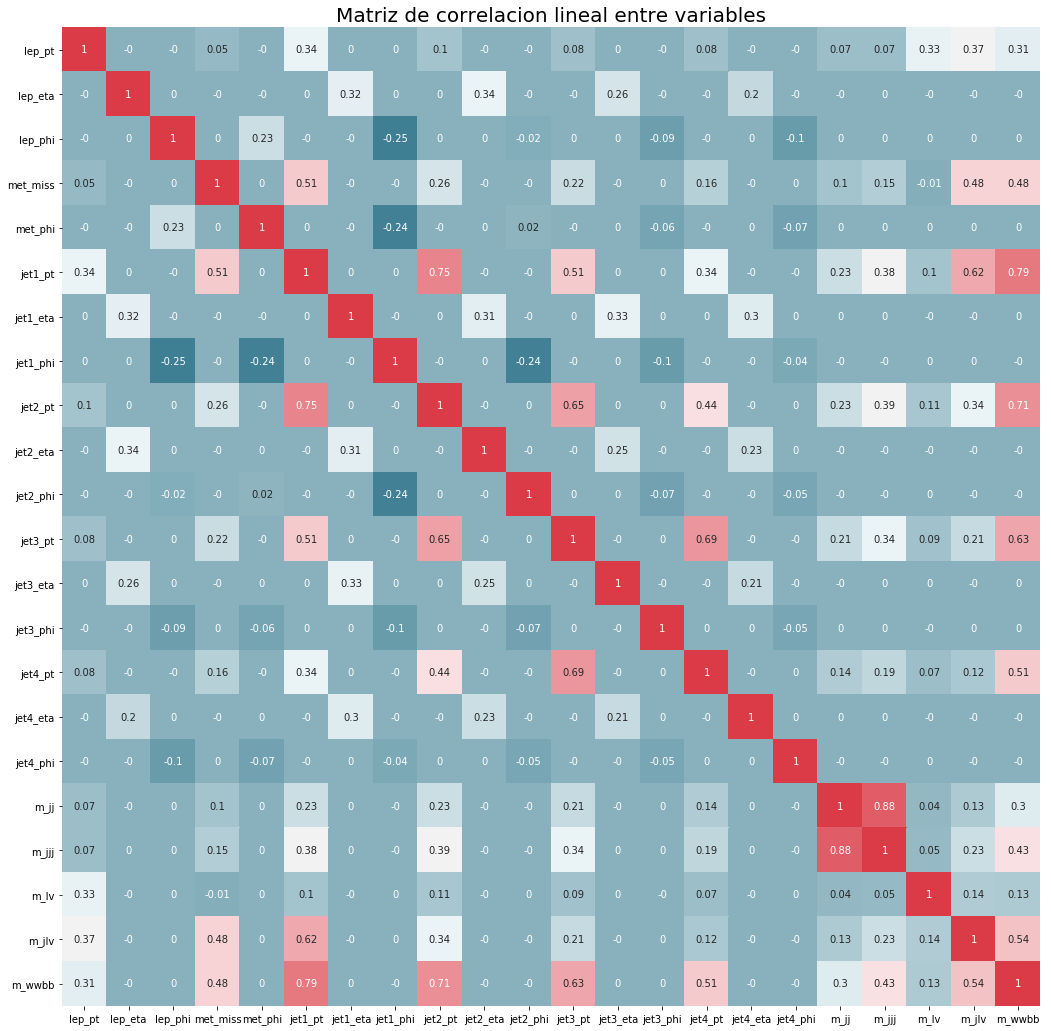

In [12]:

print("SCORRELATION PLOT FOR NORMALIZED DATA (7 MILLIONS)")

plt.figure(figsize=(18,18))
corr_sin_norm=df.corr()
corr_sin_norm=corr_sin_norm.round(2)
g=sns.heatmap(corr_sin_norm, mask=np.zeros_like(df.corr(), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, annot = True, annot_kws = {"size" : 10},cbar=False)
plt.title('Matriz de correlacion lineal entre variables', fontsize=20)
plt.show()
fig = g.get_figure()
fig.savefig(pwdsnorm  + 'correlation.png')    
#Keep in mind: categorical as number of jets are not HERE!



## Proportion of B-tag

In [7]:
df.loc[:,['jet1_btag','jet2_btag',"jet3_btag","jet4_btag"]].sum(axis=1).value_counts()/df.shape[0]*100

2.0    86.044390
1.0    13.332429
0.0     0.623181
dtype: float64

In [6]:
print("BTAGS PROPORTION IN NORMALIZED DATA(7MILLIONS)")

pd.crosstab([df.jet1_btag, df.jet2_btag], [df.jet3_btag, df.jet4_btag],
            rownames=['1_btag', "2_btag"],
            colnames=['3_btag', "4_btag"]).apply(lambda r: 100*r/df.shape[0])

BTAGS PROPORTION IN NORMALIZED DATA(7MILLIONS)


3_btag                 0                    1          
4_btag                 0         1          0         1
1_btag 2_btag                                          
0      0        0.623181  2.213302   2.947248  5.623161
       1        3.779018  7.663787  14.071797  0.000000
1      0        4.392860  9.166571  17.505750  0.000000
       1       32.013324  0.000000   0.000000  0.000000

**btag vs mass**

PLOT OF PREVIOUS TABLE


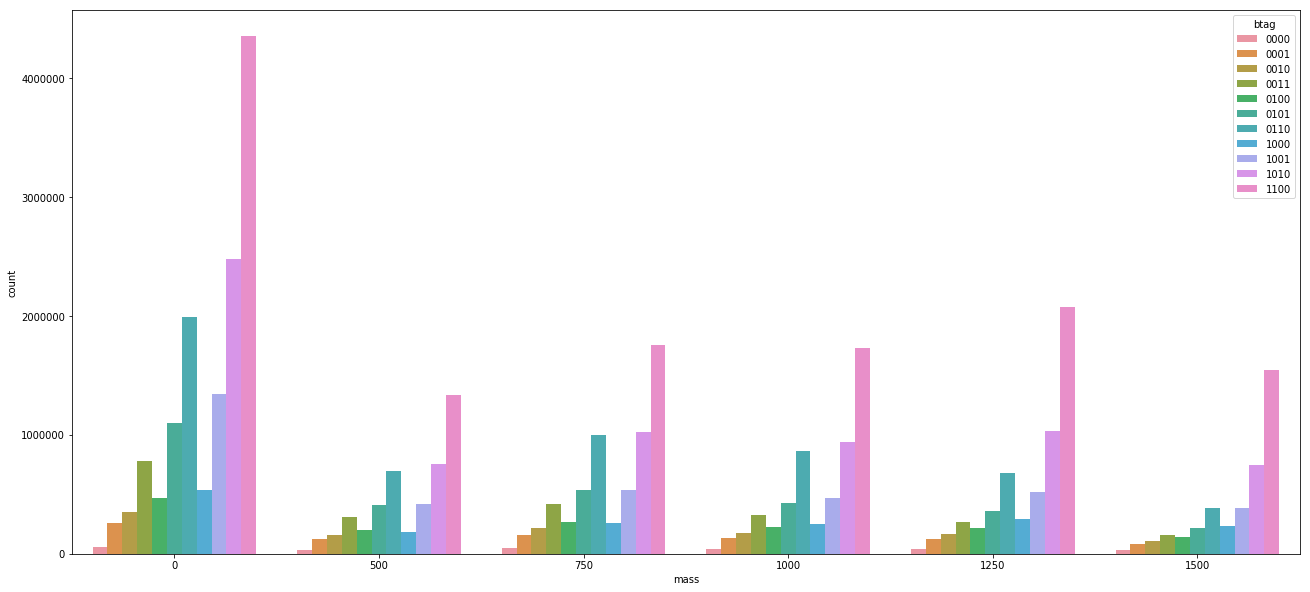

In [23]:
#making crosstab

print("PLOT OF PREVIOUS TABLE")

a=pd.crosstab([df.mass], [df.jet1_btag, df.jet2_btag, df.jet3_btag, df.jet4_btag],
            colnames=['1_btag', "2_btag",'3_btag', "4_btag"], rownames= ["mass"])
#correct names
a.columns=["0000","0001","0010","0011","0100","0101","0110","1000","1001","1010","1100"]
#adding mass
a = a.reset_index()
a["mass"] = a["mass"].astype('category')
#key-value
a=pd.melt(a, id_vars=['mass'], value_vars=a.columns[1:])
a.columns=['mass','btag','count']

plt.figure(figsize=(22,10))
g=sns.barplot(x="mass", y="count", hue="btag", data=a)

plt.show()
fig = g.get_figure()
fig.savefig(pwdsnorm  + 'btags.png')    


# COMPARATIONS

DIFERENCE BETWEEN CORRELATION NORMALIZ AND WITHOUT


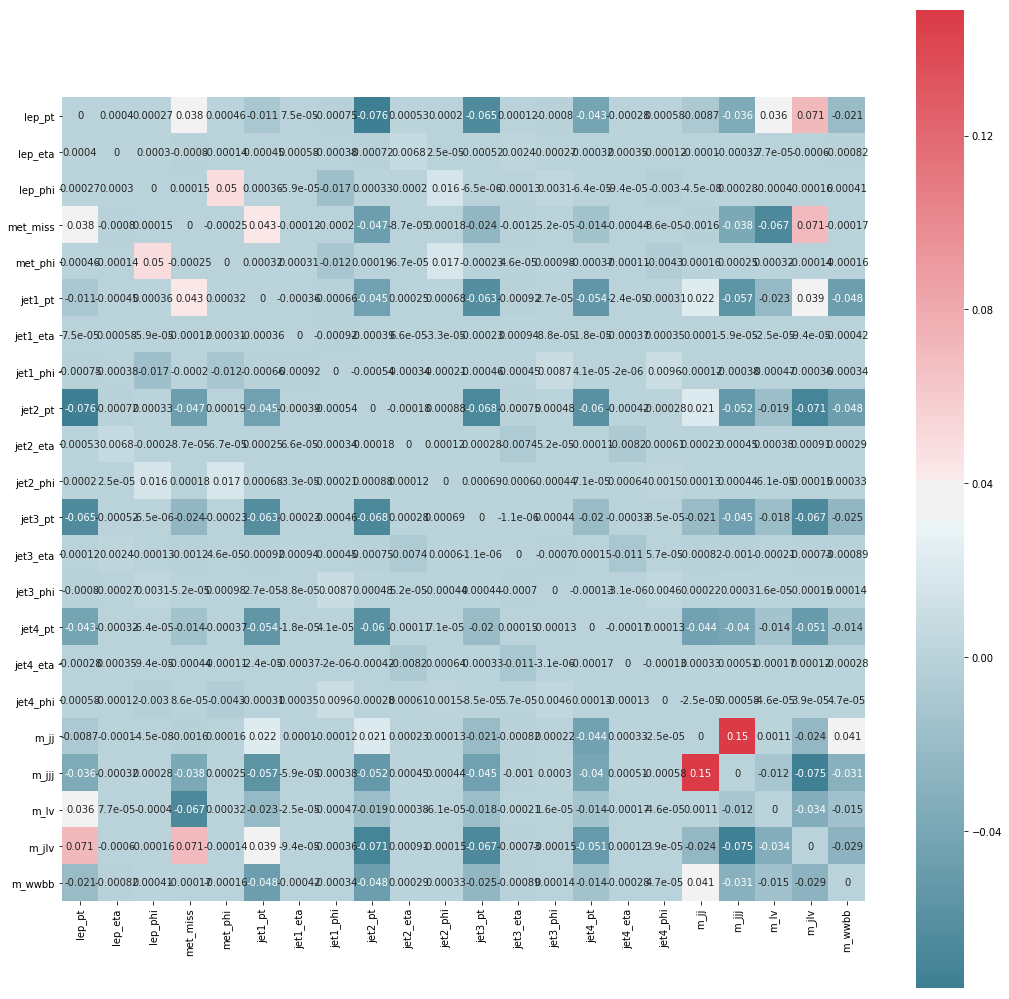

In [24]:
#DIFERENCE BETWEEN CORRELATION NORMALIZ AND WITHOUT
print("DIFERENCE BETWEEN CORRELATION NORMALIZ AND WITHOUT")

diff_corr=corr_sin_norm-corr_normaliz

plt.figure(figsize=(18,18))
g=sns.heatmap(diff_corr, mask=np.zeros_like(df.corr(), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, annot = True, annot_kws = {"size" : 10})

plt.show()
fig = g.get_figure()
fig.savefig(pwdest  + 'correlation_difference.png')    
#Keep in mind: categorical as number of jets are not HERE!

# NORMALIZATION AND COMPARATION WITH NORMALIZED. 



Note that the data has been pre-processed by taking log(x + 10**-5) of the following features: 0, 3, 5, 6, 10, 14, 18, 22, 23, 24, 25, 26. after, estandarization. 

In [25]:
norm_names=[]
for i in [0, 3, 5, 6, 10, 14, 18, 22, 23, 24, 25, 26]: 
    norm_names.append(df.columns[i+1])
    
def log(x):
    x=np.log(x + 10**(-5))
    return(x)
    
df=df[df.columns].astype(float)

autodf = df.apply(lambda x: log(x) if x.name in norm_names else x)
autodf=(autodf-autodf.mean())/autodf.std()
    


COMPARATION BETWEEN DISTRIBUTIONS NORMALIZED (7 MILL) AND NORMALICED BY HAND (50 MILL)


<Figure size 432x288 with 0 Axes>

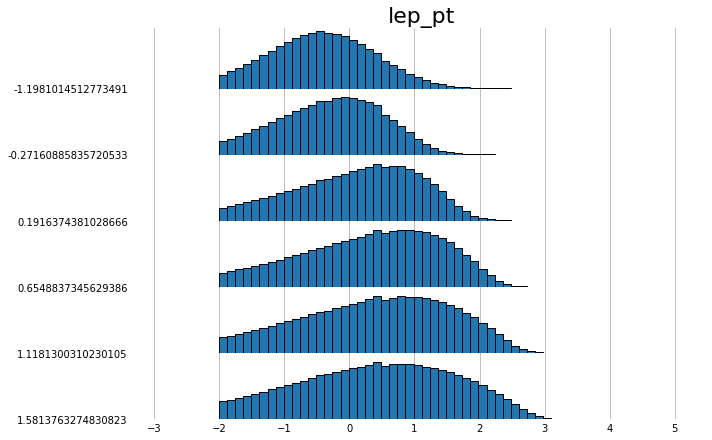

<Figure size 432x288 with 0 Axes>

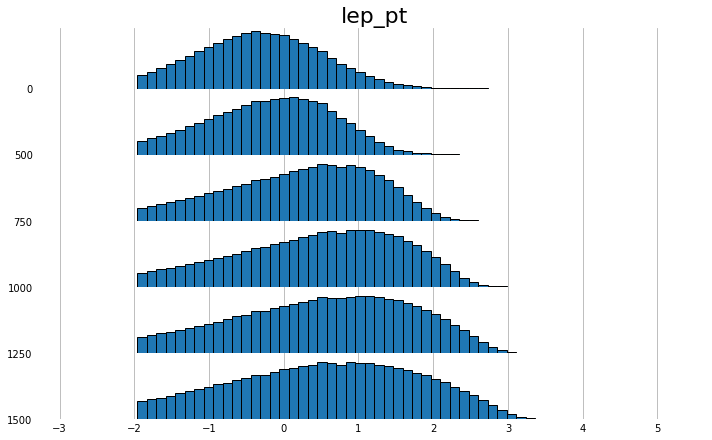

<Figure size 432x288 with 0 Axes>

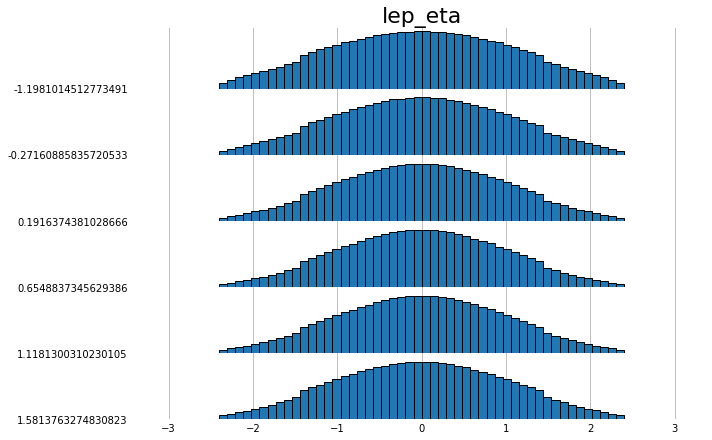

<Figure size 432x288 with 0 Axes>

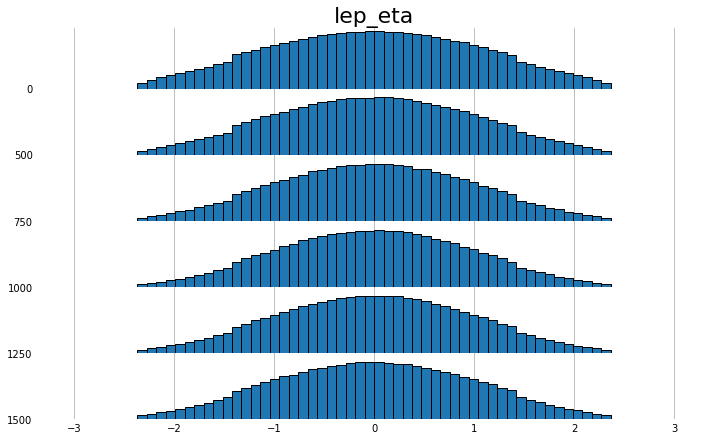

<Figure size 432x288 with 0 Axes>

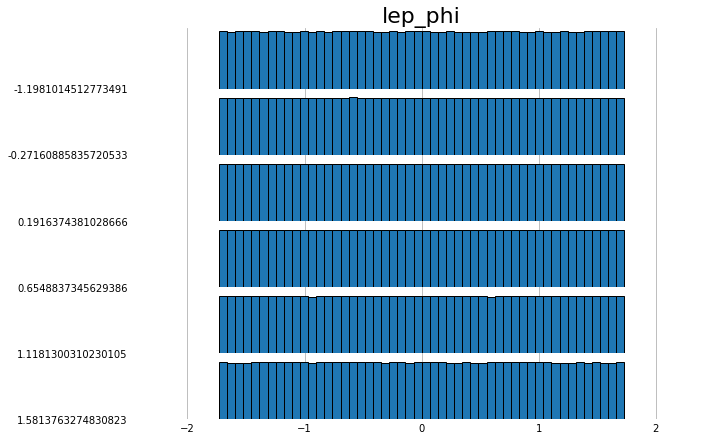

<Figure size 432x288 with 0 Axes>

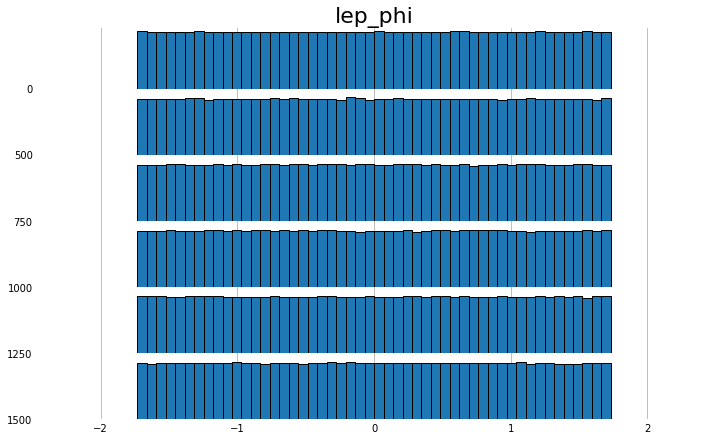

<Figure size 432x288 with 0 Axes>

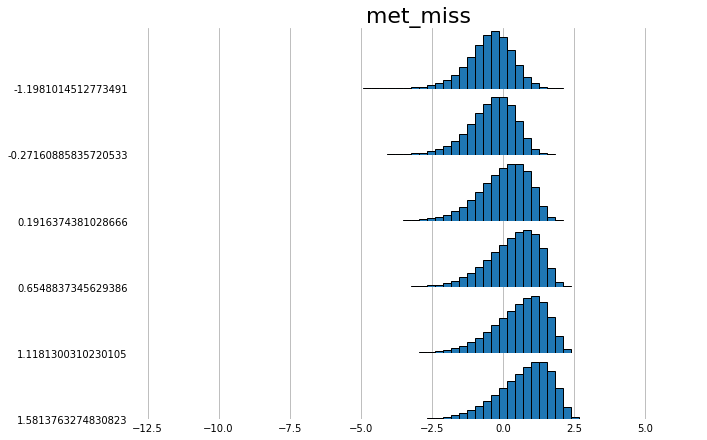

<Figure size 432x288 with 0 Axes>

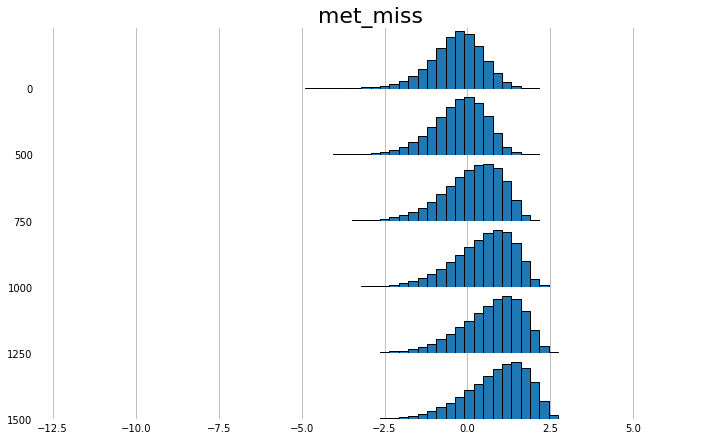

<Figure size 432x288 with 0 Axes>

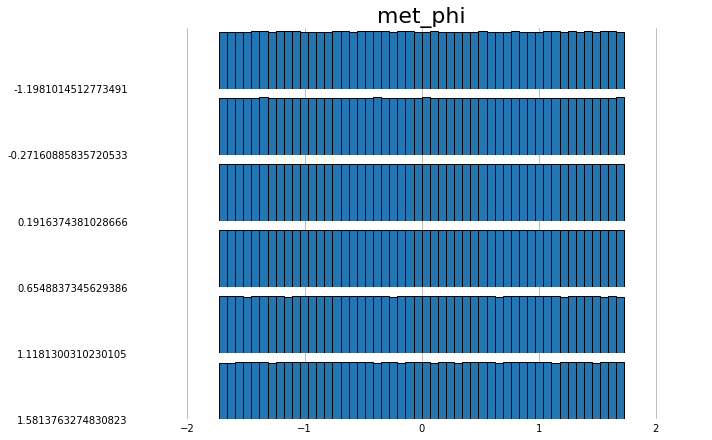

<Figure size 432x288 with 0 Axes>

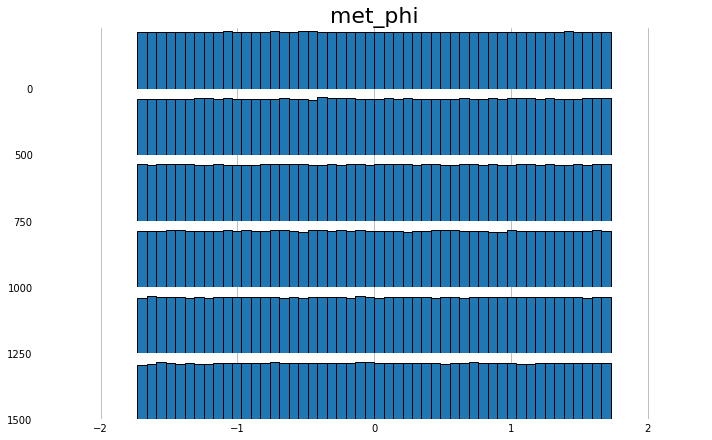

<Figure size 432x288 with 0 Axes>

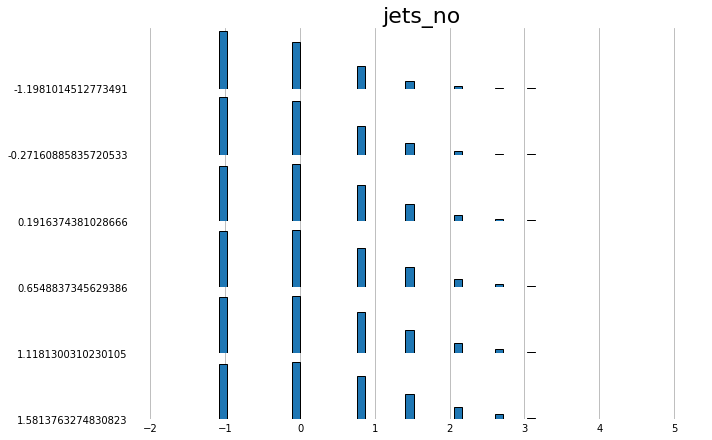

<Figure size 432x288 with 0 Axes>

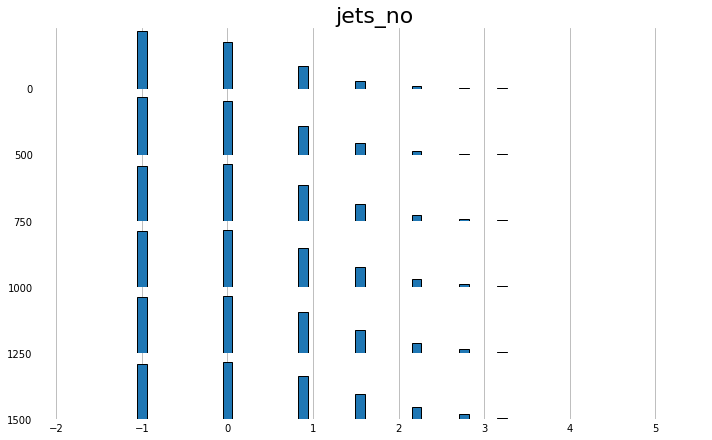

<Figure size 432x288 with 0 Axes>

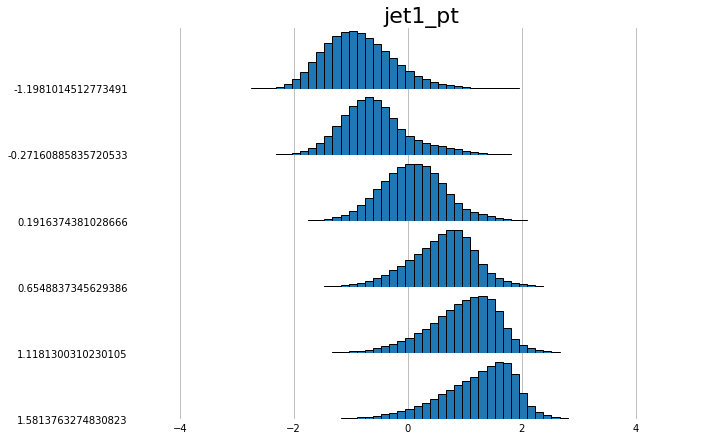

<Figure size 432x288 with 0 Axes>

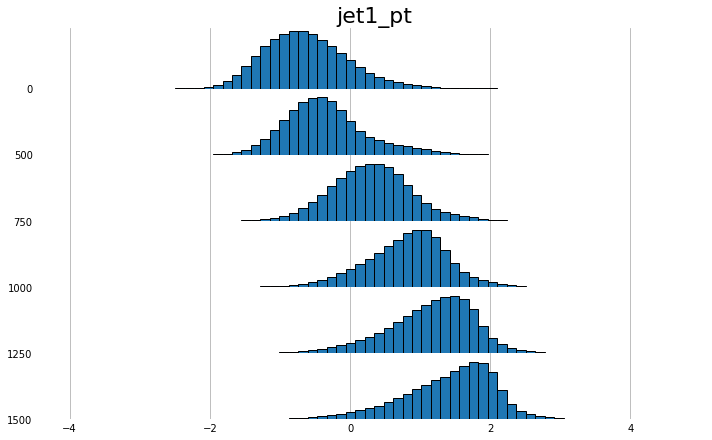

<Figure size 432x288 with 0 Axes>

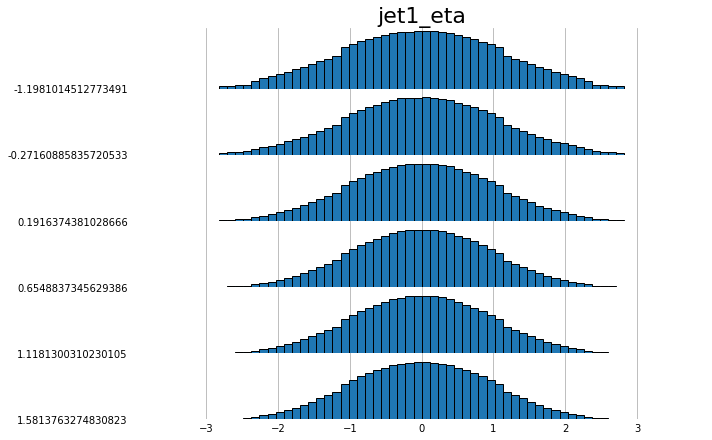

<Figure size 432x288 with 0 Axes>

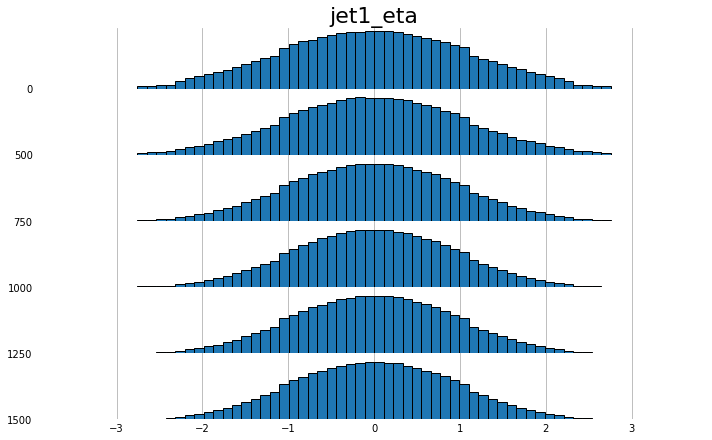

<Figure size 432x288 with 0 Axes>

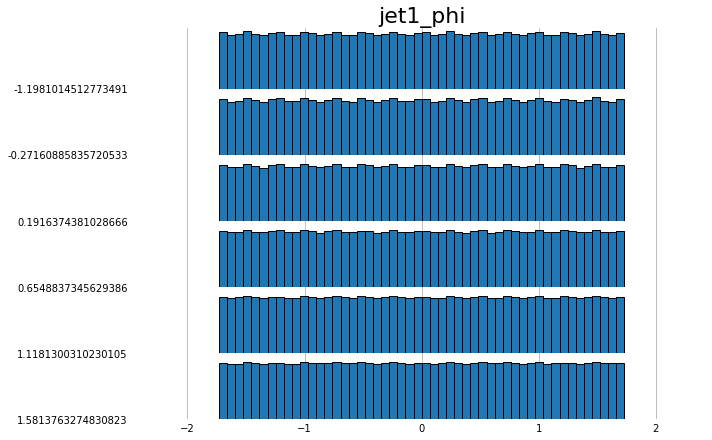

<Figure size 432x288 with 0 Axes>

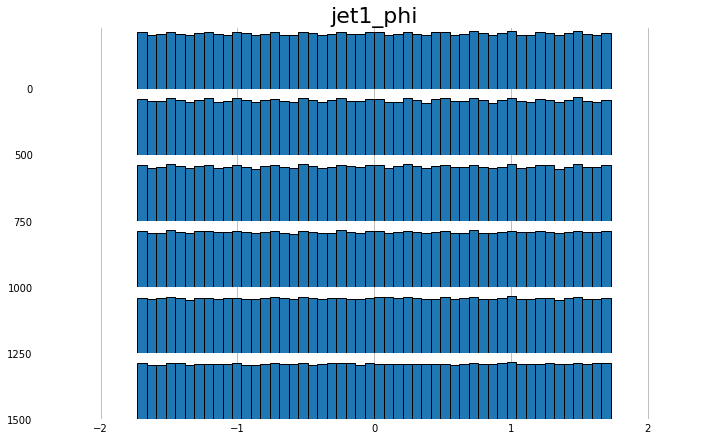

<Figure size 432x288 with 0 Axes>

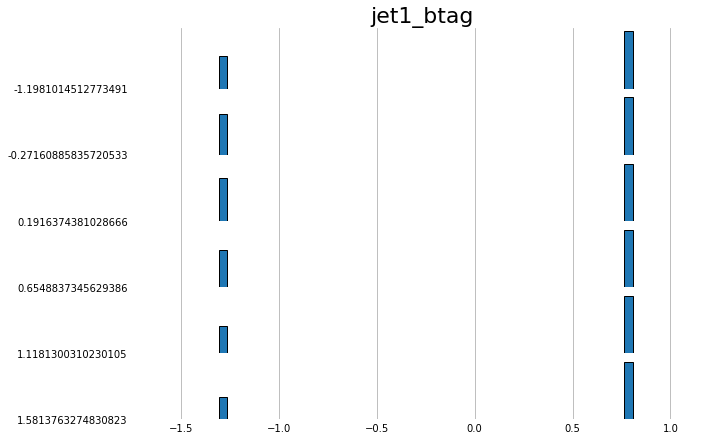

<Figure size 432x288 with 0 Axes>

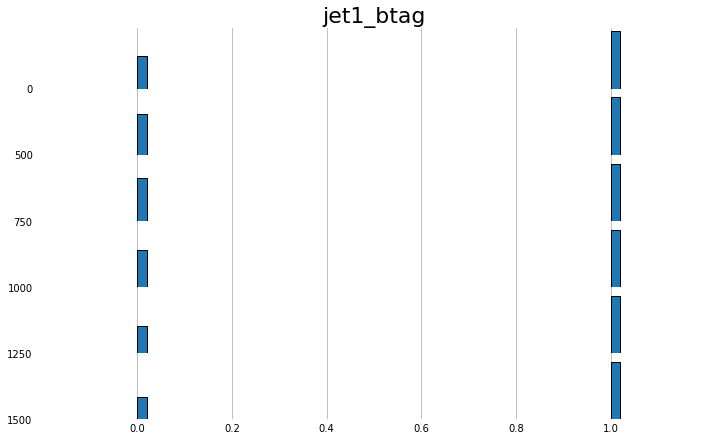

<Figure size 432x288 with 0 Axes>

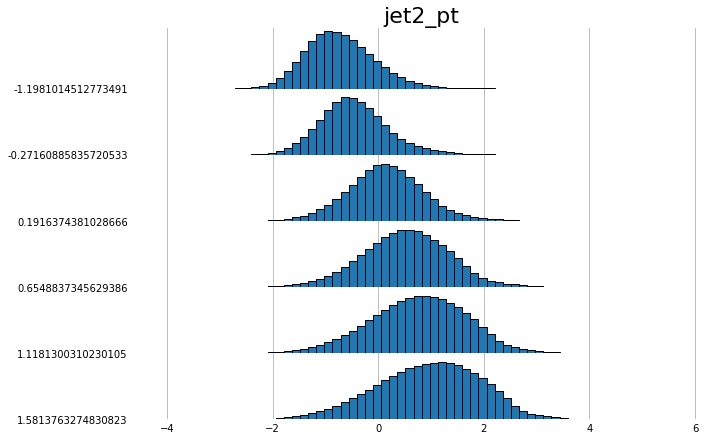

<Figure size 432x288 with 0 Axes>

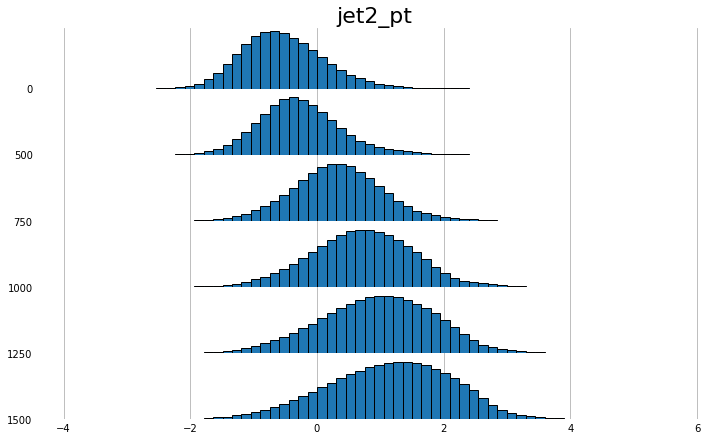

<Figure size 432x288 with 0 Axes>

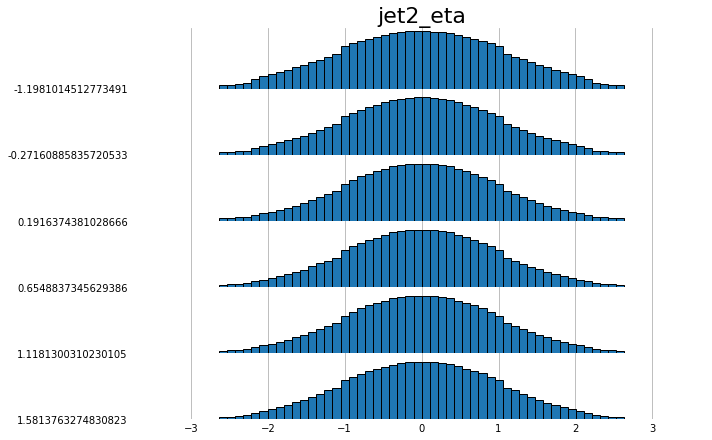

<Figure size 432x288 with 0 Axes>

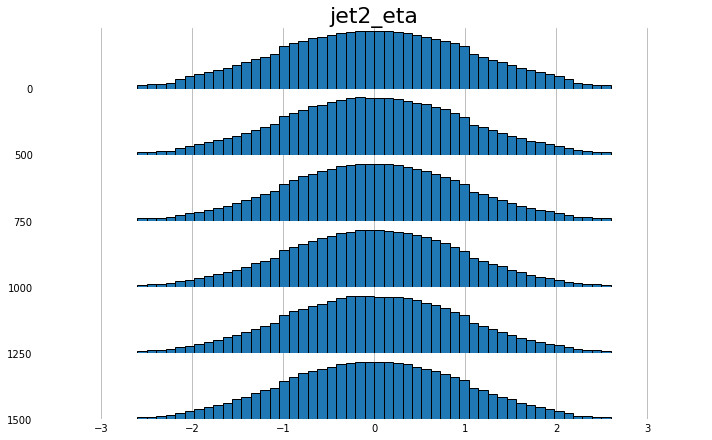

<Figure size 432x288 with 0 Axes>

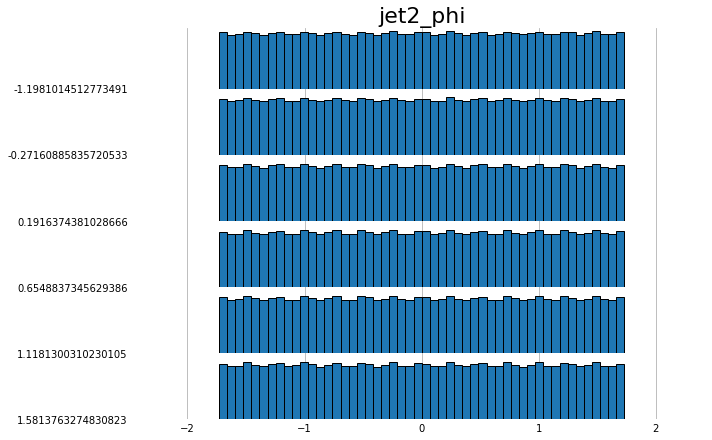

<Figure size 432x288 with 0 Axes>

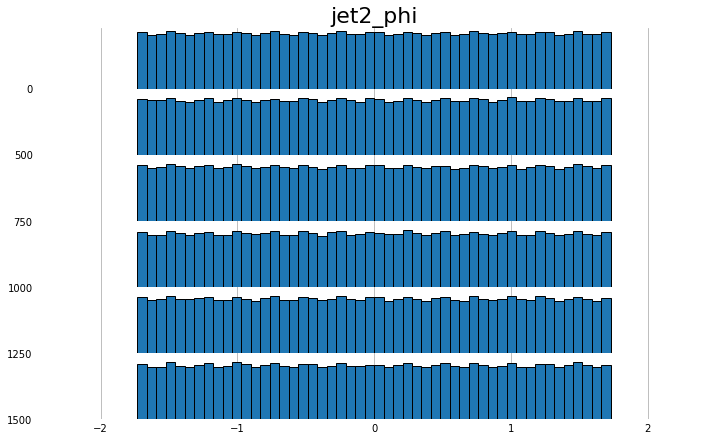

<Figure size 432x288 with 0 Axes>

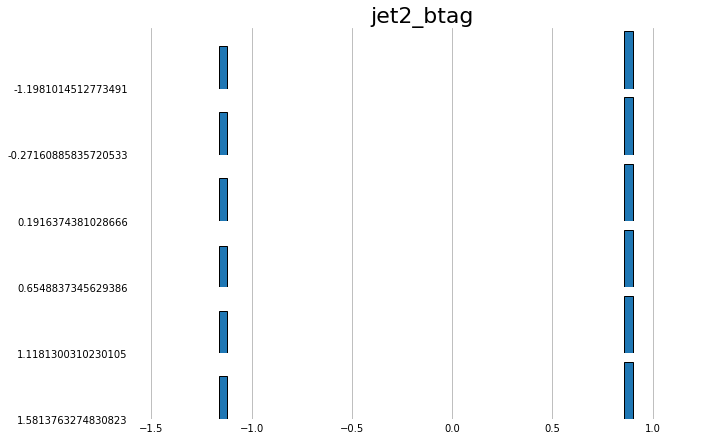

<Figure size 432x288 with 0 Axes>

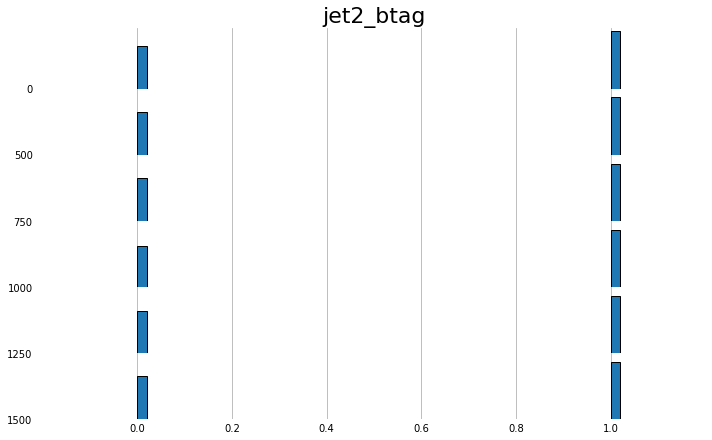

<Figure size 432x288 with 0 Axes>

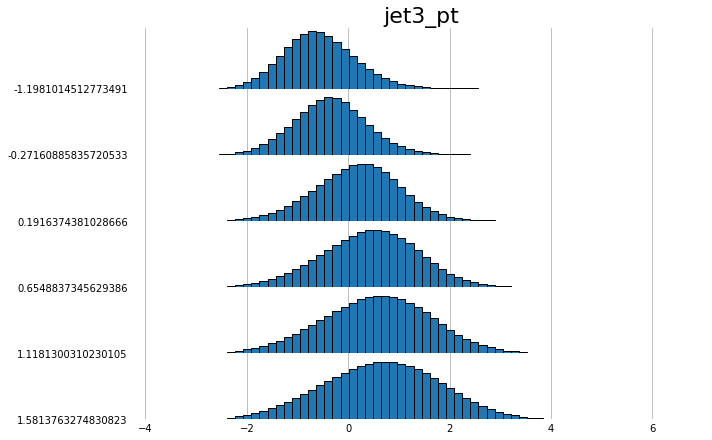

<Figure size 432x288 with 0 Axes>

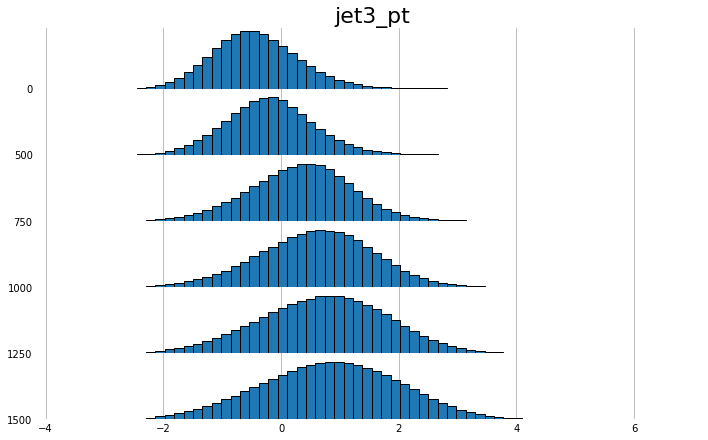

<Figure size 432x288 with 0 Axes>

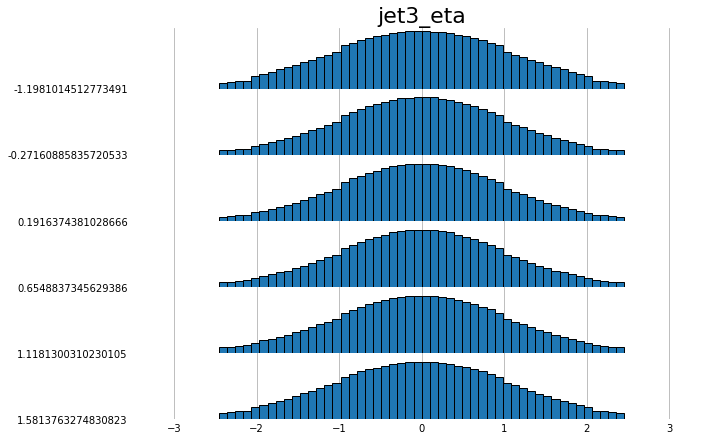

<Figure size 432x288 with 0 Axes>

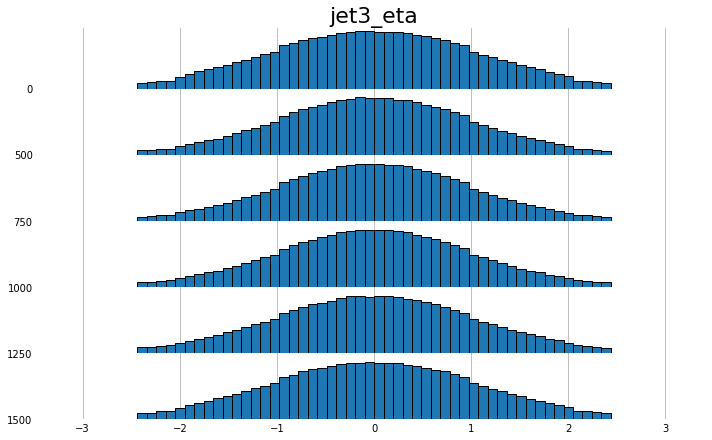

<Figure size 432x288 with 0 Axes>

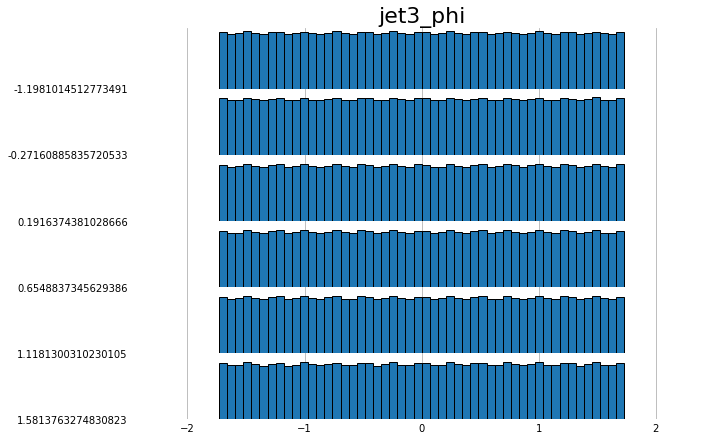

<Figure size 432x288 with 0 Axes>

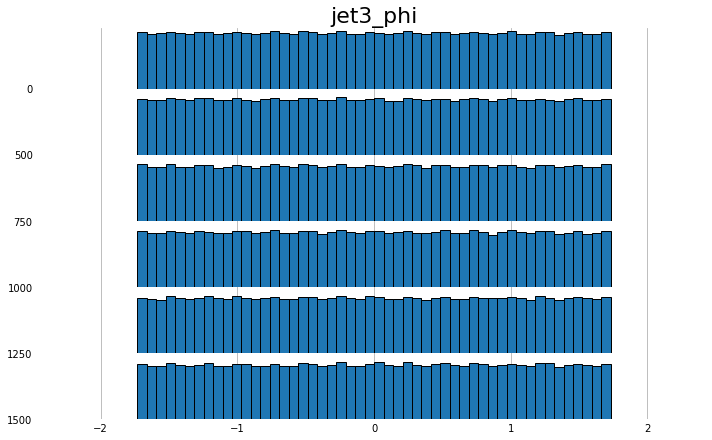

<Figure size 432x288 with 0 Axes>

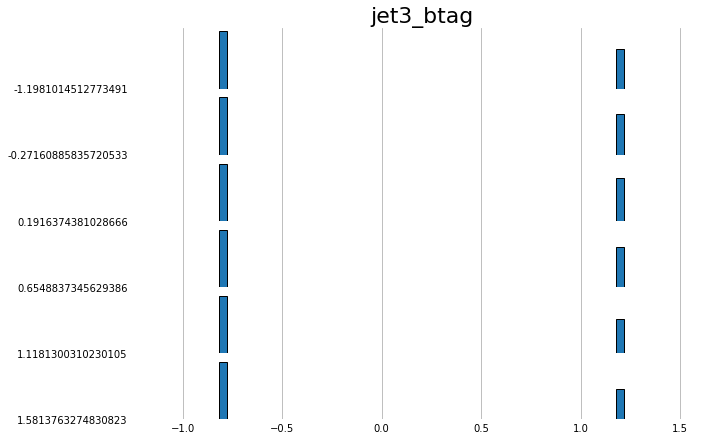

<Figure size 432x288 with 0 Axes>

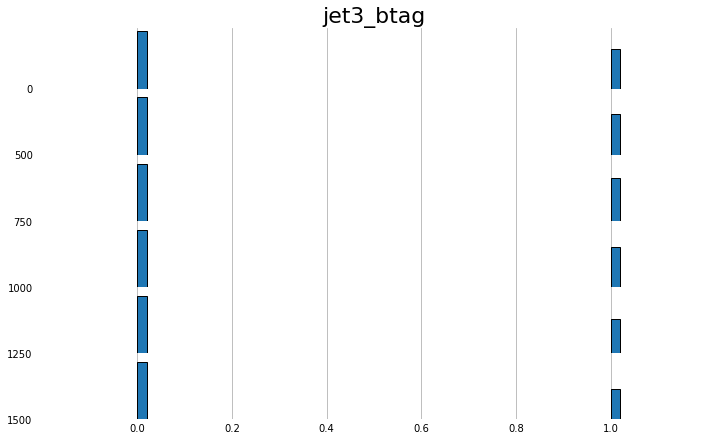

<Figure size 432x288 with 0 Axes>

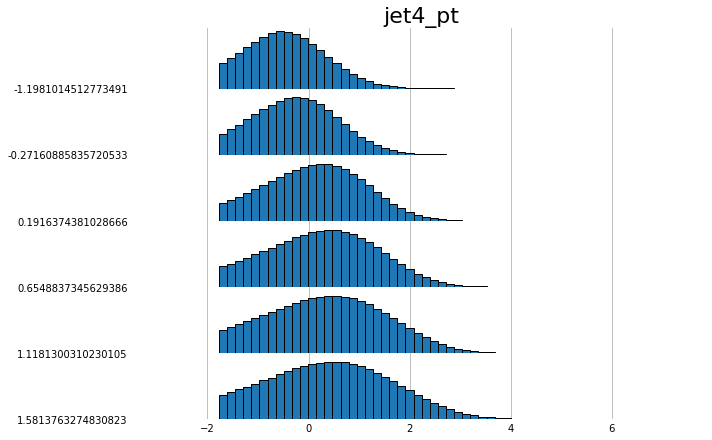

<Figure size 432x288 with 0 Axes>

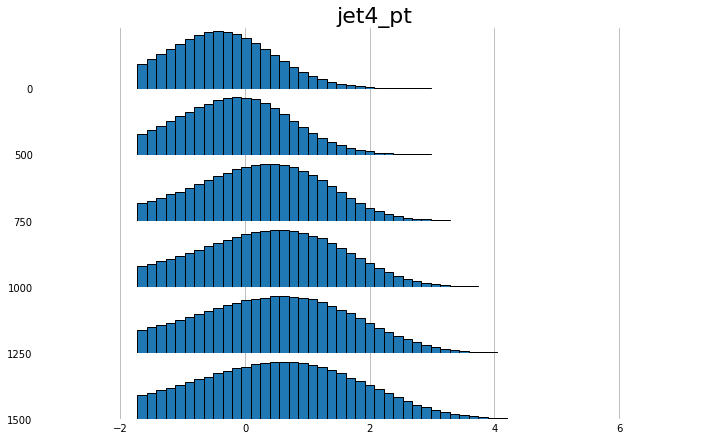

<Figure size 432x288 with 0 Axes>

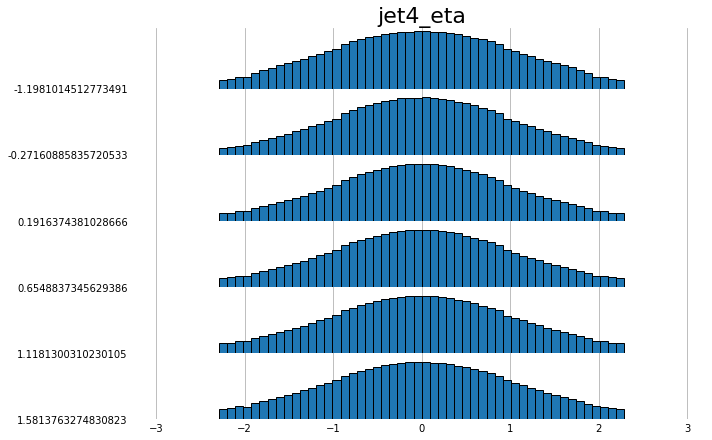

<Figure size 432x288 with 0 Axes>

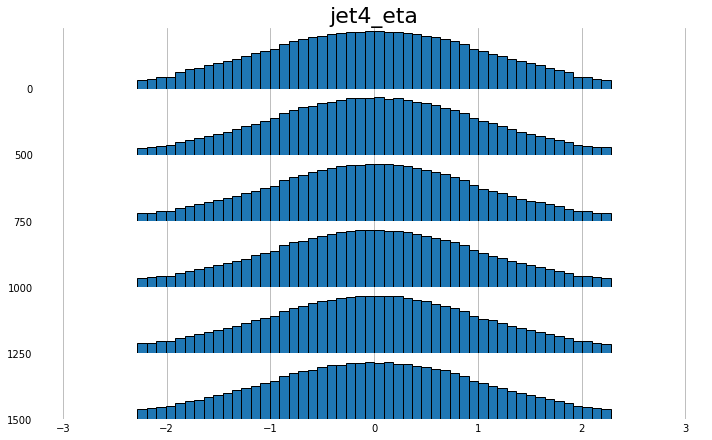

<Figure size 432x288 with 0 Axes>

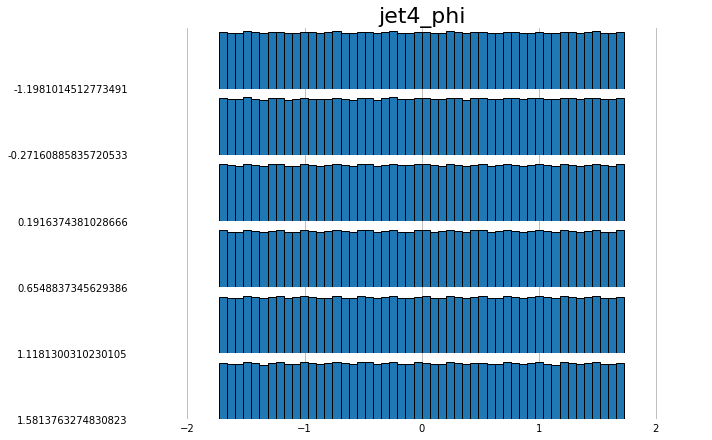

<Figure size 432x288 with 0 Axes>

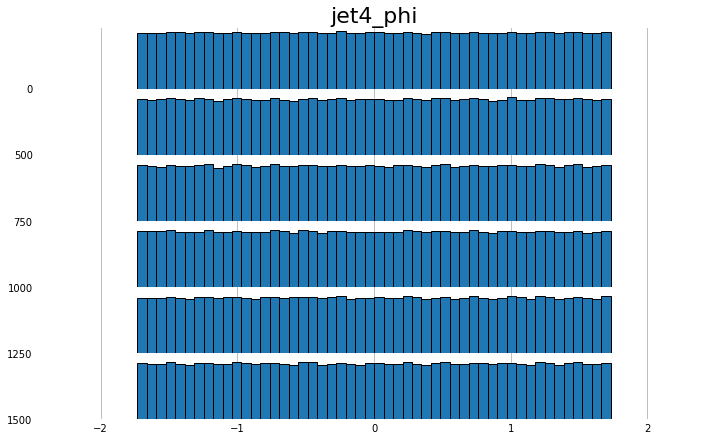

<Figure size 432x288 with 0 Axes>

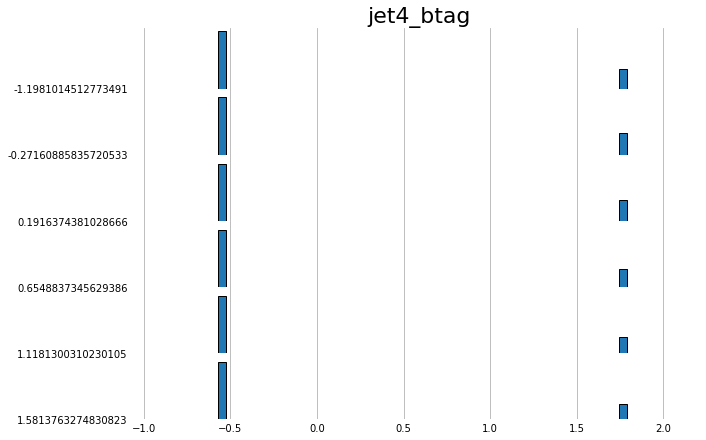

<Figure size 432x288 with 0 Axes>

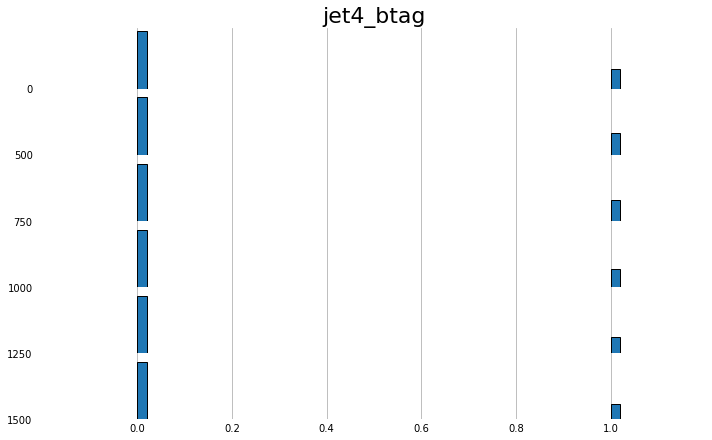

<Figure size 432x288 with 0 Axes>

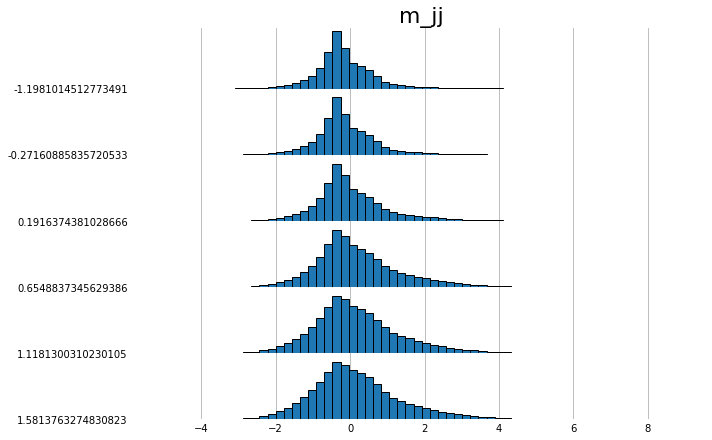

<Figure size 432x288 with 0 Axes>

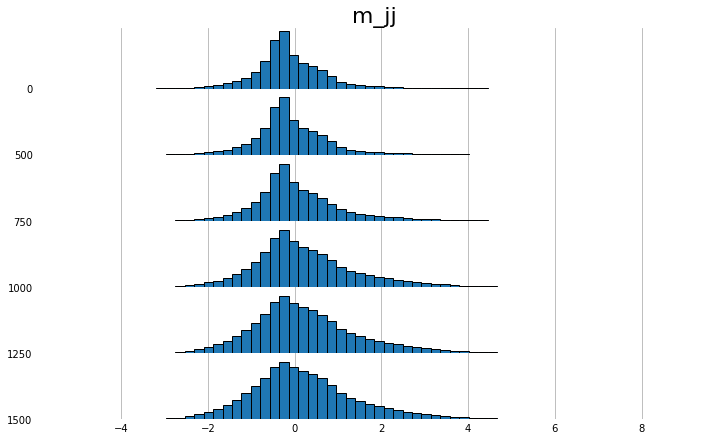

<Figure size 432x288 with 0 Axes>

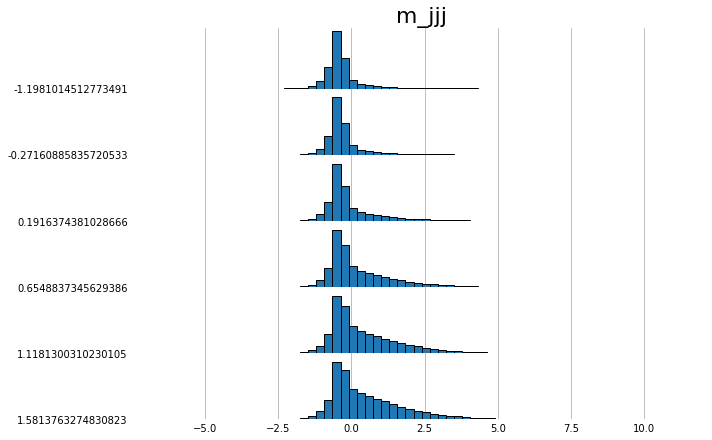

<Figure size 432x288 with 0 Axes>

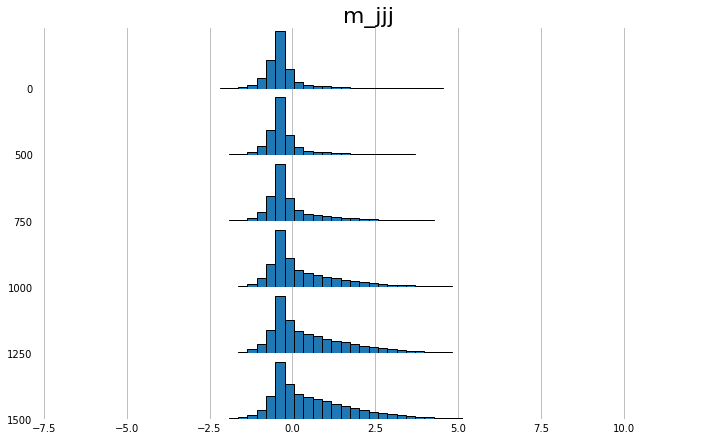

<Figure size 432x288 with 0 Axes>

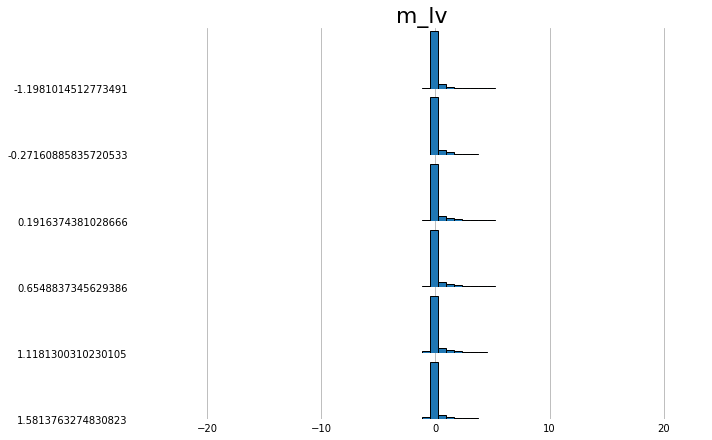

<Figure size 432x288 with 0 Axes>

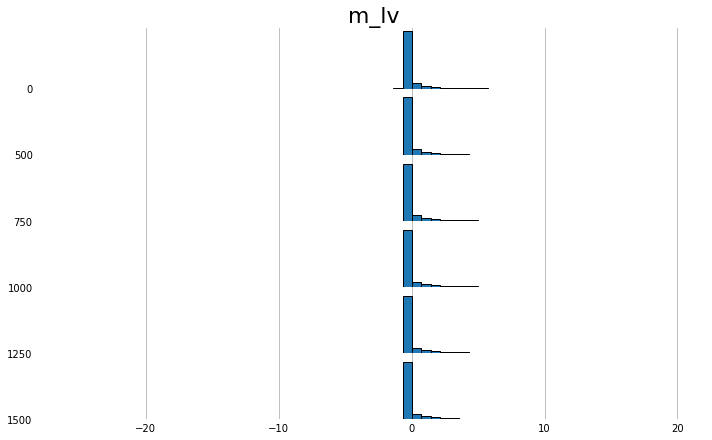

<Figure size 432x288 with 0 Axes>

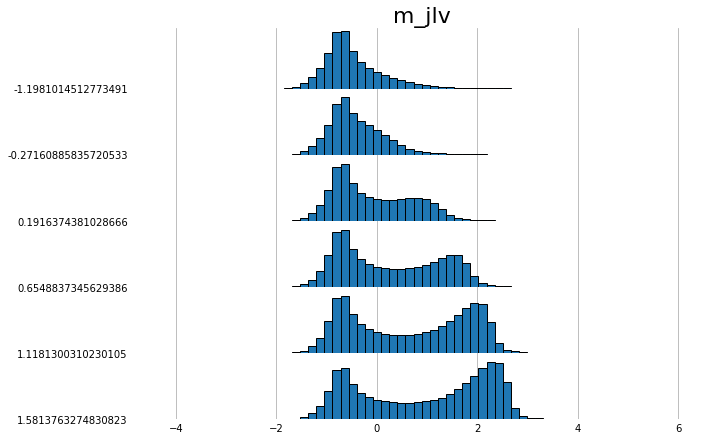

<Figure size 432x288 with 0 Axes>

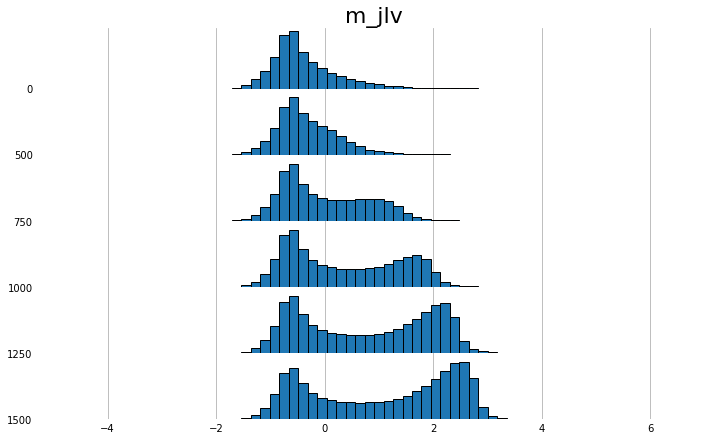

<Figure size 432x288 with 0 Axes>

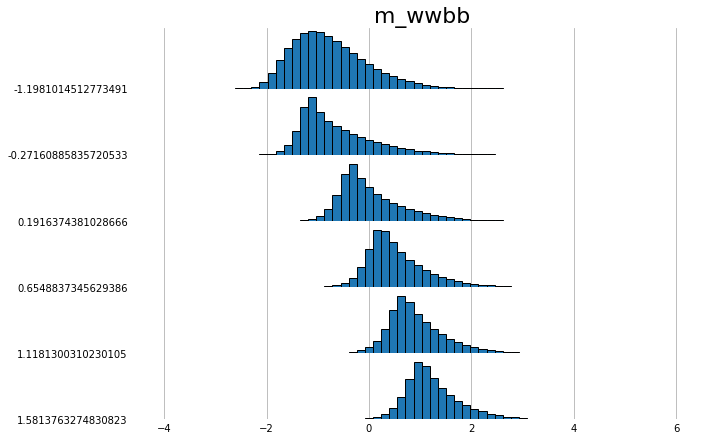

<Figure size 432x288 with 0 Axes>

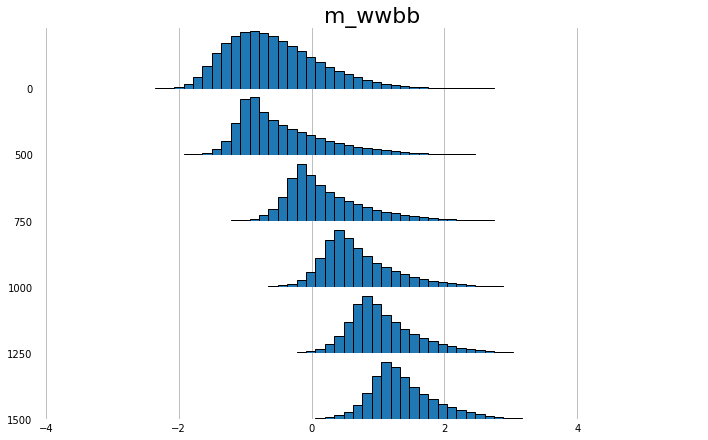

In [26]:
#Plot histogram: 

print("COMPARATION BETWEEN DISTRIBUTIONS NORMALIZED (7 MILL) AND NORMALICED BY HAND (50 MILL)")

dfdensityautonor=autodf.iloc[:,1:]
dfdensity=dfnormaliz.iloc[:,1:]
names=dfdensity.iloc[:,:-1].columns

#Plot histogram: 

for i in names: 
    plt.figure()
    fig, axes = joypy.joyplot(dfdensityautonor, column=[i], by="mass", ylim='own', figsize=(10,6),hist="True", bins=70, overlap=0,
                          grid=True, legend=False)

    # Decoration
    plt.title(i, fontsize=22)
    plt.show()
    fig.savefig(pwdest +"autonorm" +i + '.png')
    
    plt.figure()
    fig, axes = joypy.joyplot(dfdensity, column=[i], by="mass", ylim='own', figsize=(10,6),hist="True", bins=70, overlap=0,
                          grid=True, legend=False)

    # Decoration
    plt.title(i, fontsize=22)
    plt.show()
    fig.savefig(pwdest + "normaliz" +i + '.png')
    
    